# Use Difference as additional input

This file is for using the difference as an input. However, we also take the input voltage into account. We therefore use input voltage and a delayed difference as input. The delay of the difference can be chosen.

We select a delay of 60 - meaning 1 minute. We figured that worst case, our model learns the the output purely based on the difference. With a smaller window of 60 seconds we would only overshoot our prediction for 1 minute. As always we need a trade off between the best possible outcome and uncertainty for the future.

## Preliminaries

### Import Libraries

In [1]:
# own libraries
import Global_Functions as gf
import Neuronal_Networks as nn

# python provided libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
timestr = time.strftime("%Y-%m-%d_%H-%M_")

# ML Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
# set seed for reprocudible results
np.random.seed(123)

### Open files

In [3]:
OPEN_FOLDER = '../Data/Preped_Data/'

In [4]:
ex_1 = gf.open_CSV_file('experiment_1_short.csv', OPEN_FOLDER)
ex_4 = gf.open_CSV_file('experiment_4_short.csv', OPEN_FOLDER)
ex_9 = gf.open_CSV_file('experiment_9_short.csv', OPEN_FOLDER)
ex_20 = gf.open_CSV_file('experiment_20_short.csv', OPEN_FOLDER)
ex_21 = gf.open_CSV_file('experiment_21_short.csv', OPEN_FOLDER)
ex_22 = gf.open_CSV_file('experiment_22_short.csv', OPEN_FOLDER)
ex_23 = gf.open_CSV_file('experiment_23_short.csv', OPEN_FOLDER)
ex_24 = gf.open_CSV_file('experiment_24_short.csv', OPEN_FOLDER)

In [5]:
experiments = [ex_1, ex_4, ex_9, ex_20, ex_21, ex_22, ex_23, ex_24]
names = ['1', '4', '9', '20', '21','22', '23', '24']

In [6]:
OPEN_SYNTHETIC = 'C:/Users/FlorianLeiser/Documents/Masterarbeit/Data/Synthetic_Data/Without_Noise/Sample_Ratio_1/quadratic_12_34_linear_1'

In [7]:
experiments = gf.load_synthetic(OPEN_SYNTHETIC, length = 50)
names = [str(x+1) for x in range(len(experiments)-1)]
names.append("hand")

### Specify parameters

In [8]:
NEUR = 128
EPOCH = 500
LAG = 60
DIFFERENCE = 'add_scaled'
BATCH_SIZE = 512

In [9]:
train = "20"
val = "21"

train_exs = experiments[:30]
ex_train = gf.use_multiple_experiments(train_exs)
ex_val = gf.use_multiple_experiments(experiments[30:40])
ex_test = gf.use_multiple_experiments(experiments[40:50])
# ex_train = ex_20
# ex_val = ex_21

In [10]:
# saving folder for images
image_path = "../Images/Synthetic/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}_batch_{5}/" 
image_folder = image_path + specs.format(train, val, NEUR, EPOCH, LAG, BATCH_SIZE)

gf.check_folder(image_folder)

Creation of directory ../Images/Synthetic/1/Difference/add_scaled/2021-05-17_14-03_training_20 val_21 128_neurons__500_epochs__lag_60_batch_128/ successful.


In [11]:
# saving folder for images
model_path = "../Models/Synthetic/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}_batch_{5}/" 
model_folder = model_path + specs.format(train, val, NEUR, EPOCH, LAG, BATCH_SIZE)

gf.check_folder(model_folder)

Creation of directory ../Models/Synthetic/1/Difference/add_scaled/2021-05-17_14-03_training_20 val_21 128_neurons__500_epochs__lag_60_batch_128/ successful.


## Training the model

In [12]:
model, history, scaler_train, X_train, y_train, _, X_val, y_val = nn.train_model(ex_train, ex_val,
                                                   difference_chosen = DIFFERENCE, lag_chosen = LAG,
                                                   save_folder = model_folder,
                                                   batch_size = BATCH_SIZE,
                                                   nmb_epochs = EPOCH, neurons_chosen = NEUR)

Folder already exists.


C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled
C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


Epoch 10 done.
Epoch 20 done.
Epoch 30 done.
Epoch 40 done.
Epoch 50 done.
Epoch 60 done.
Epoch 70 done.
Epoch 80 done.
Epoch 90 done.
Epoch 100 done.
Epoch 110 done.
Epoch 120 done.
Epoch 130 done.
Epoch 140 done.
Epoch 150 done.
Epoch 160 done.
Epoch 170 done.
Epoch 180 done.
Epoch 190 done.
Epoch 200 done.
Epoch 210 done.
Epoch 220 done.
Epoch 230 done.
Epoch 240 done.
Epoch 250 done.
Epoch 260 done.
Epoch 270 done.
Epoch 280 done.
Epoch 290 done.
Epoch 300 done.
Epoch 310 done.
Epoch 320 done.
Epoch 330 done.
Epoch 340 done.
Epoch 350 done.
Epoch 360 done.
Epoch 370 done.
Epoch 380 done.
Epoch 390 done.
Epoch 400 done.
Epoch 410 done.
Epoch 420 done.
Epoch 430 done.
Epoch 440 done.
Epoch 450 done.
Epoch 460 done.
Epoch 470 done.
Epoch 480 done.
Epoch 490 done.
Epoch 500 done.


C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


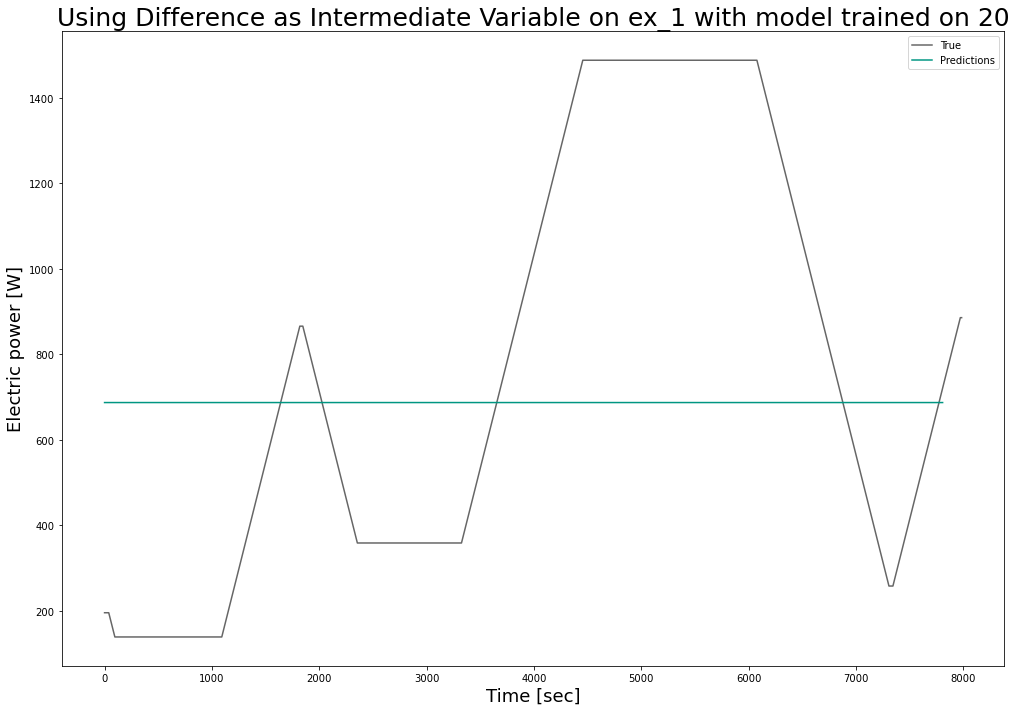

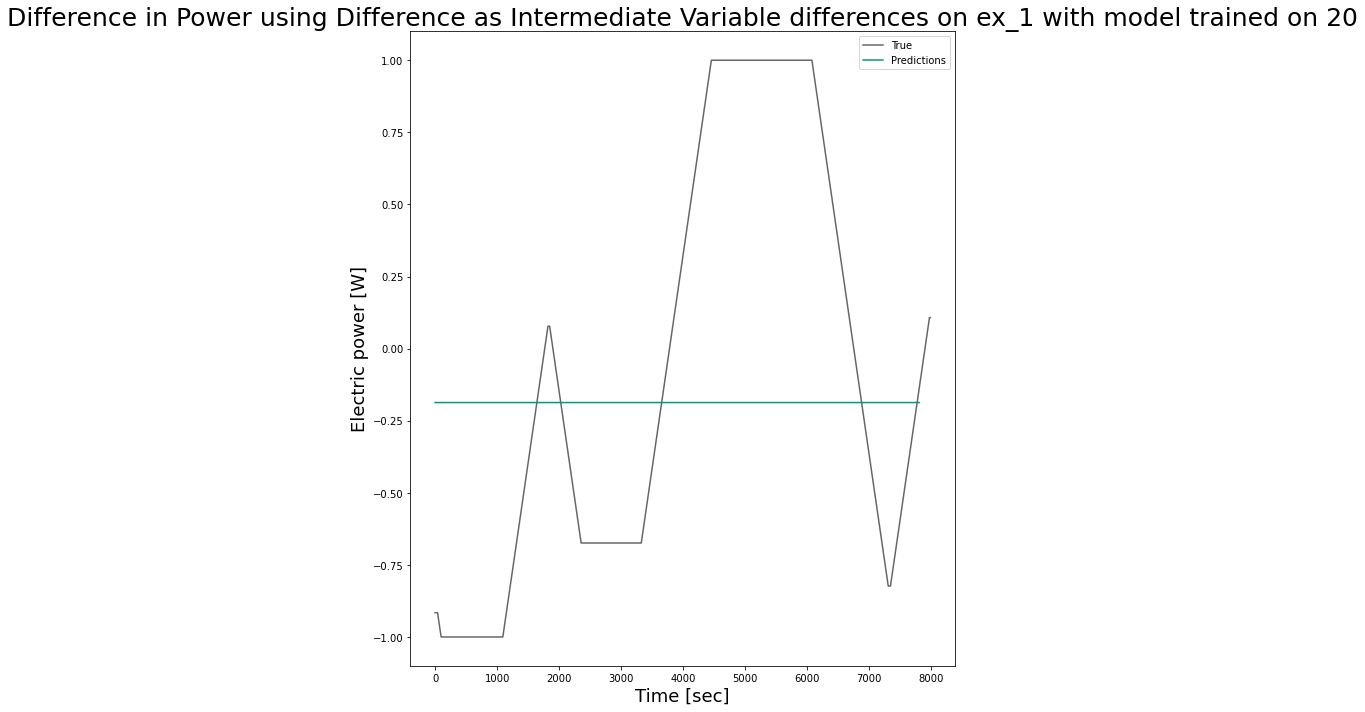

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


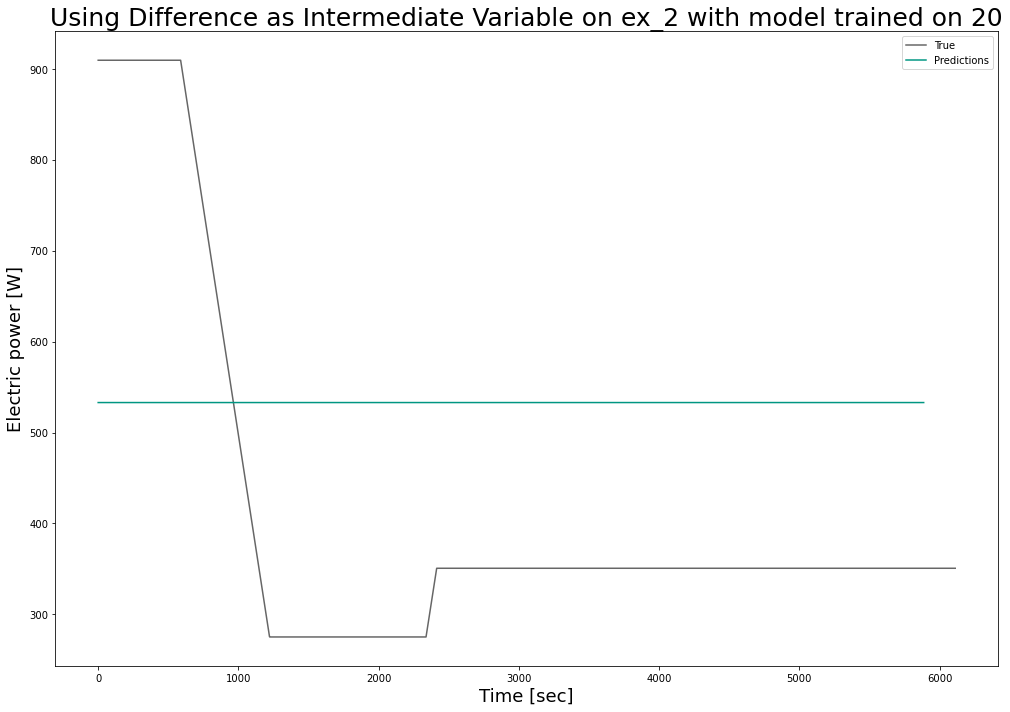

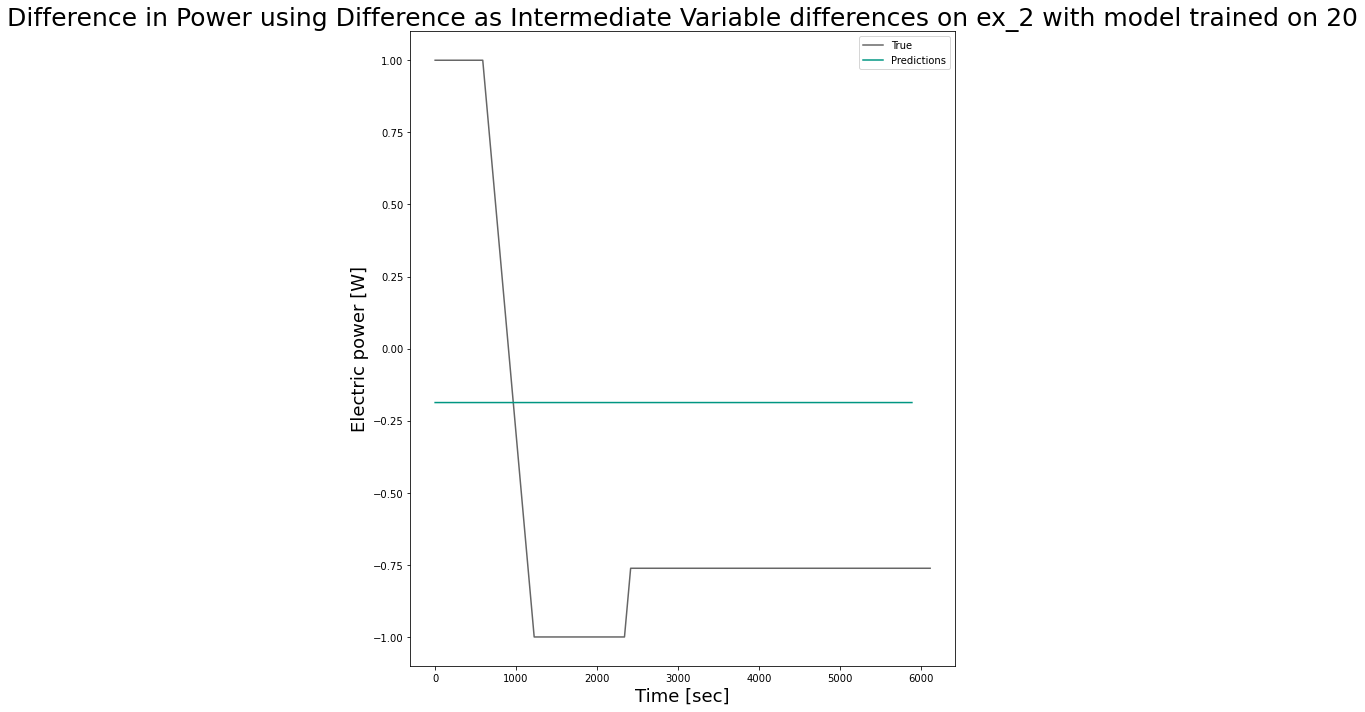

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


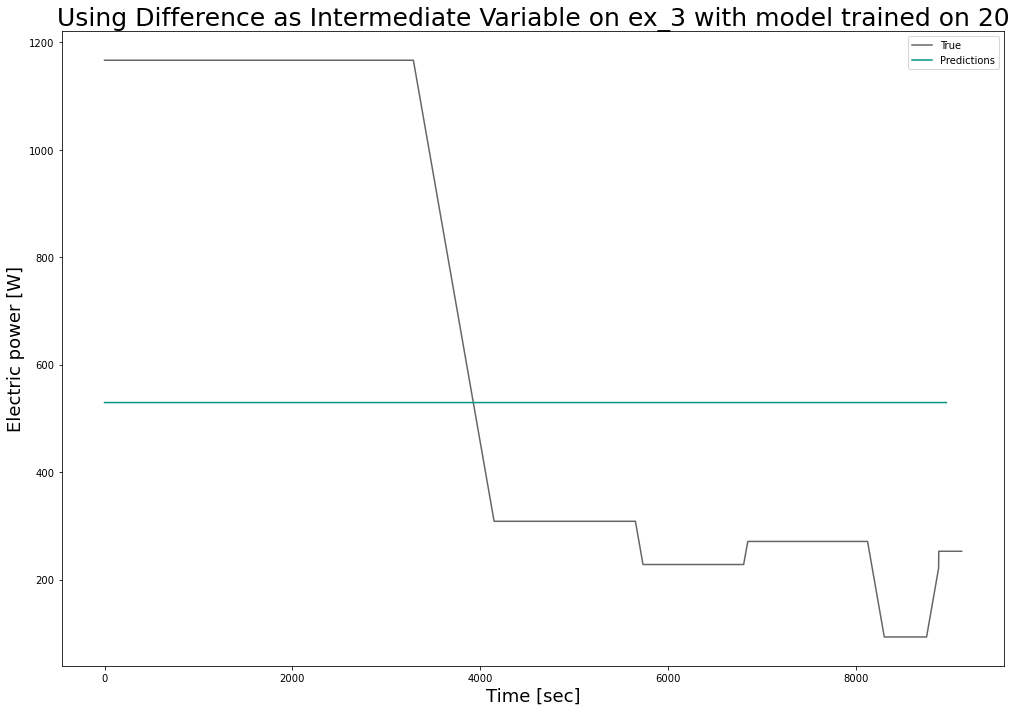

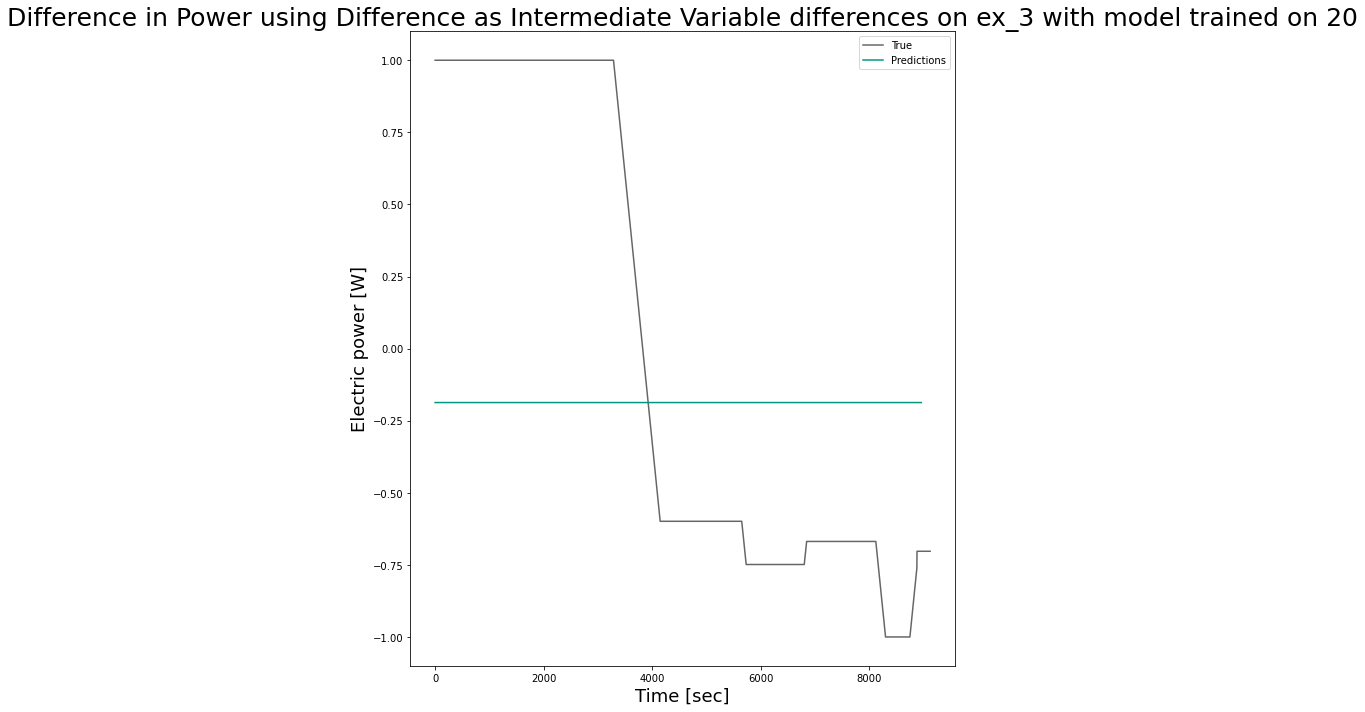

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


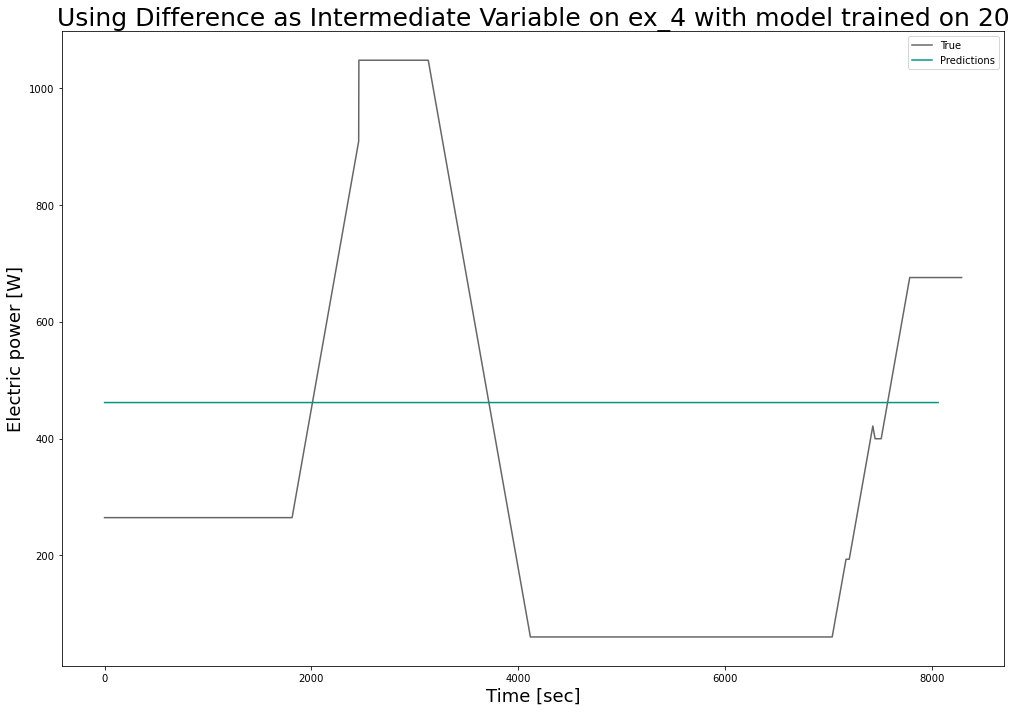

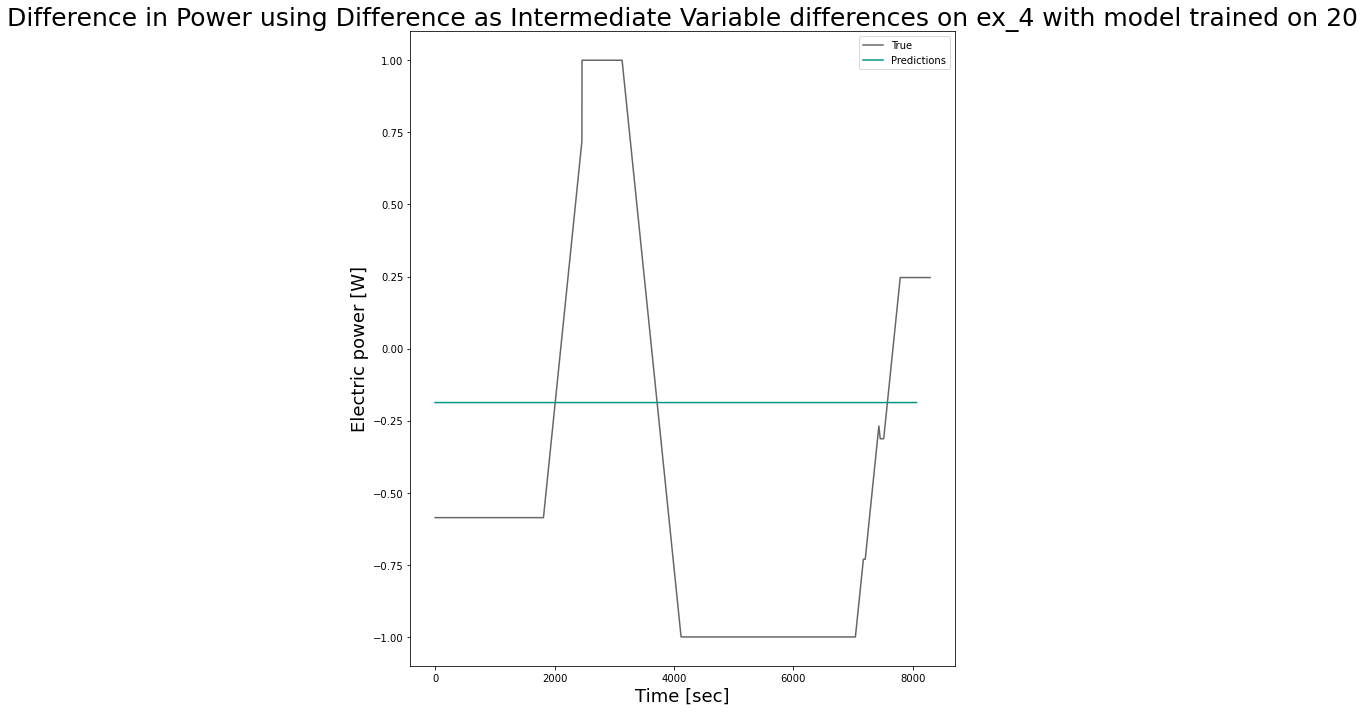

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


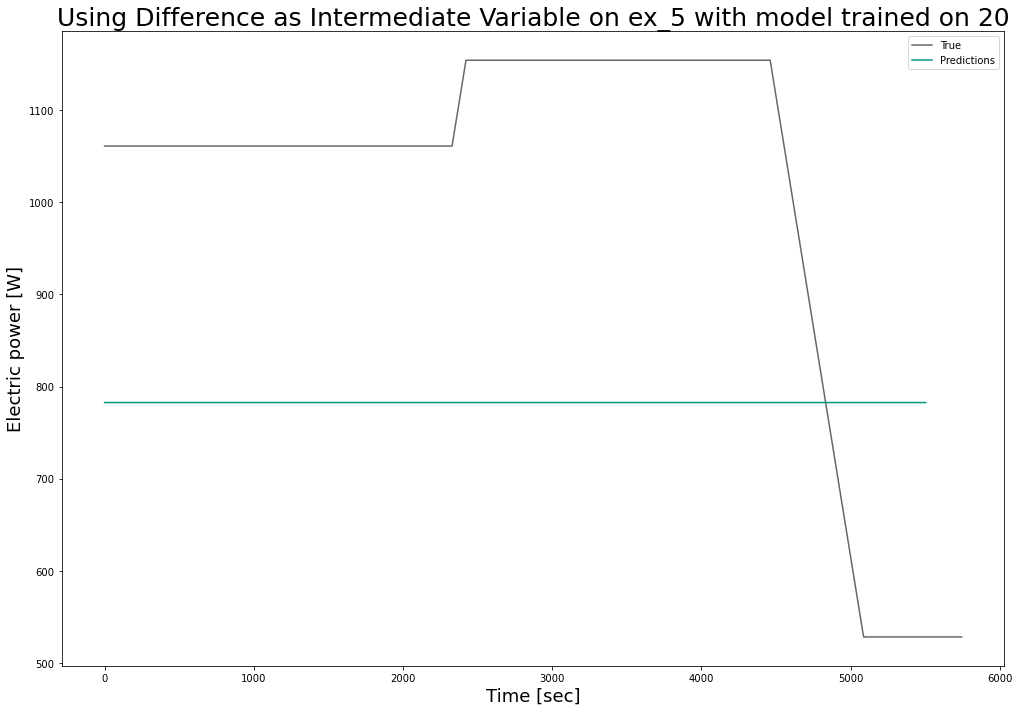

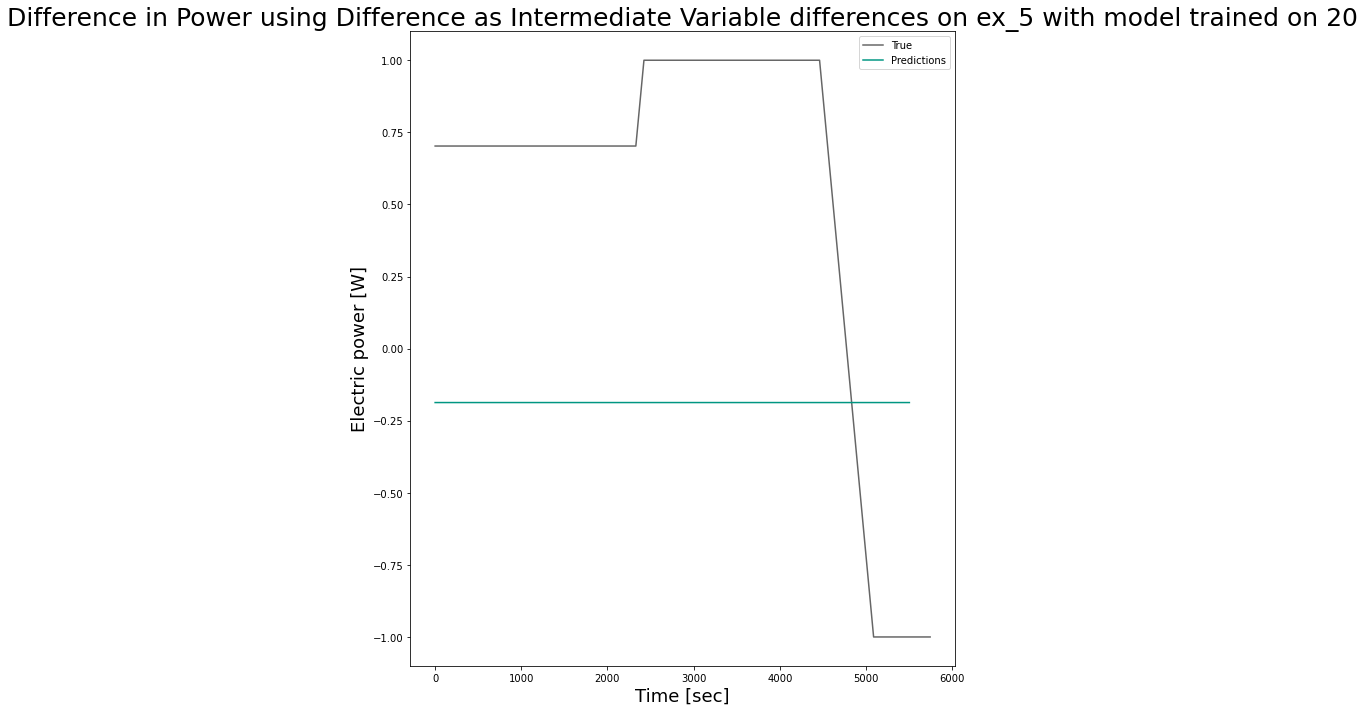

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


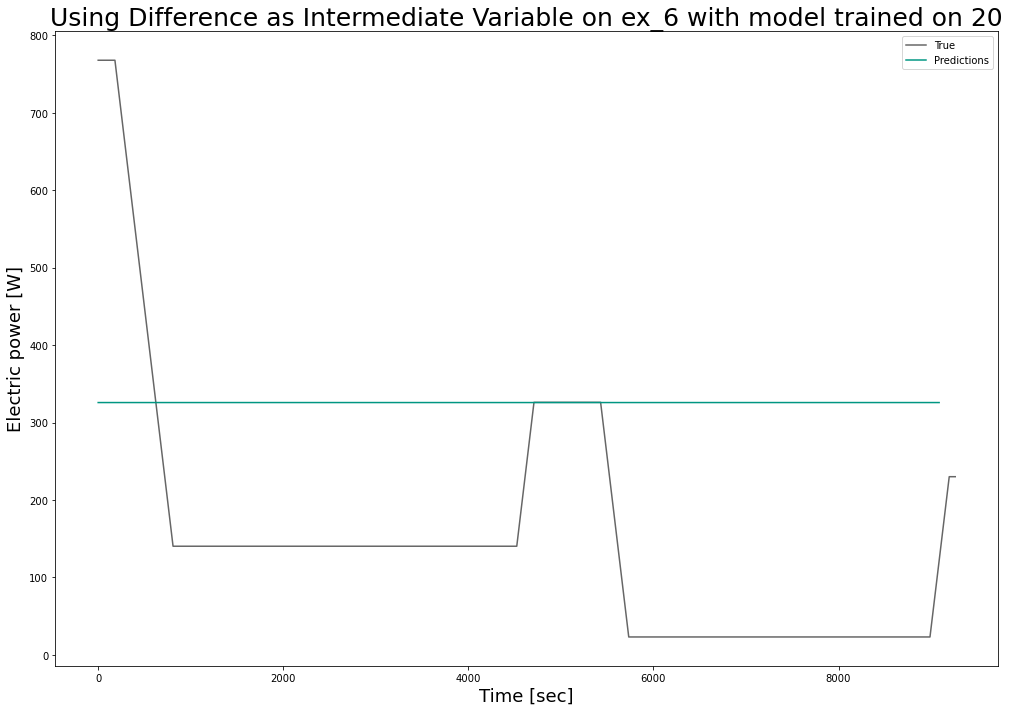

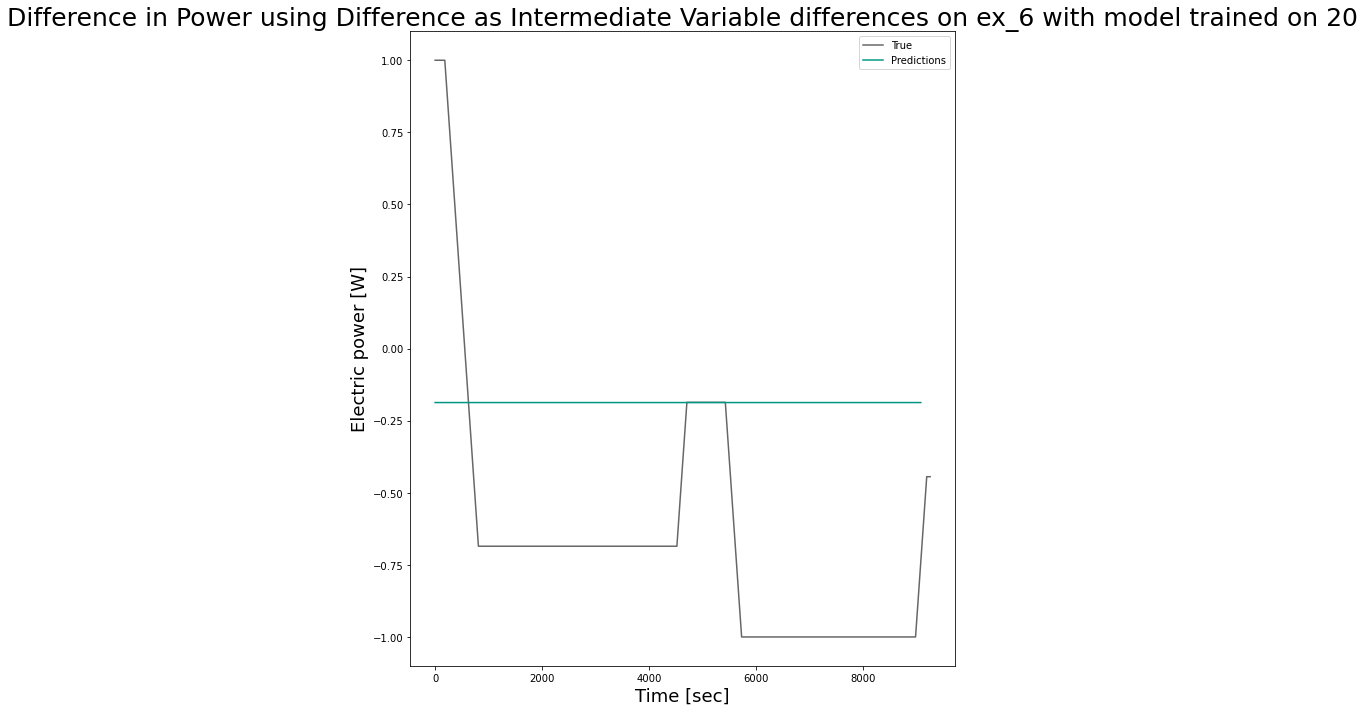

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


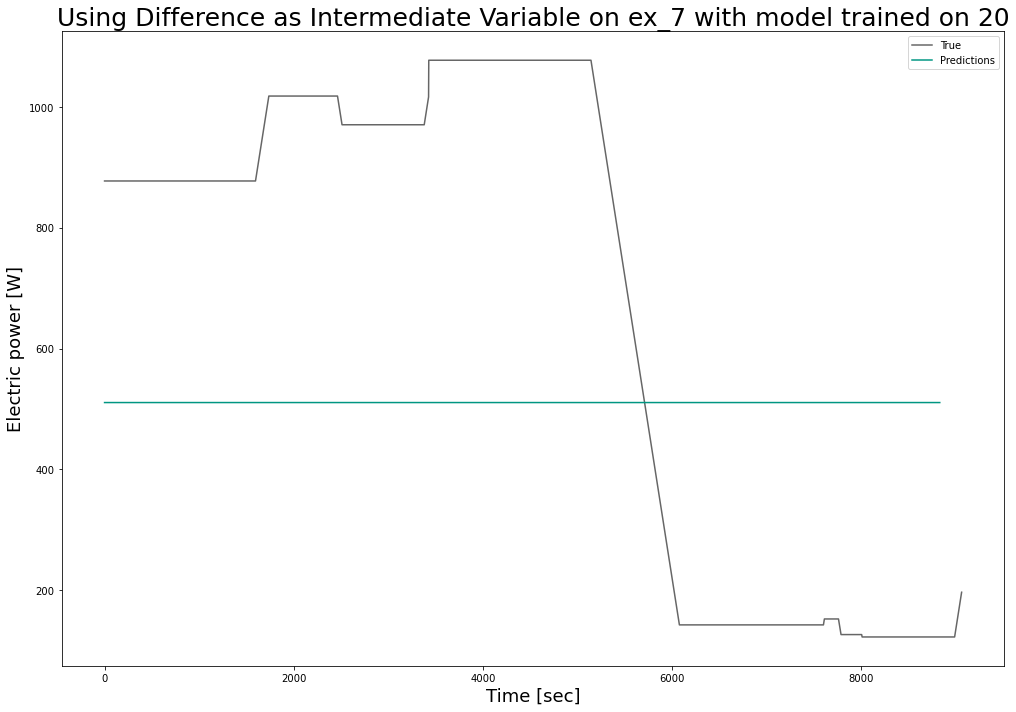

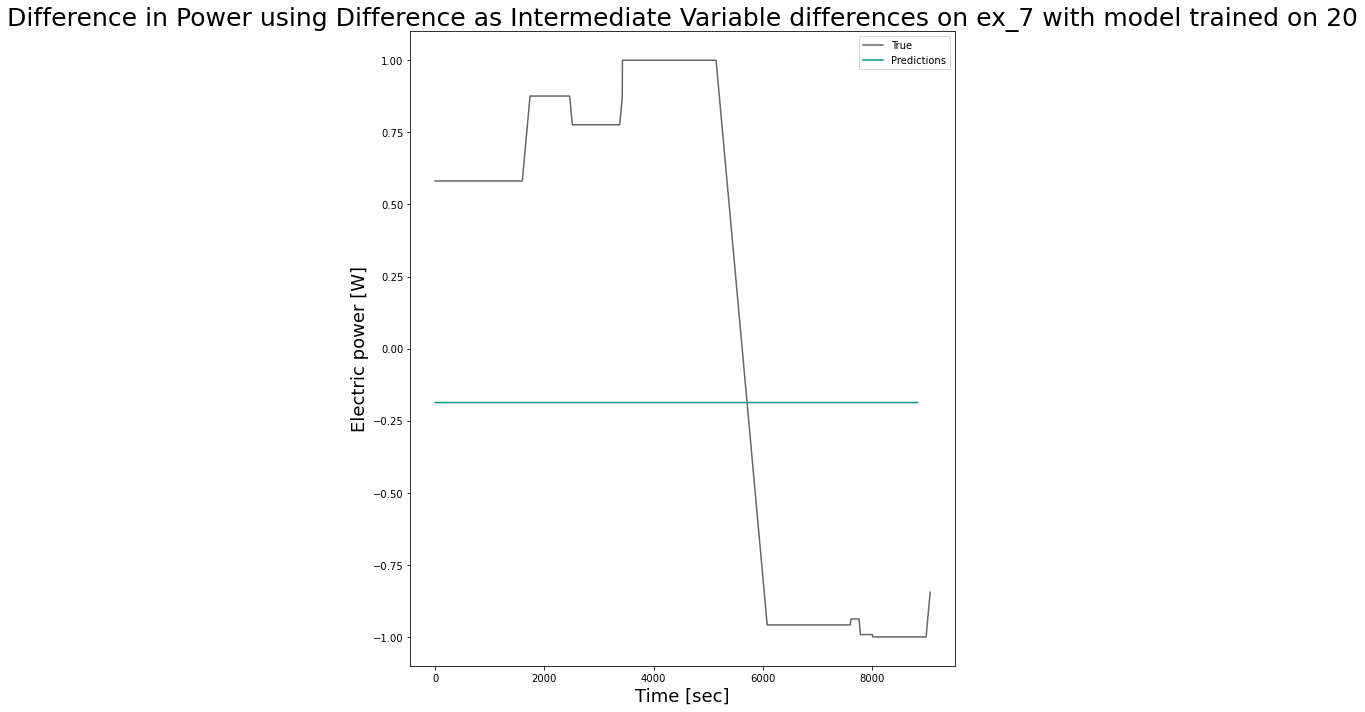

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


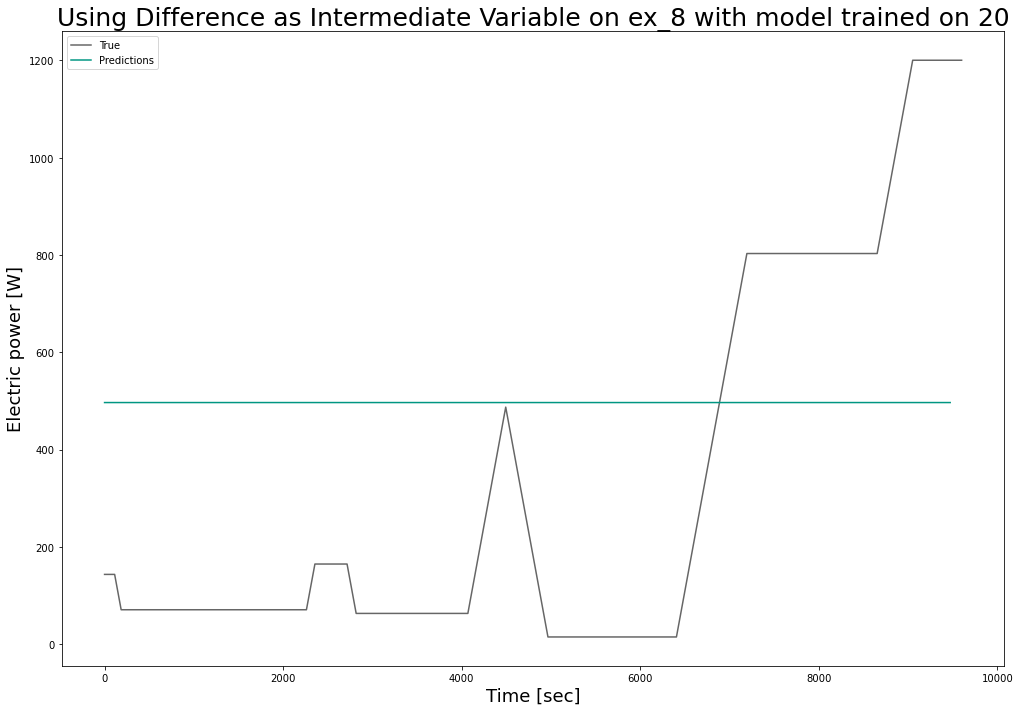

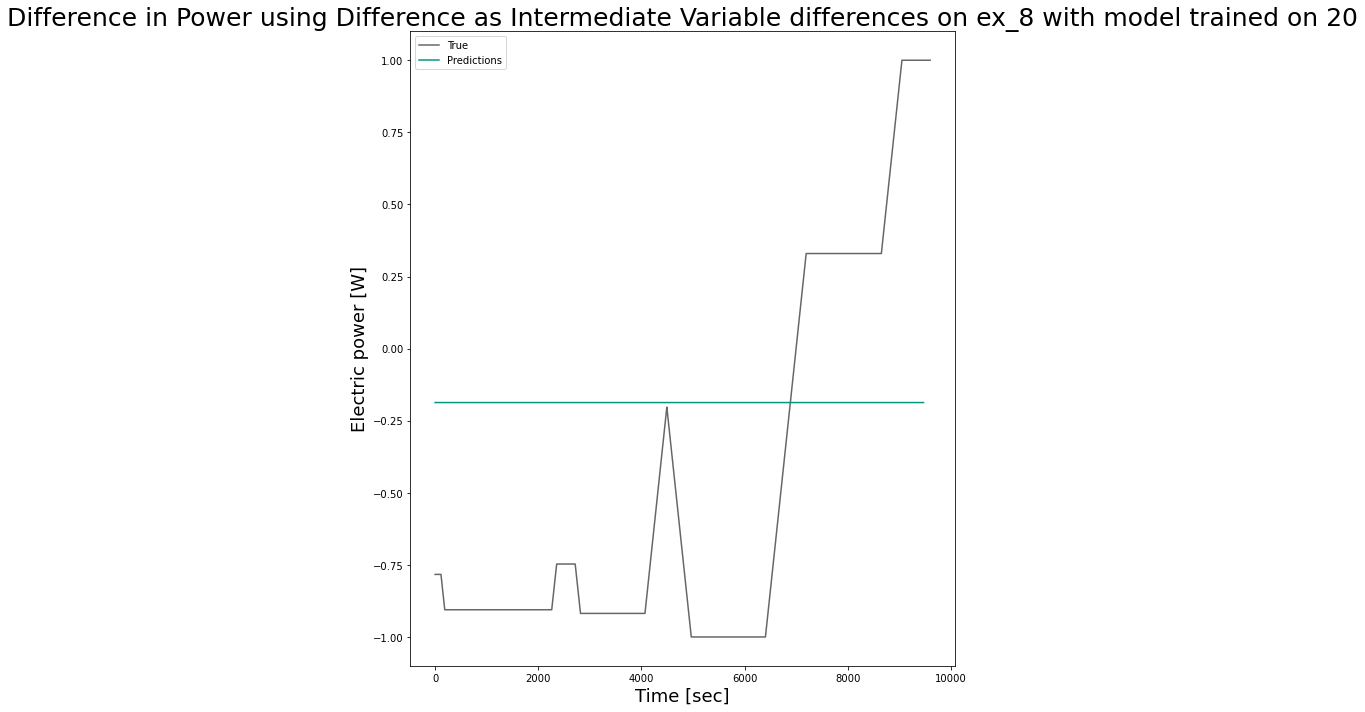

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


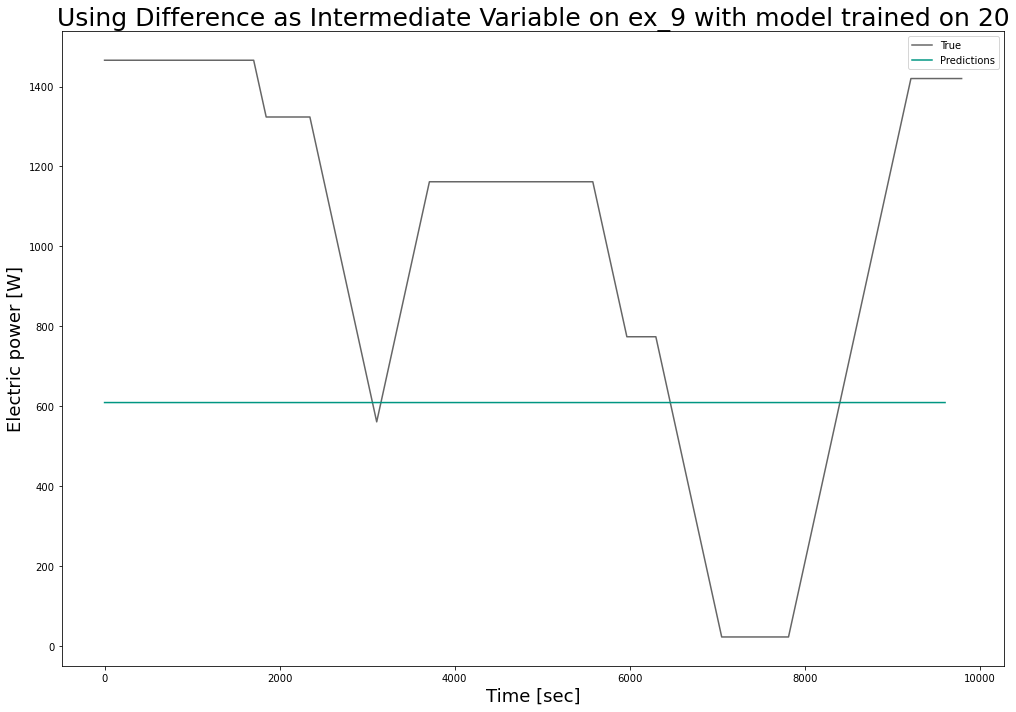

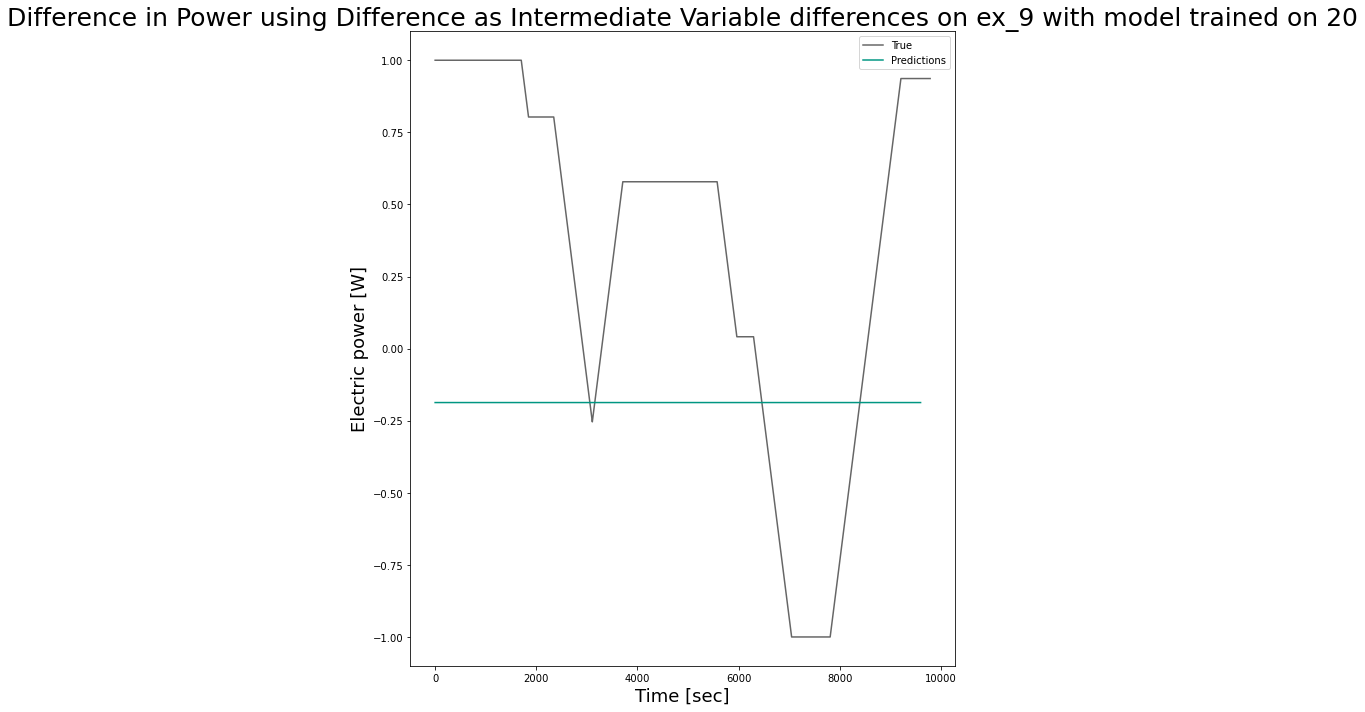

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


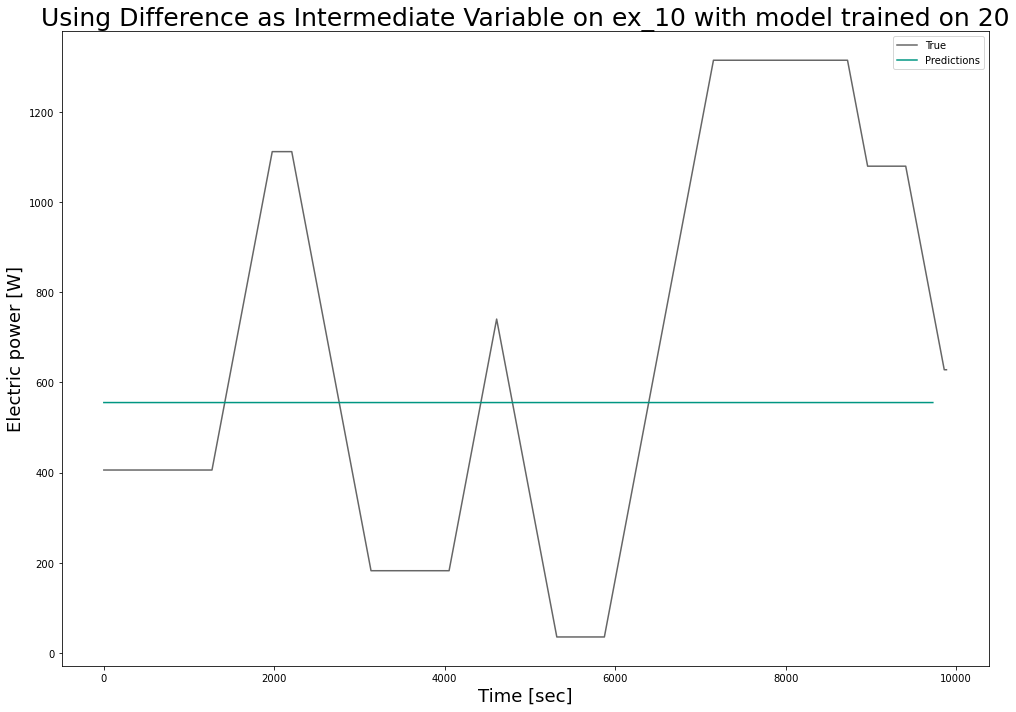

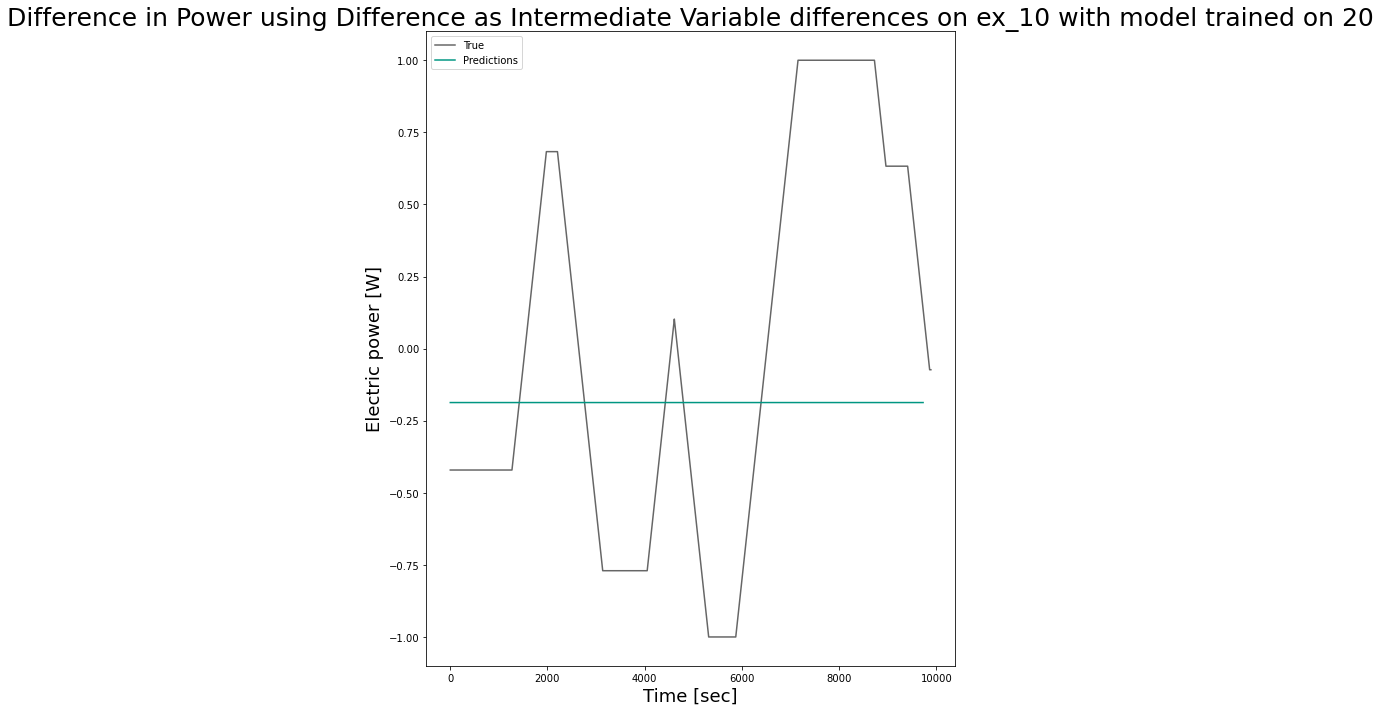

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


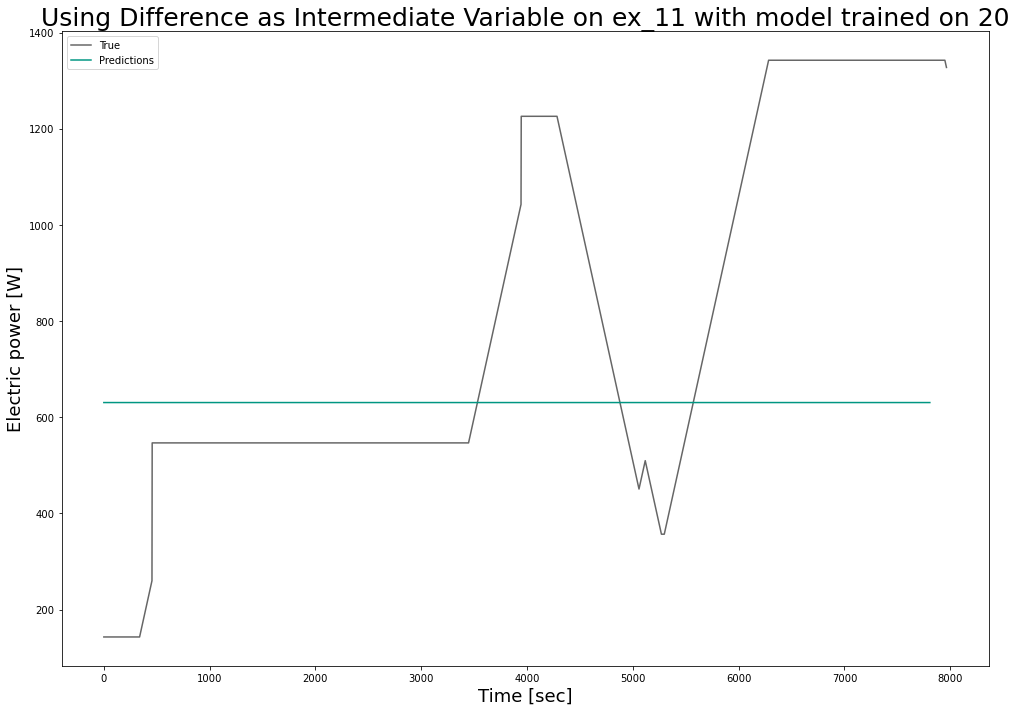

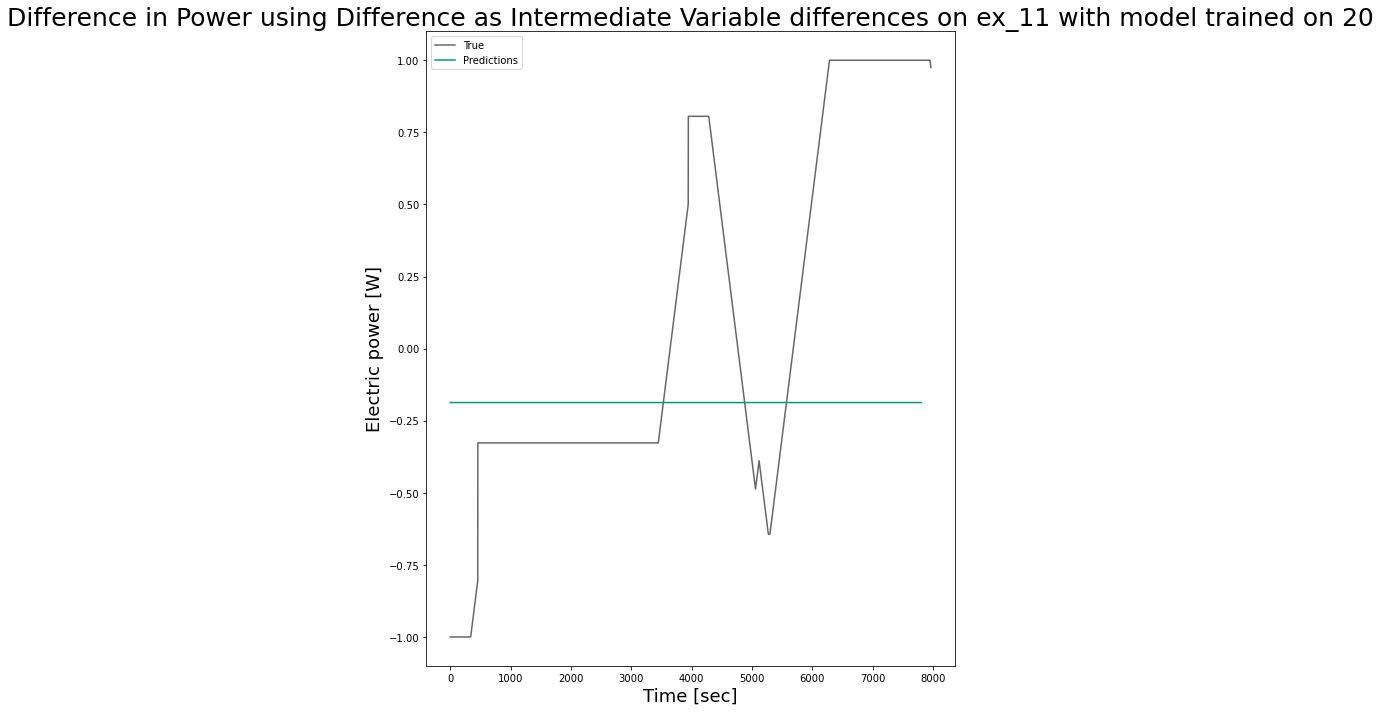

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


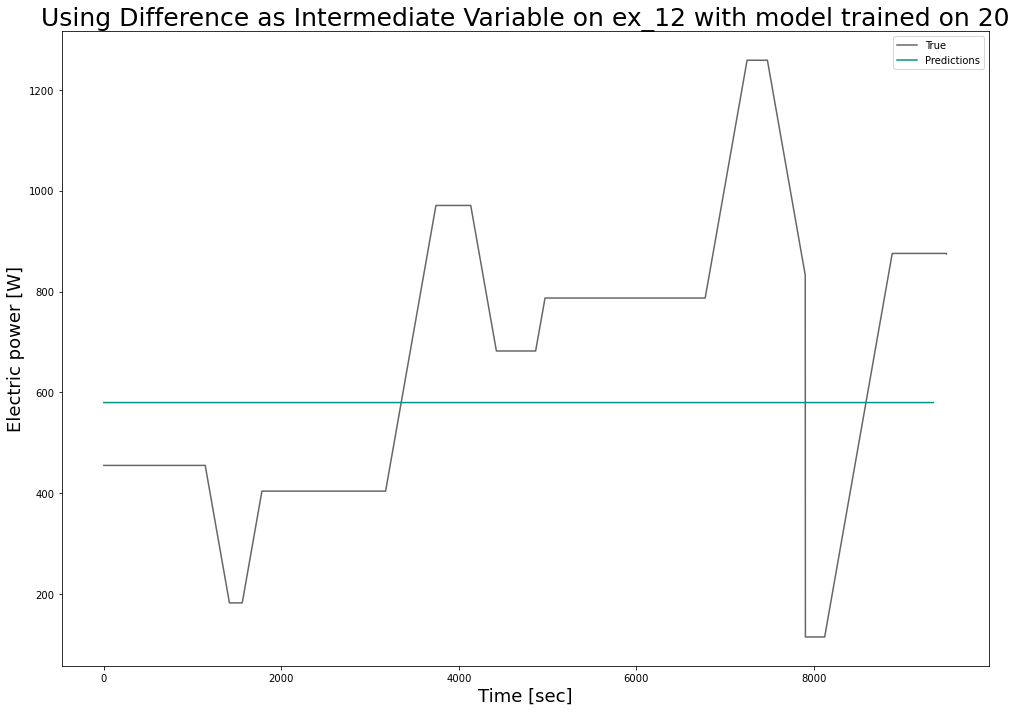

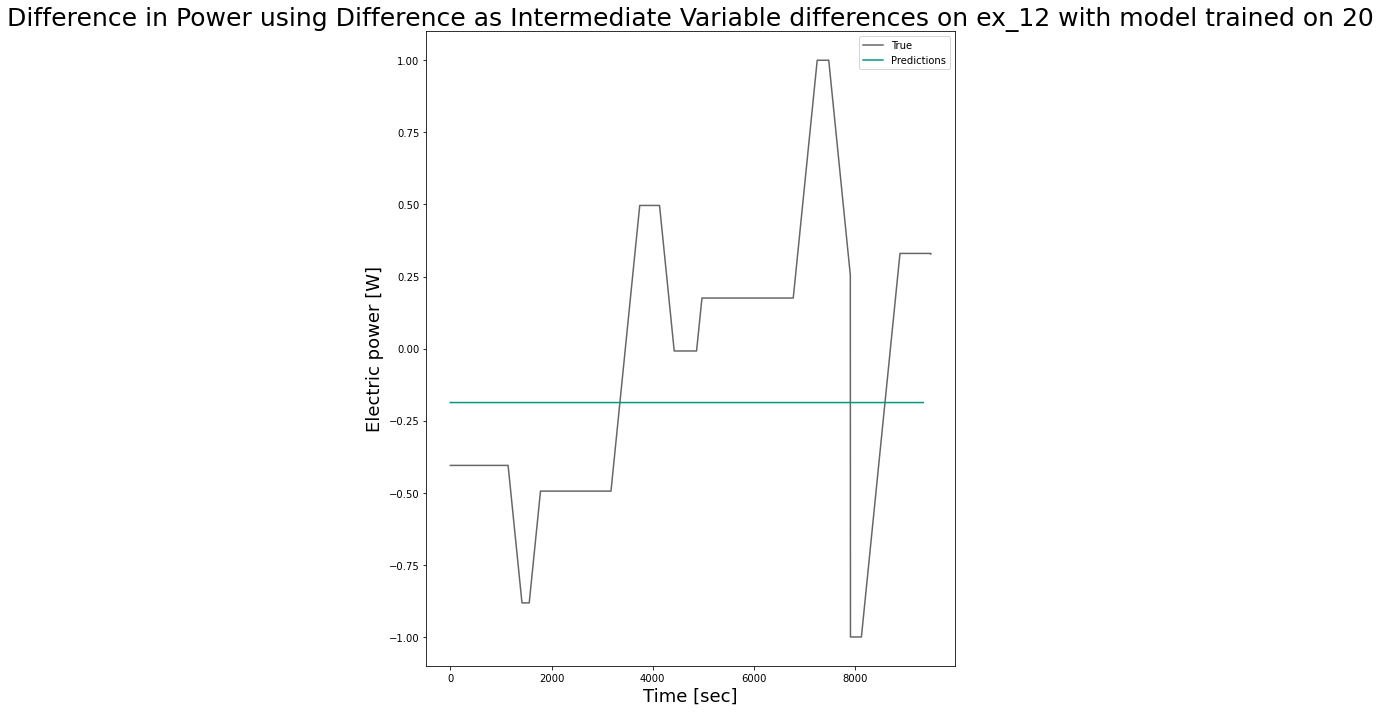

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


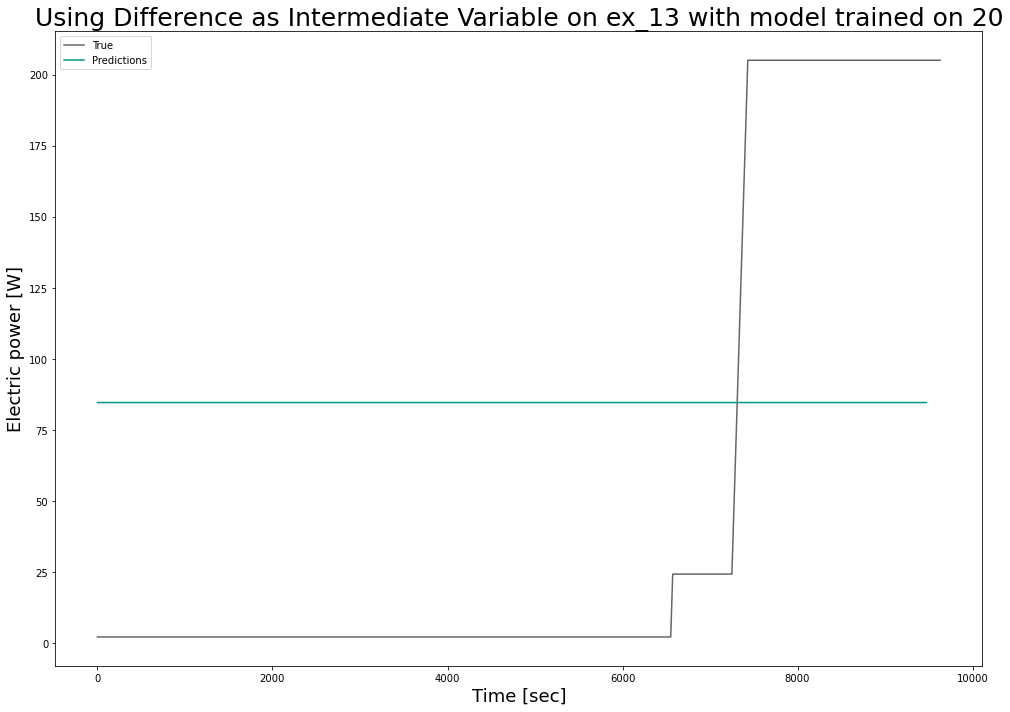

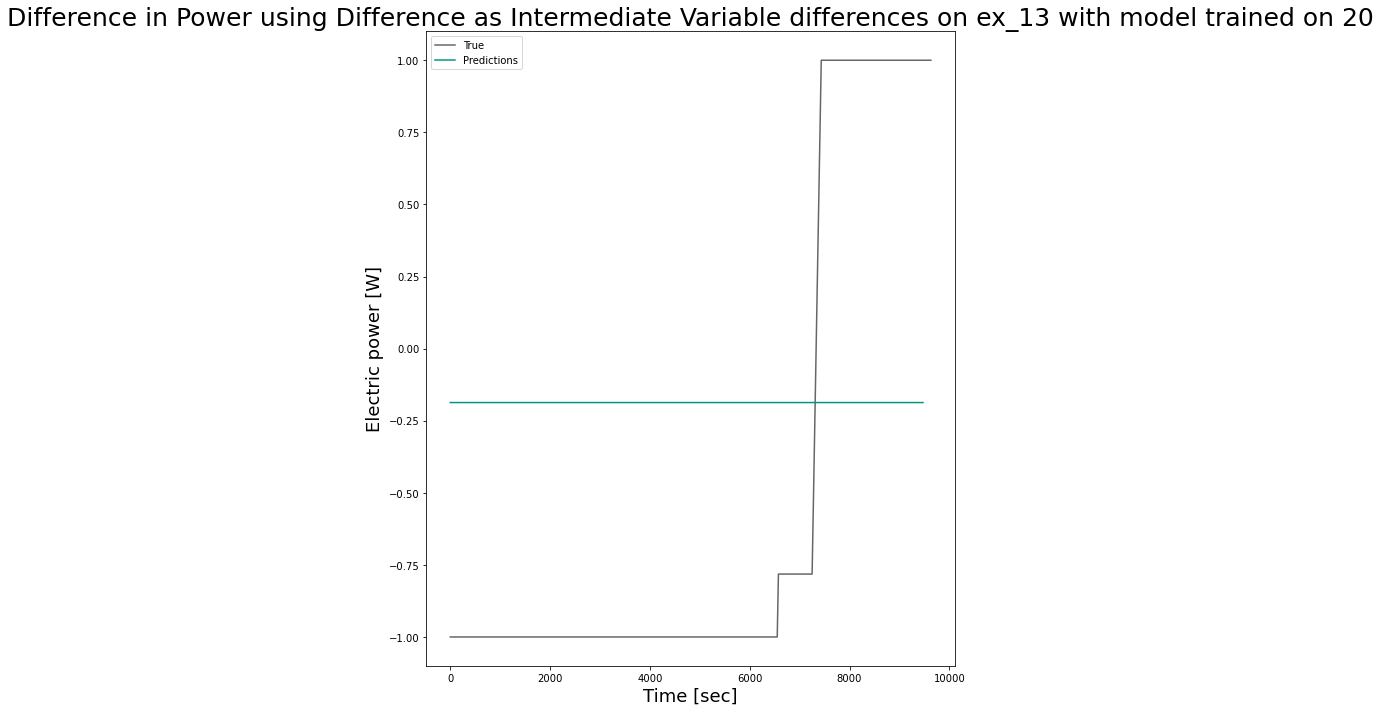

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


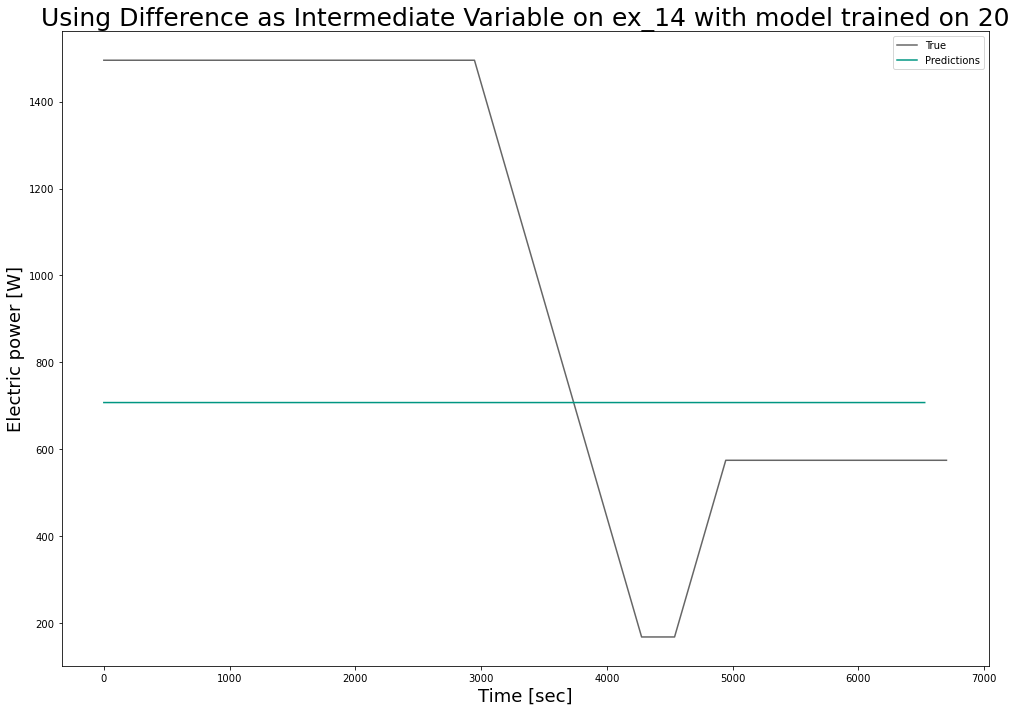

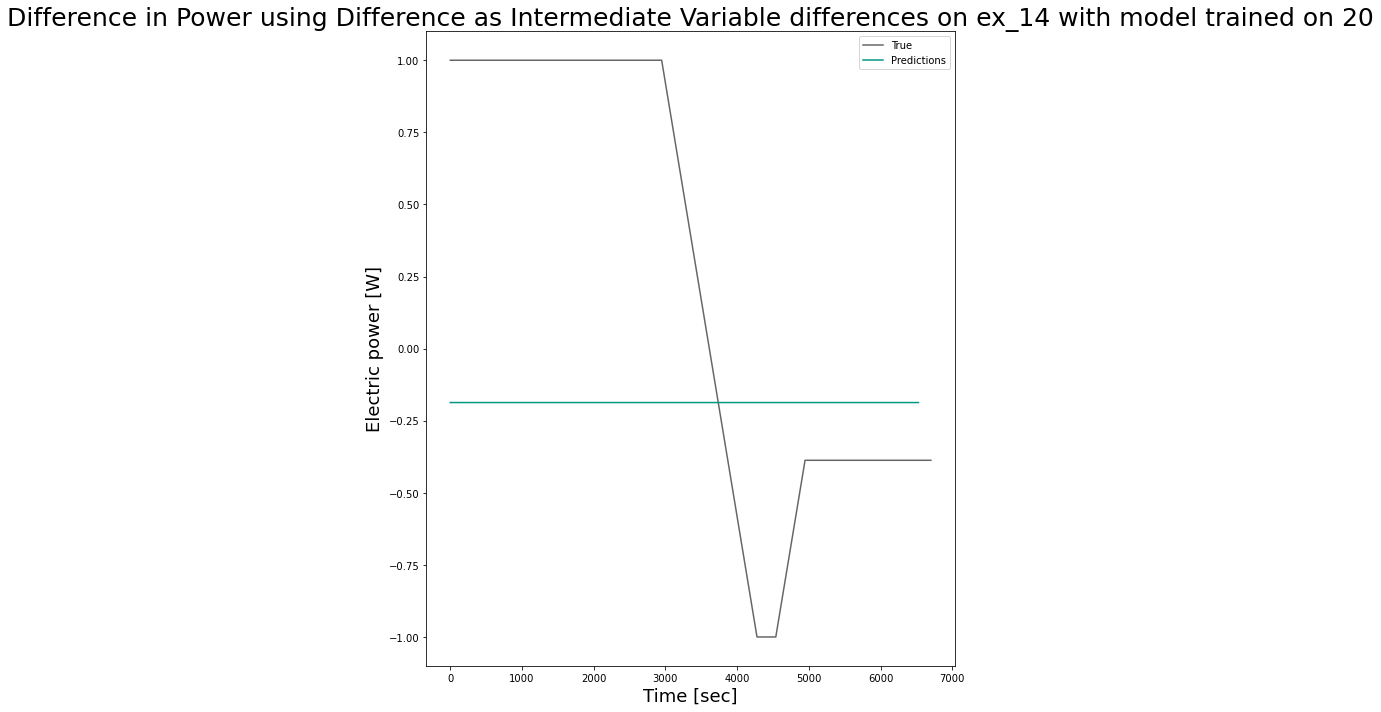

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


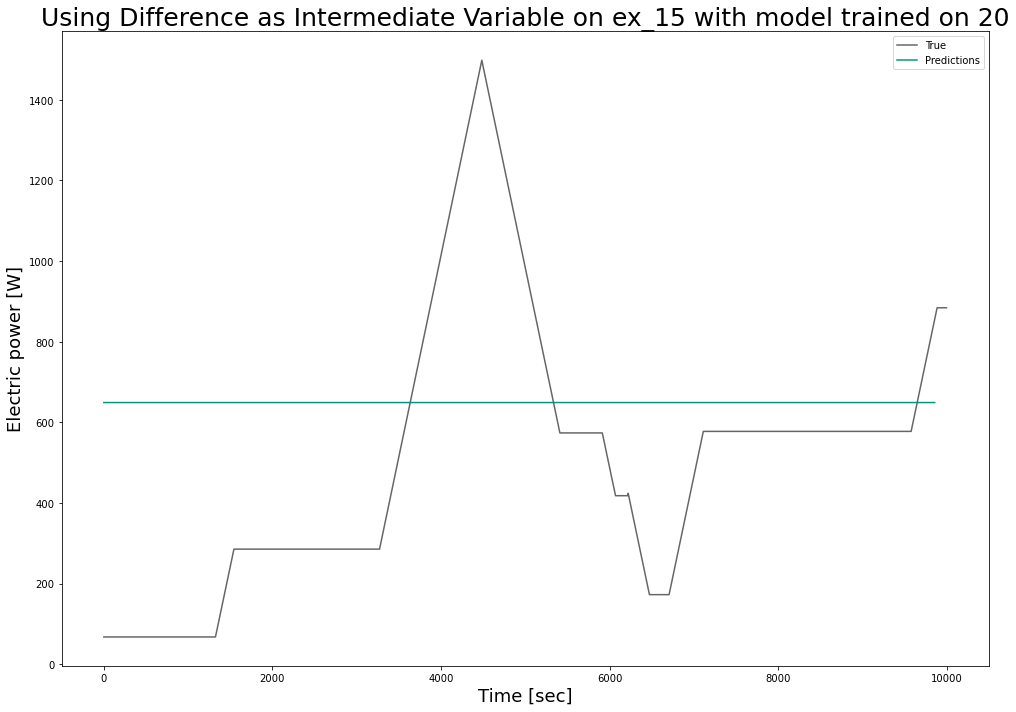

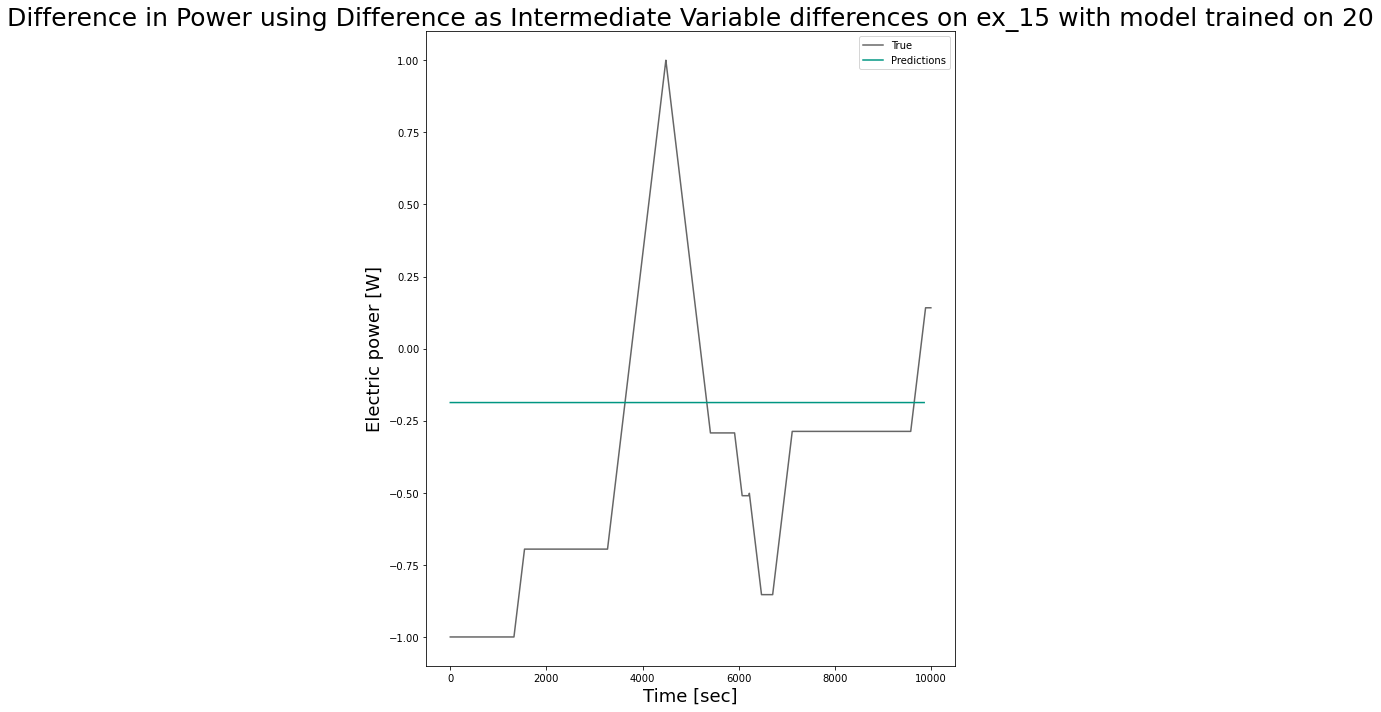

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


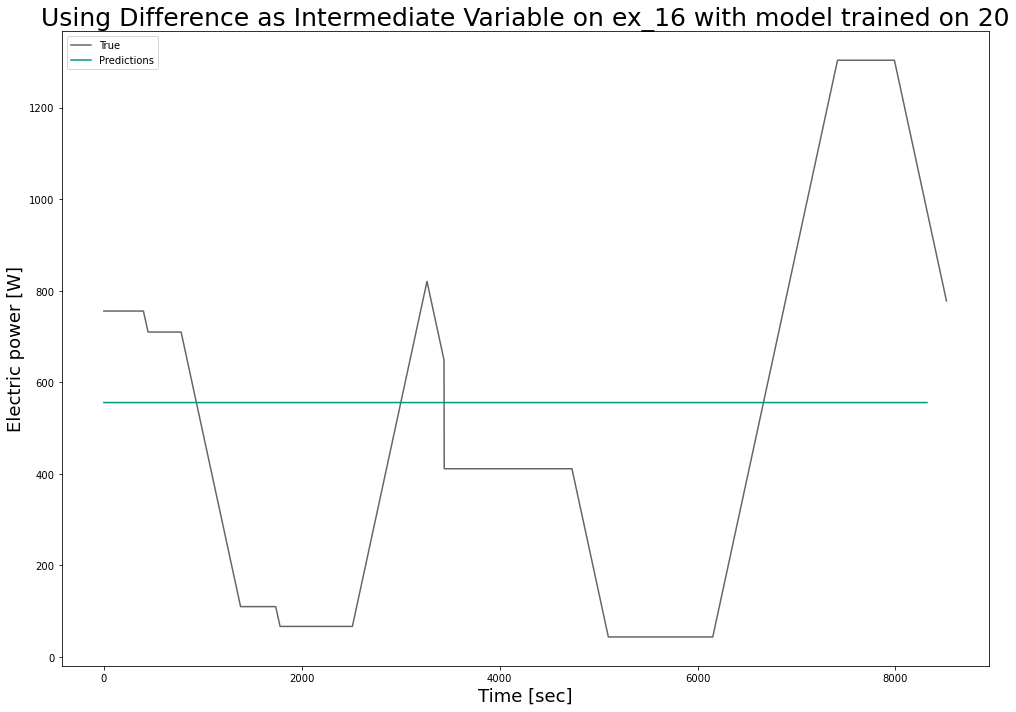

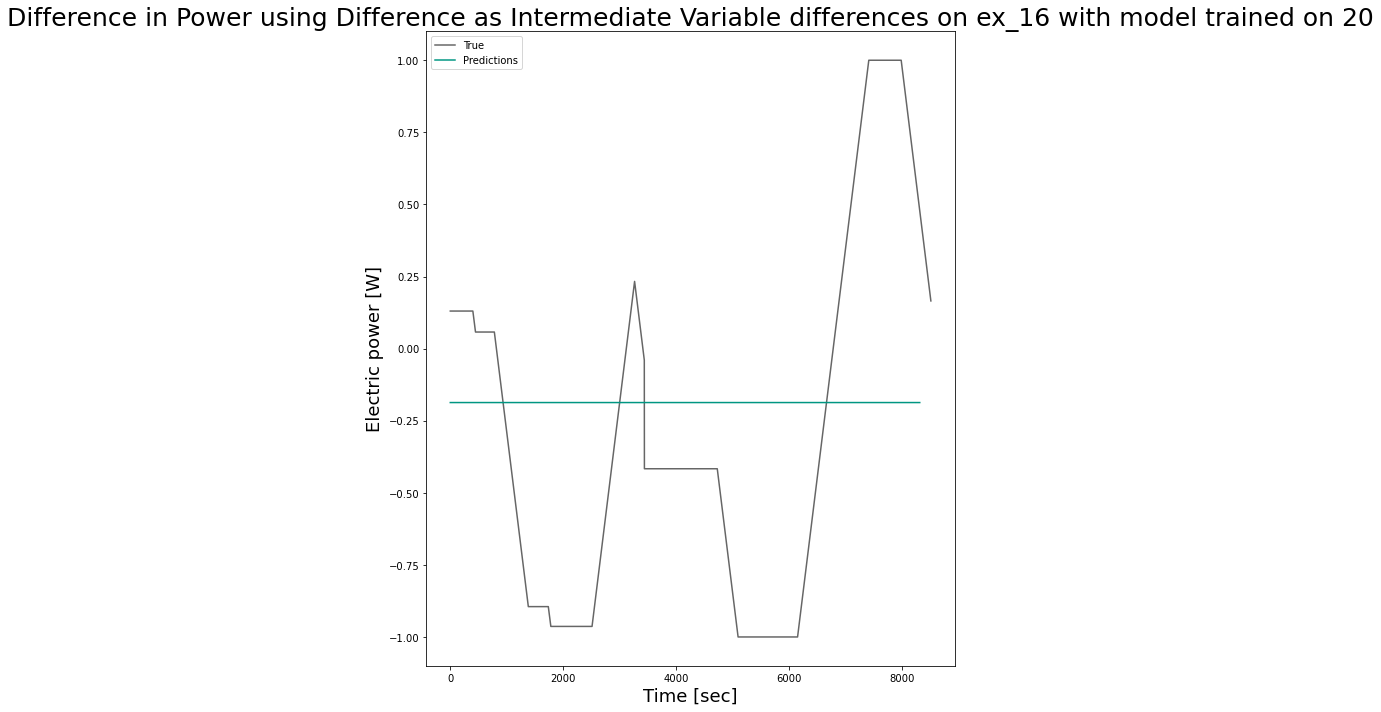

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


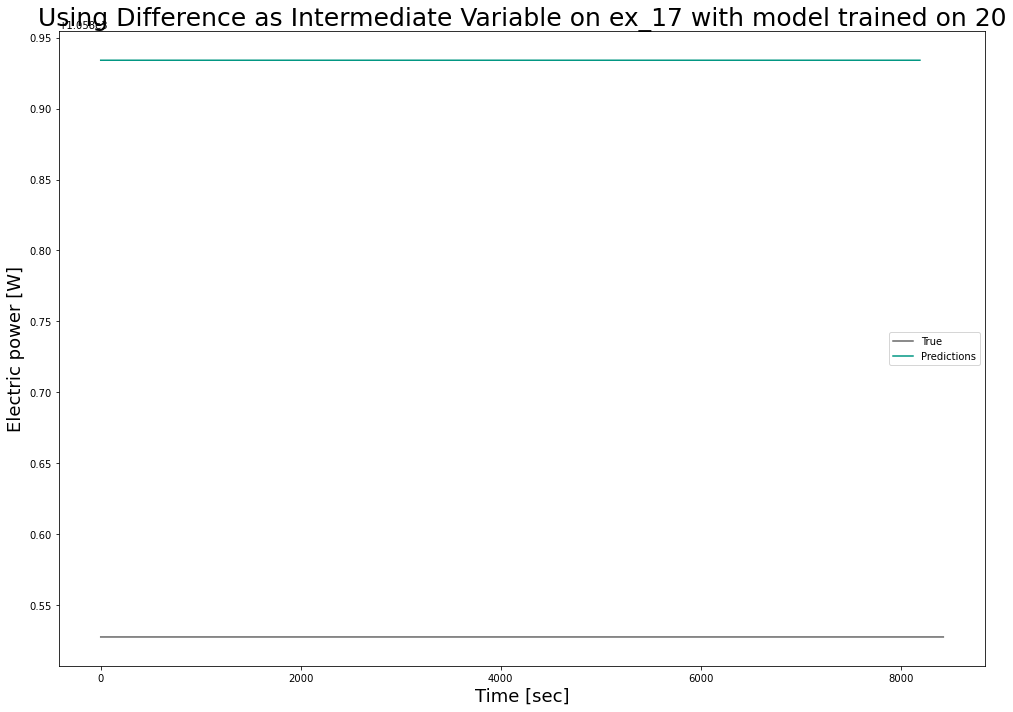

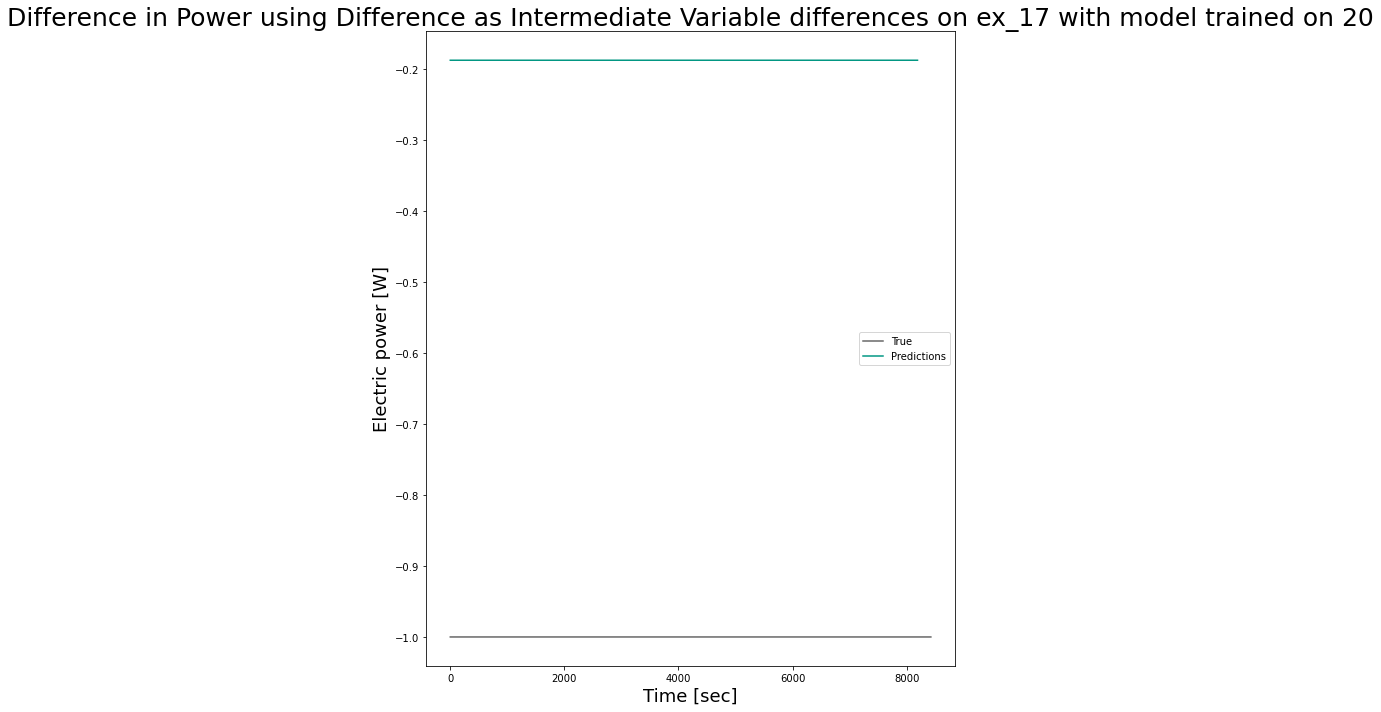

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


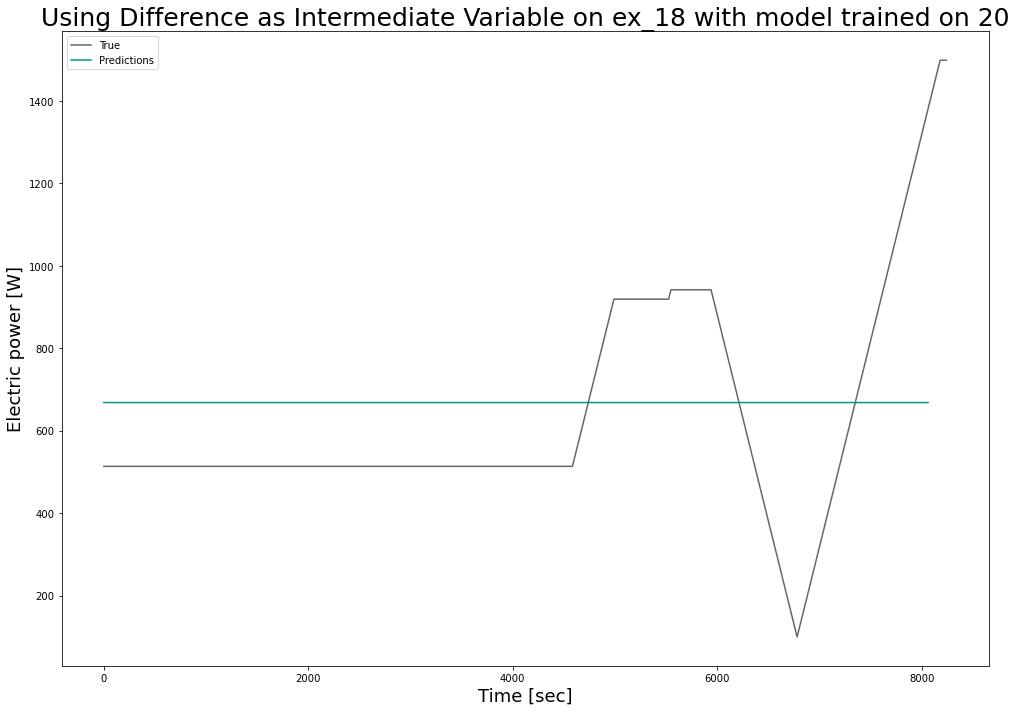

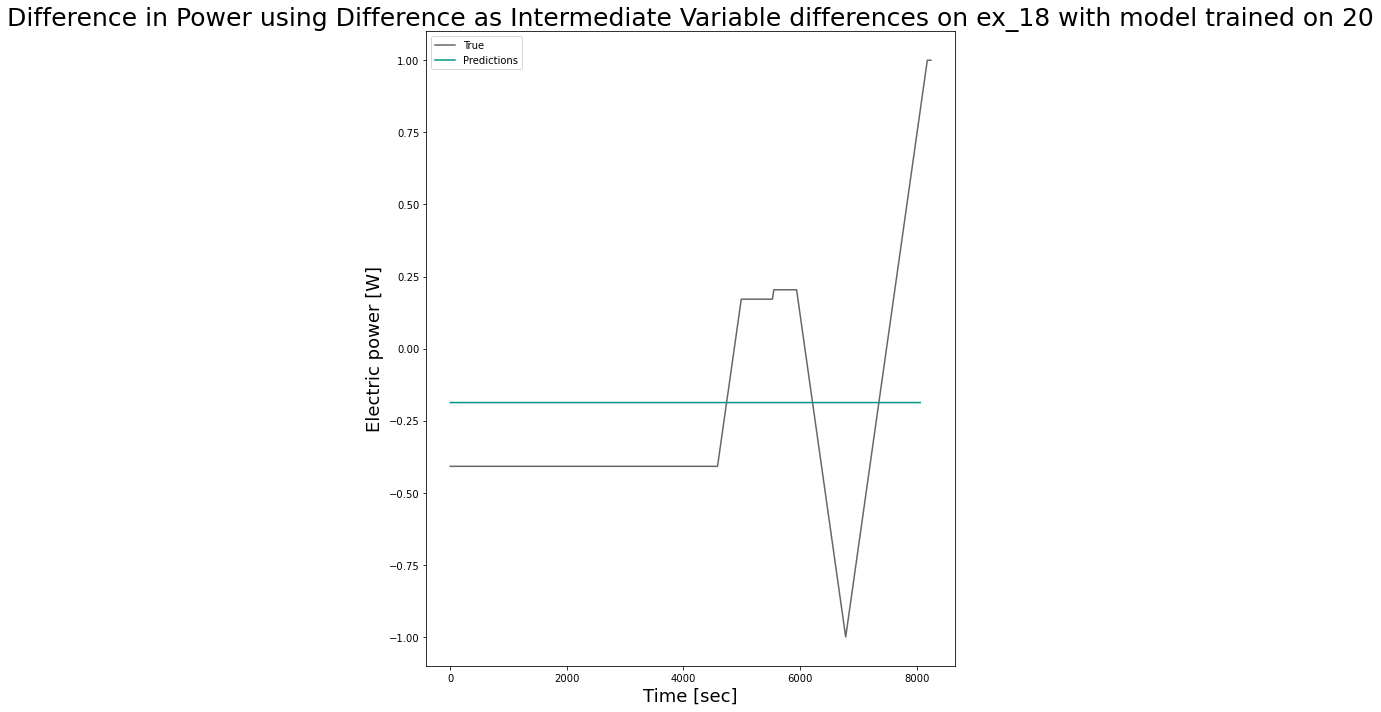

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


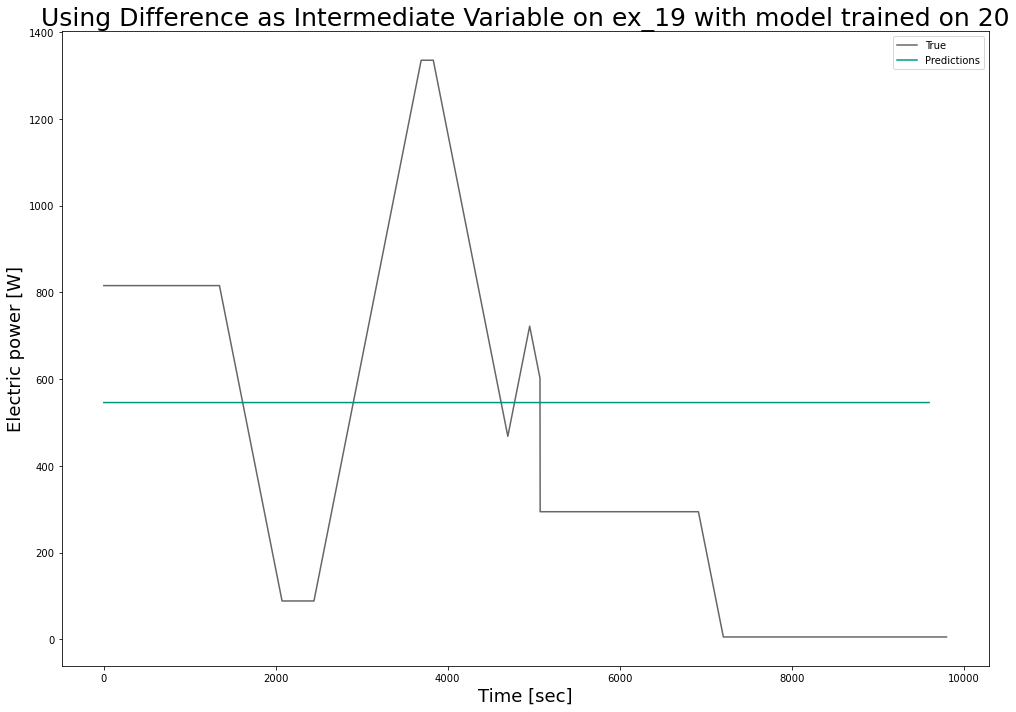

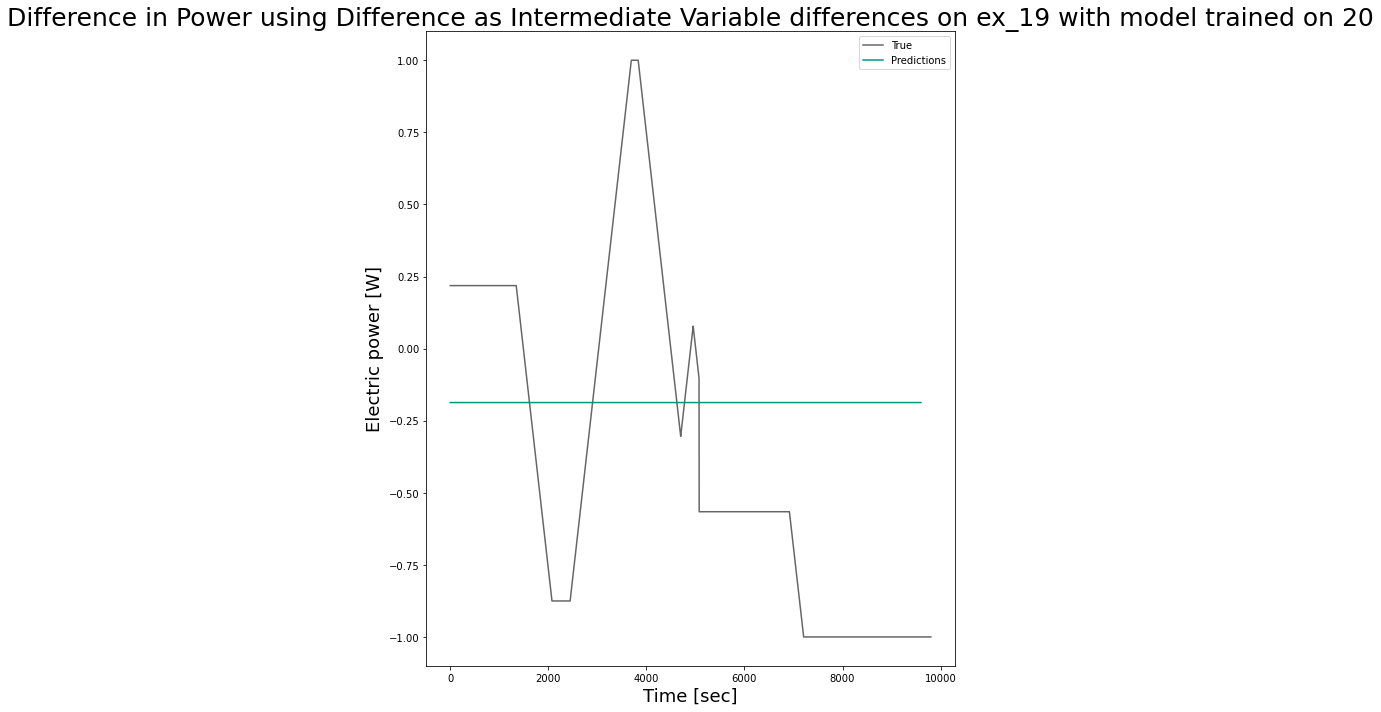

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


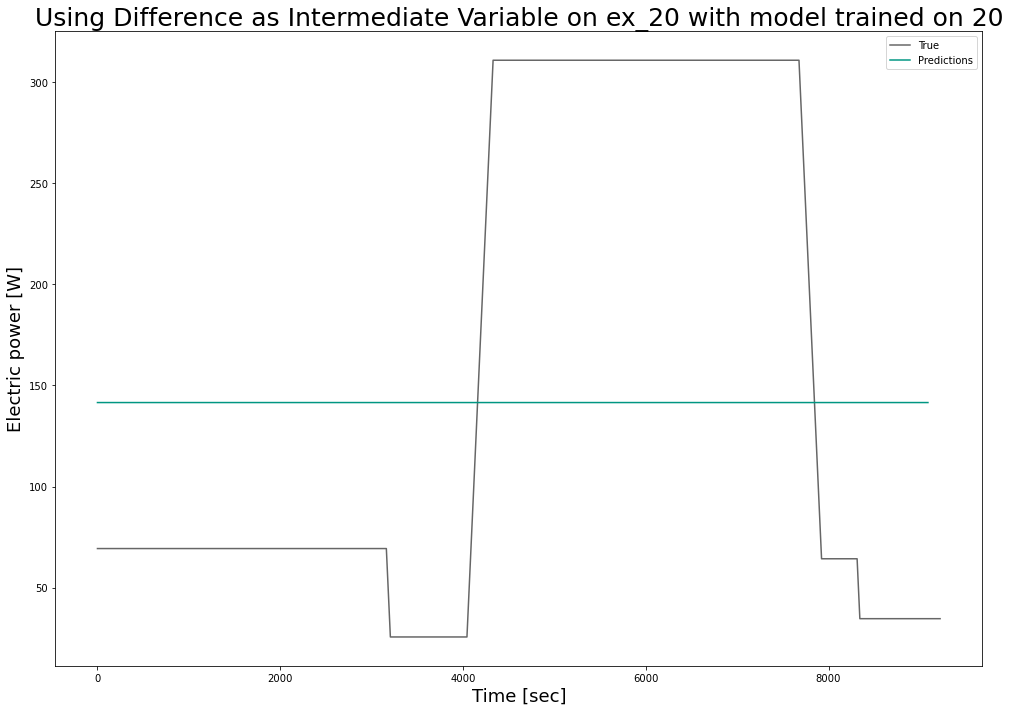

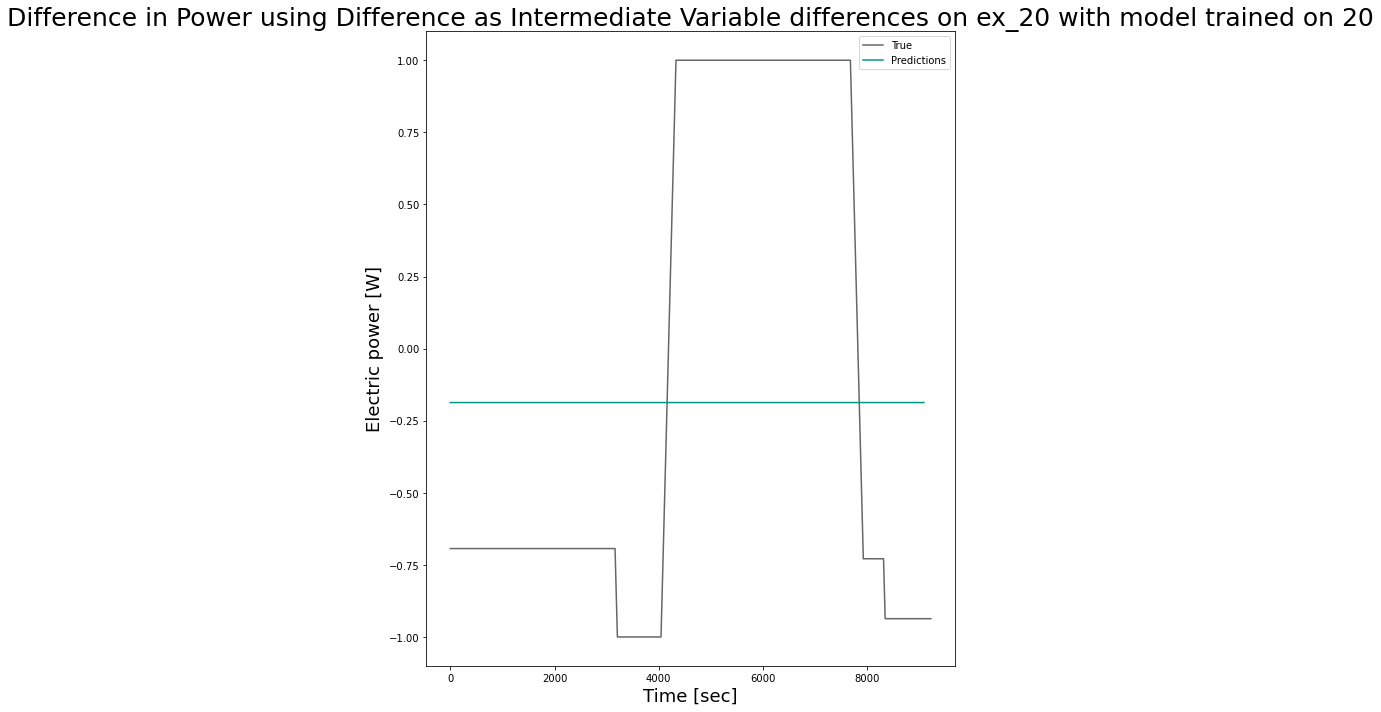

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


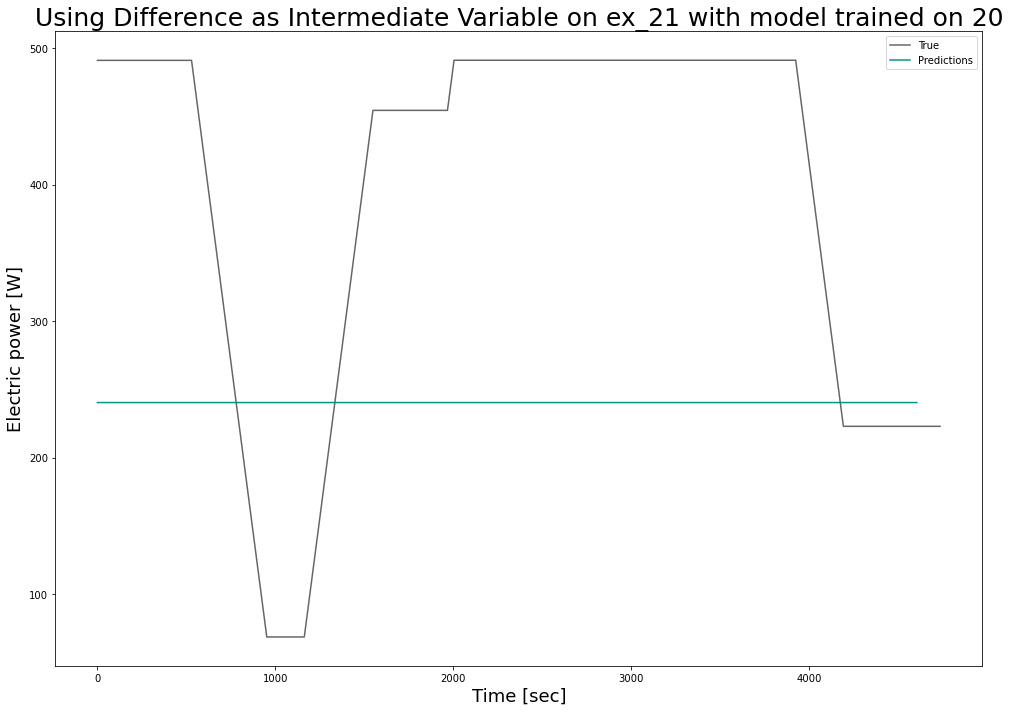

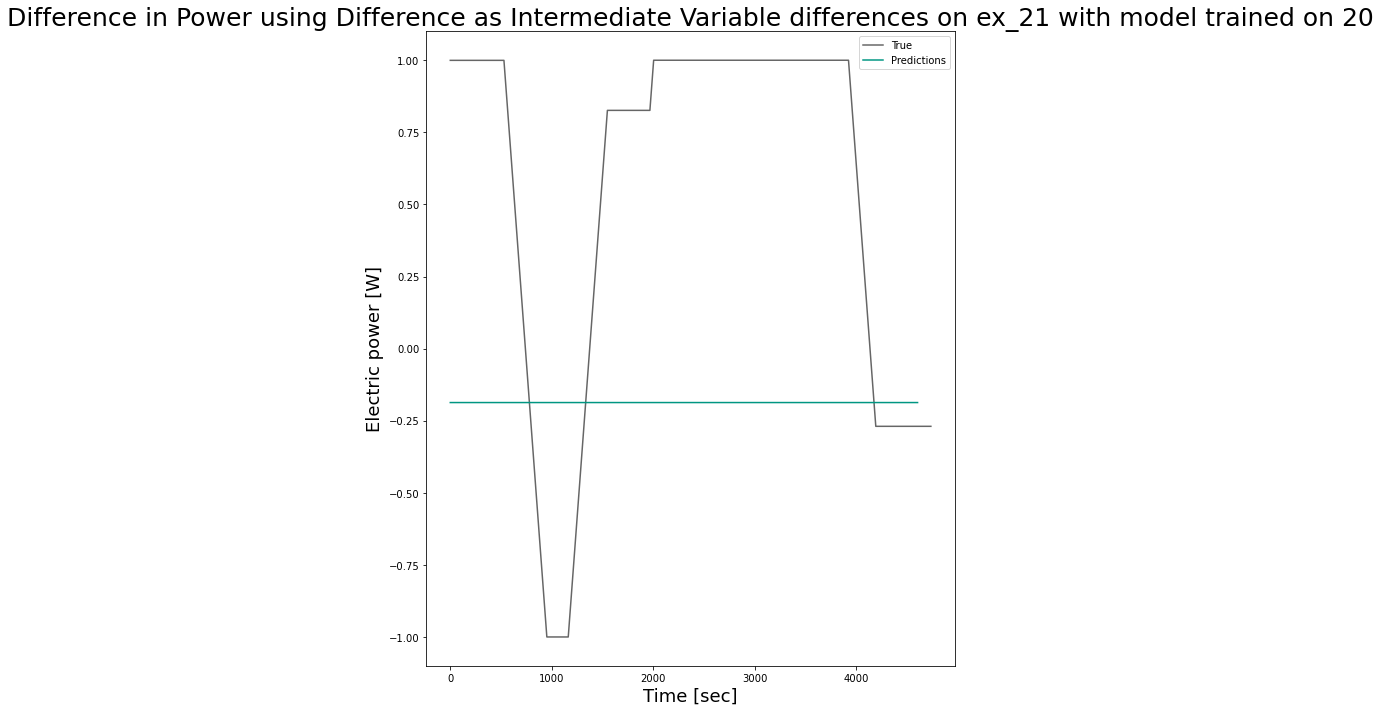

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


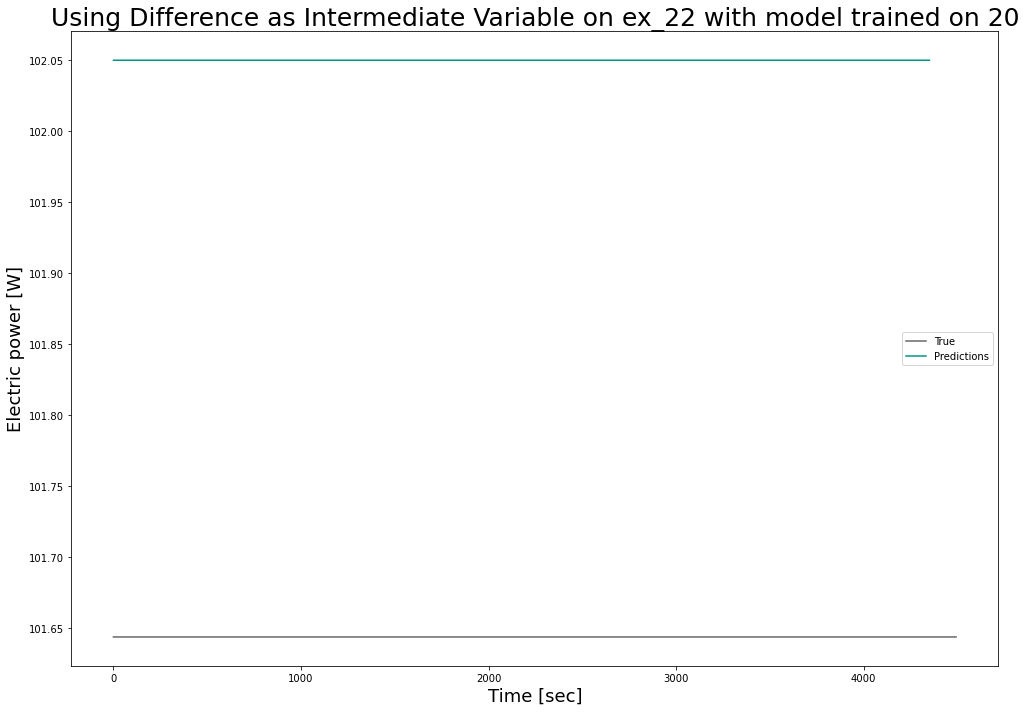

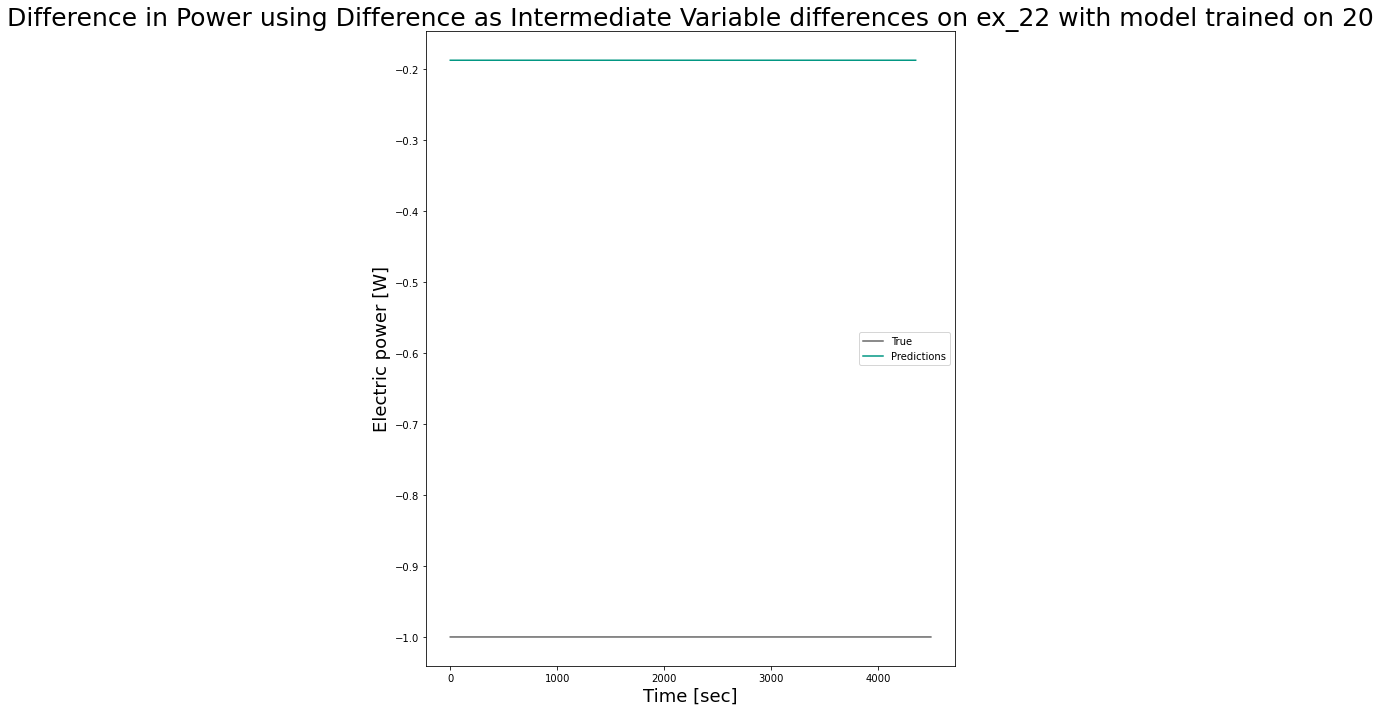

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


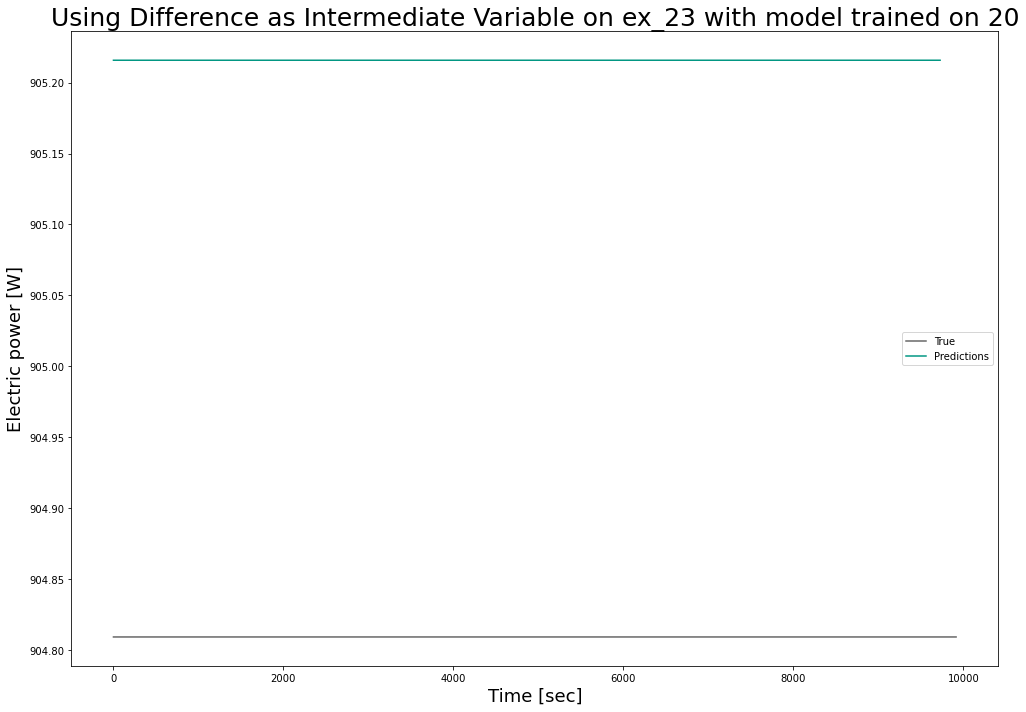

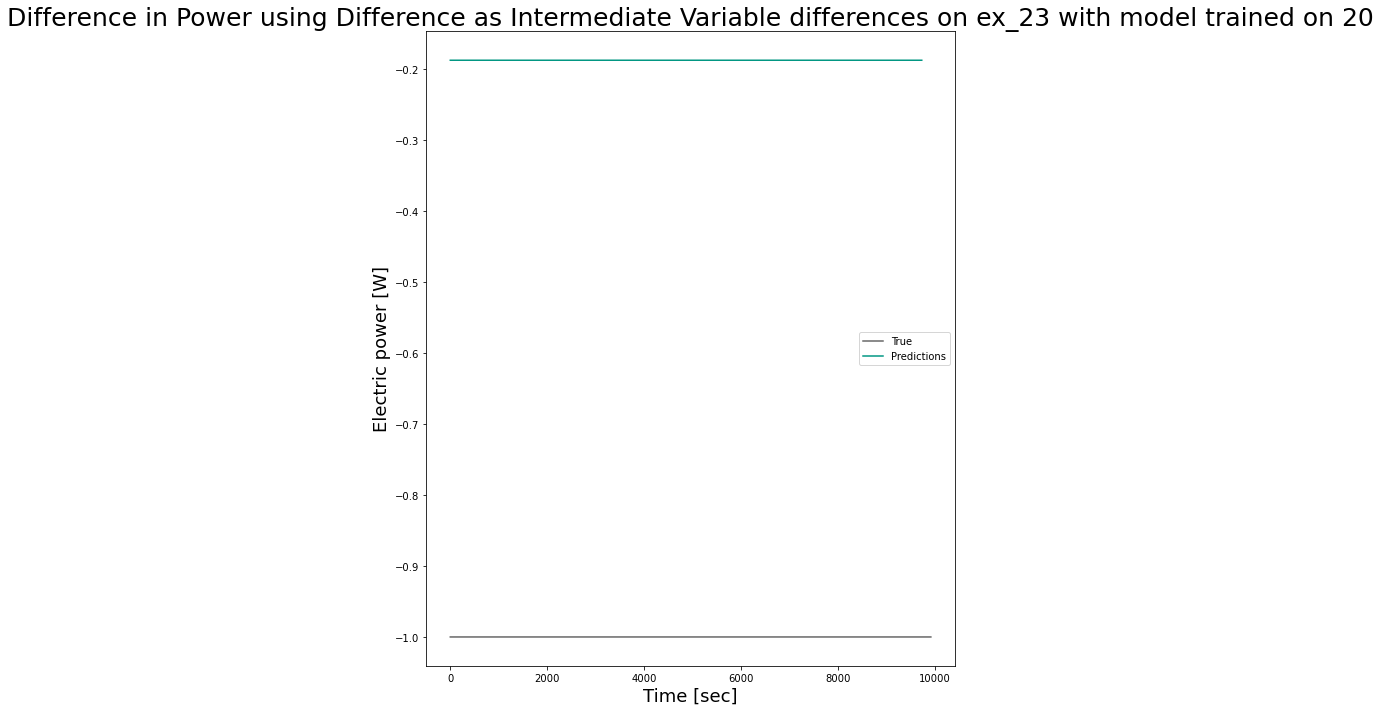

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


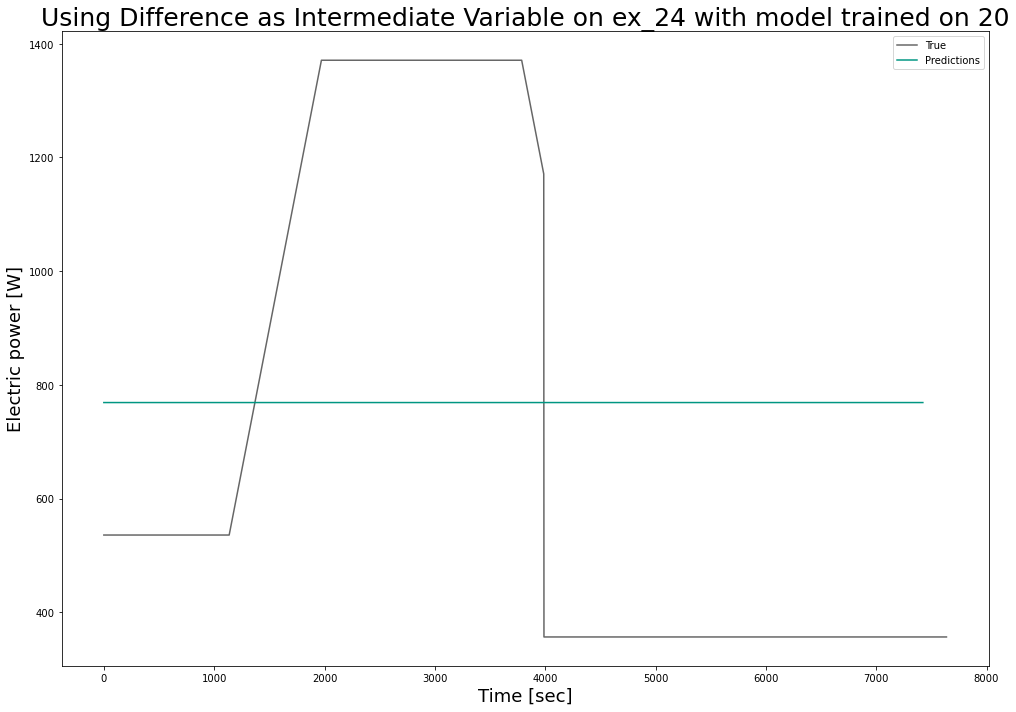

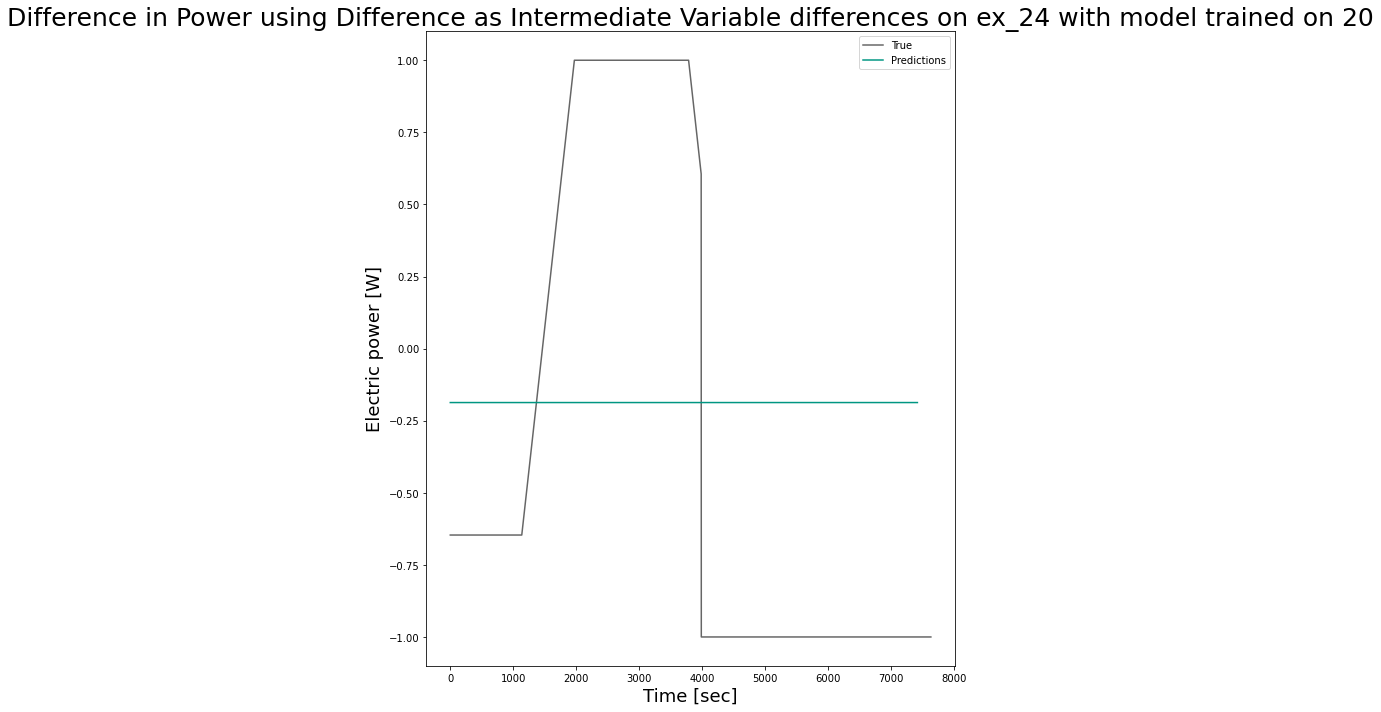

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


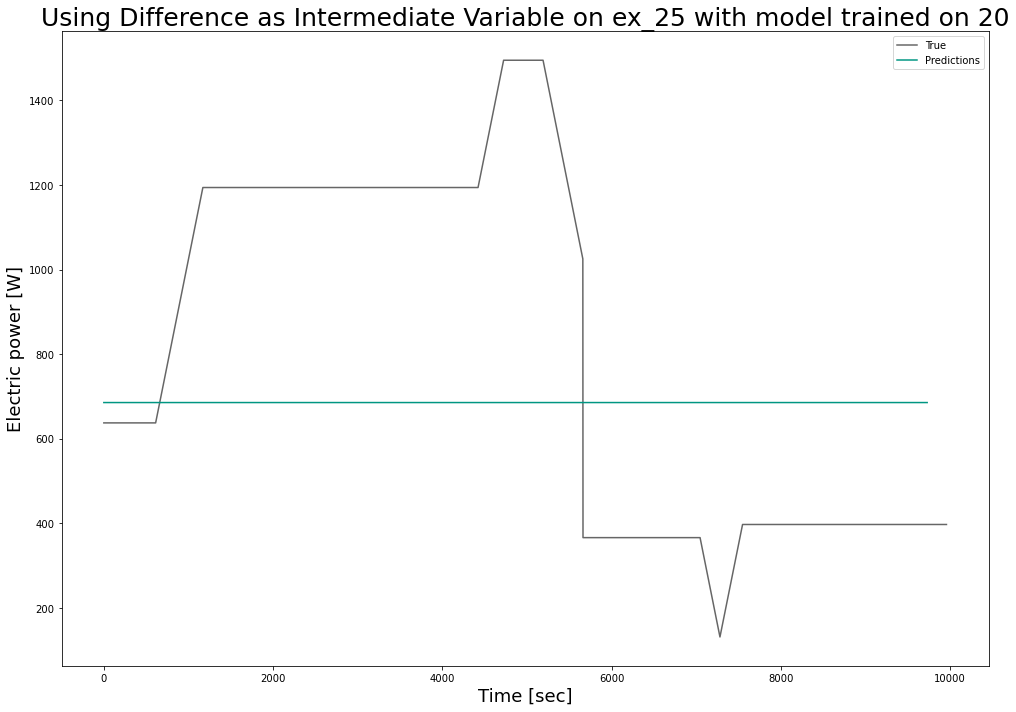

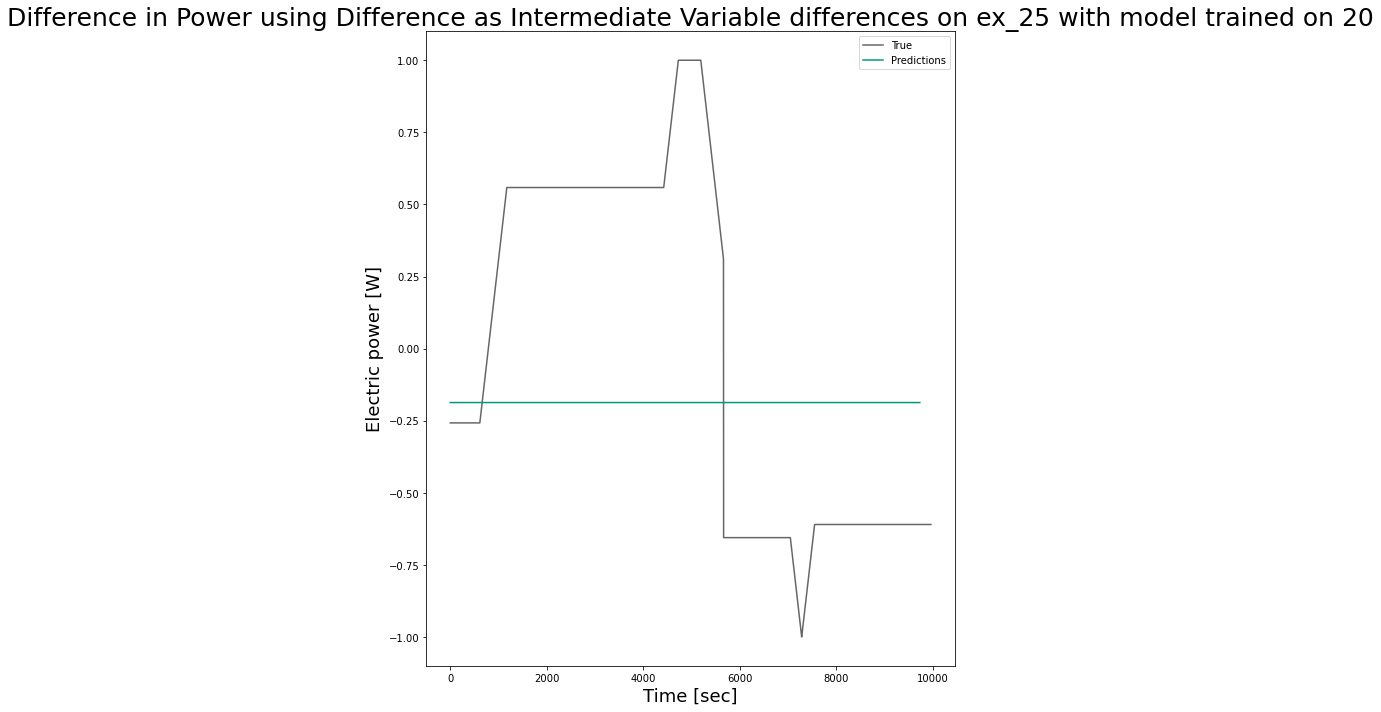

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


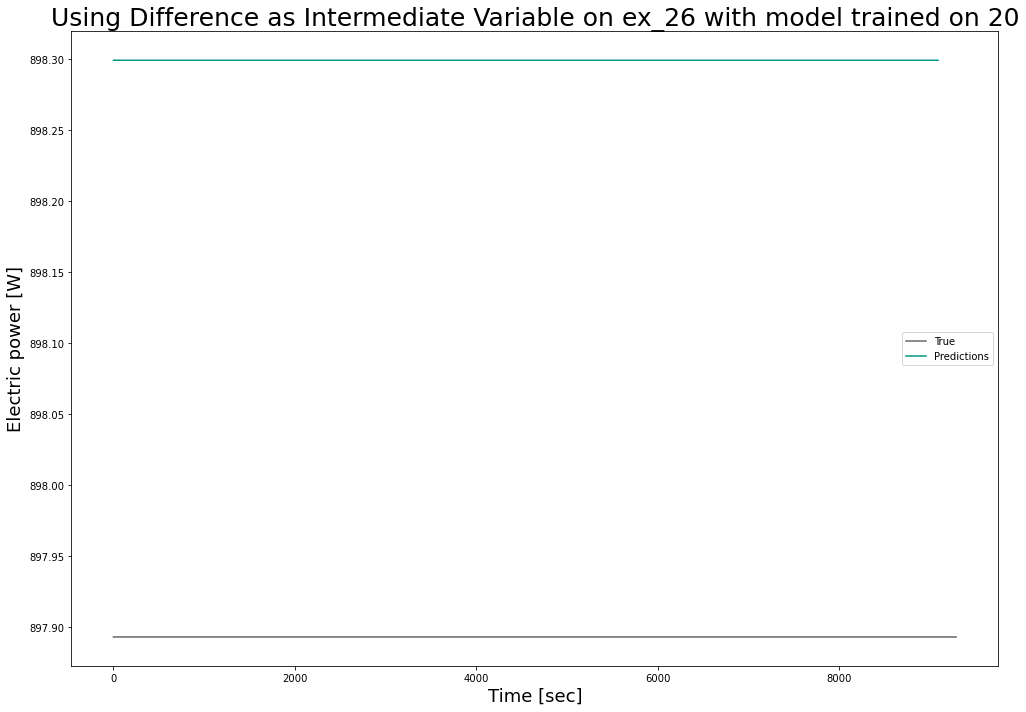

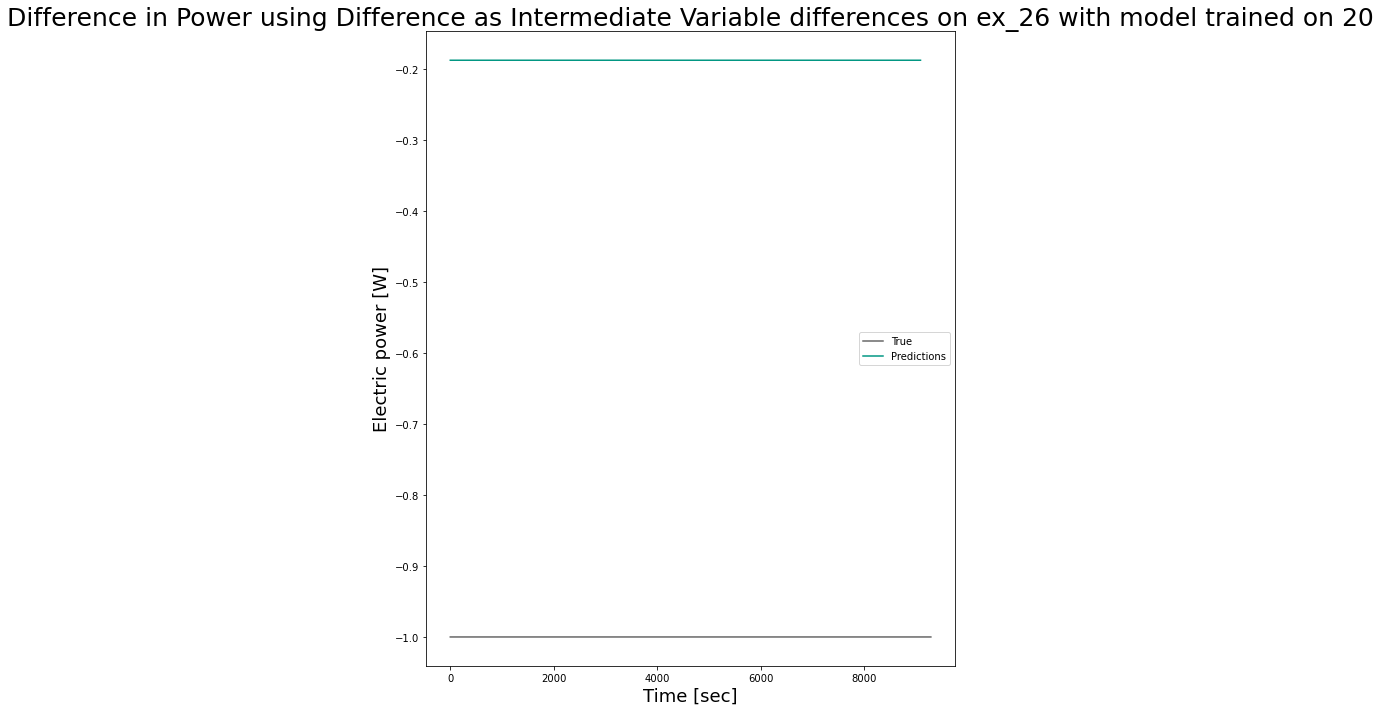

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


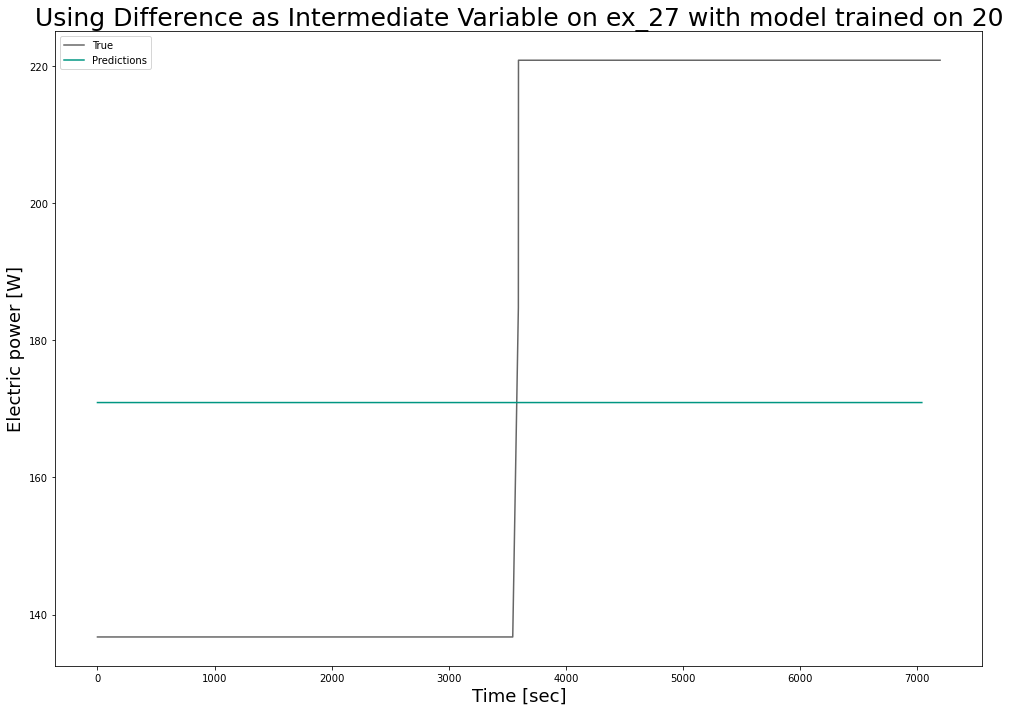

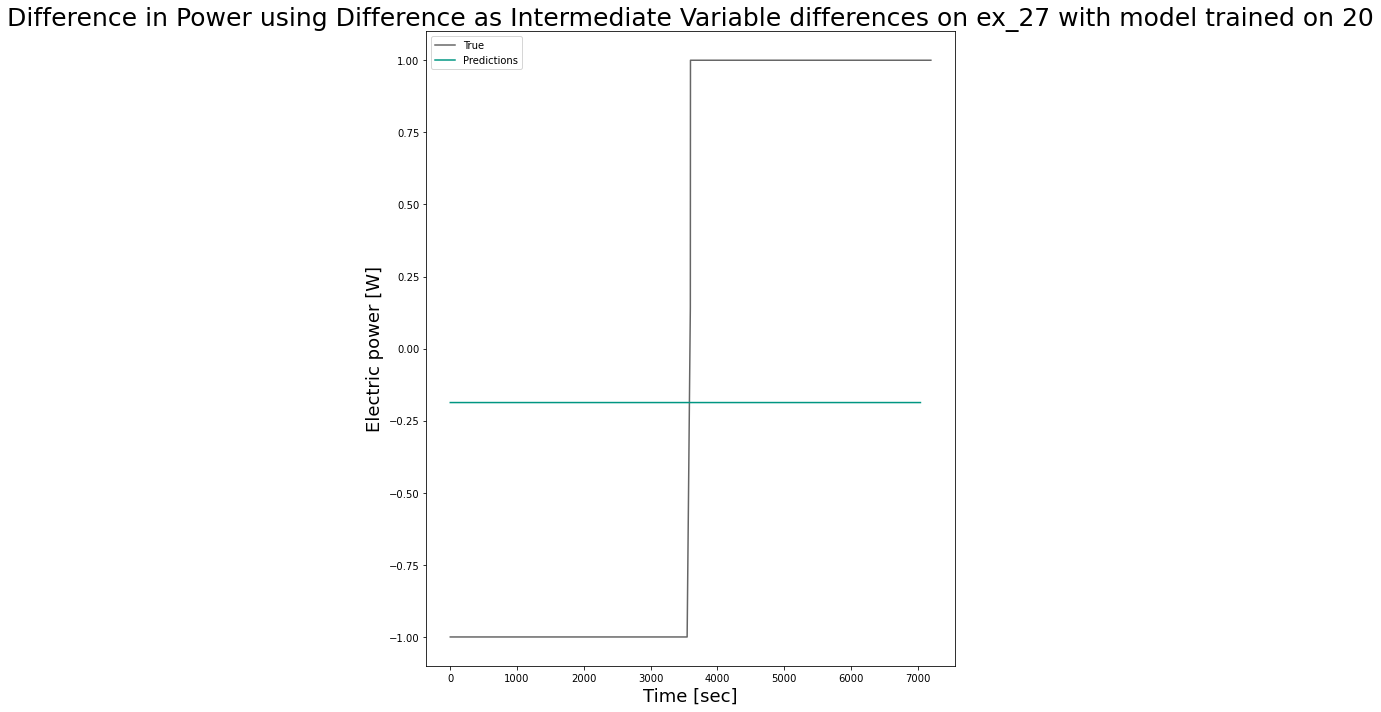

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


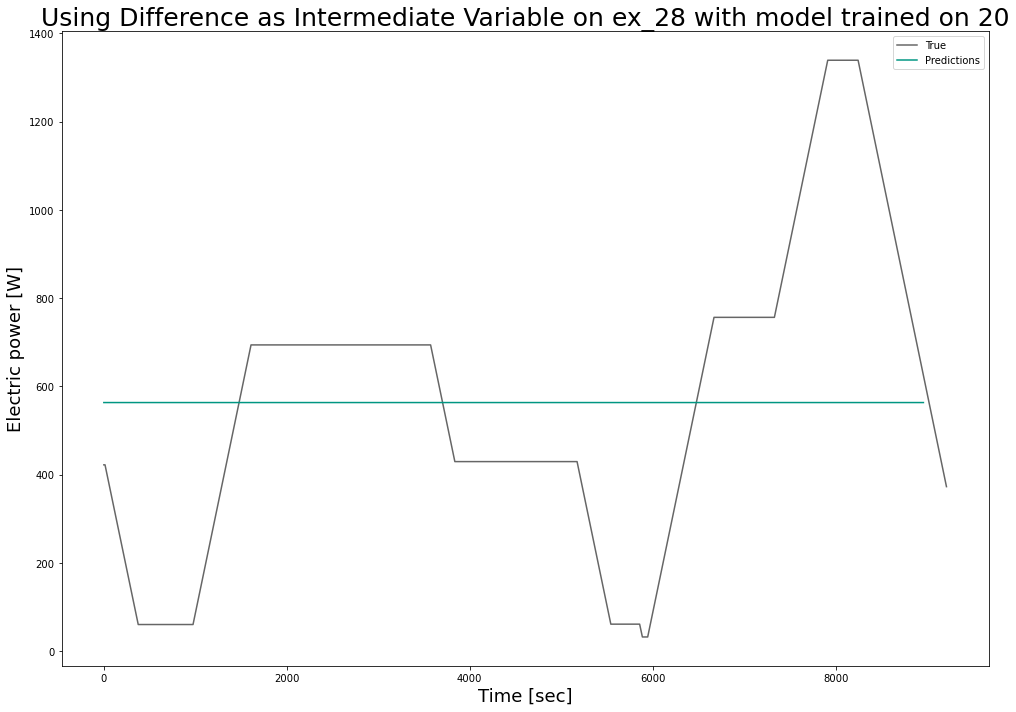

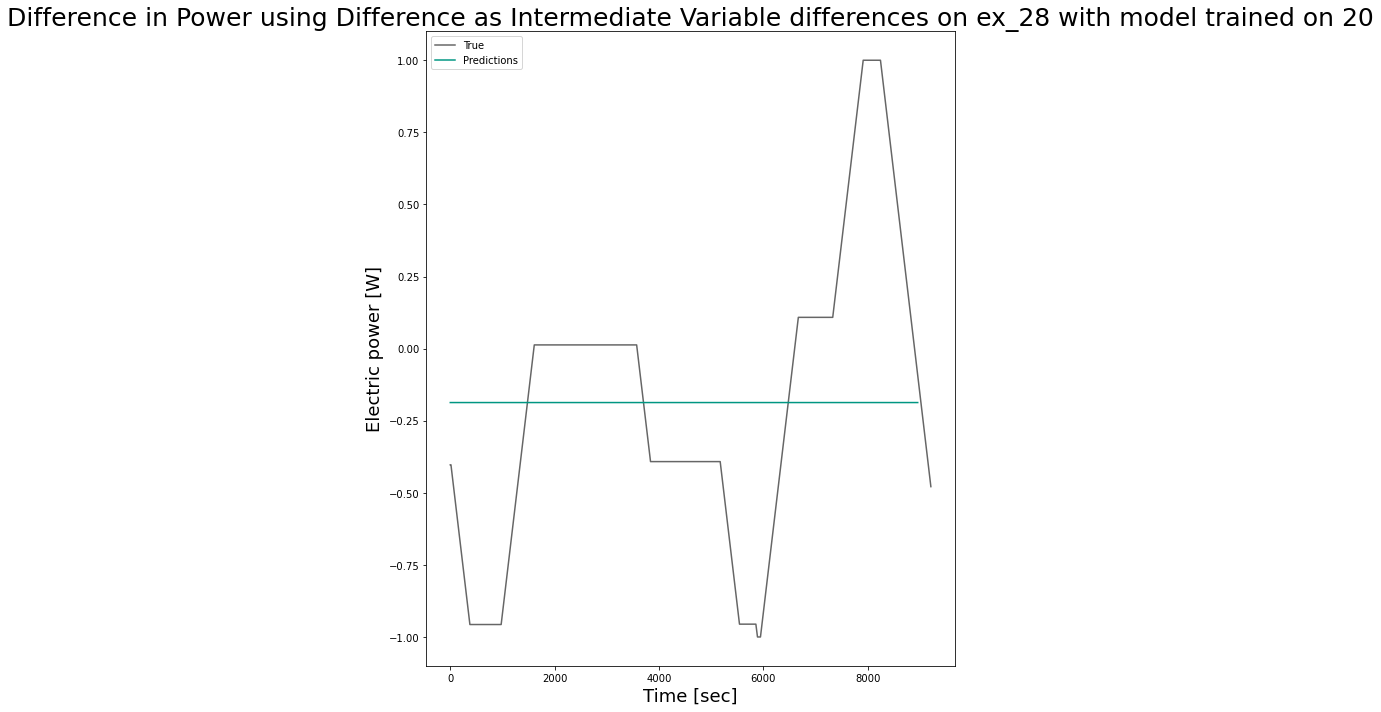

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


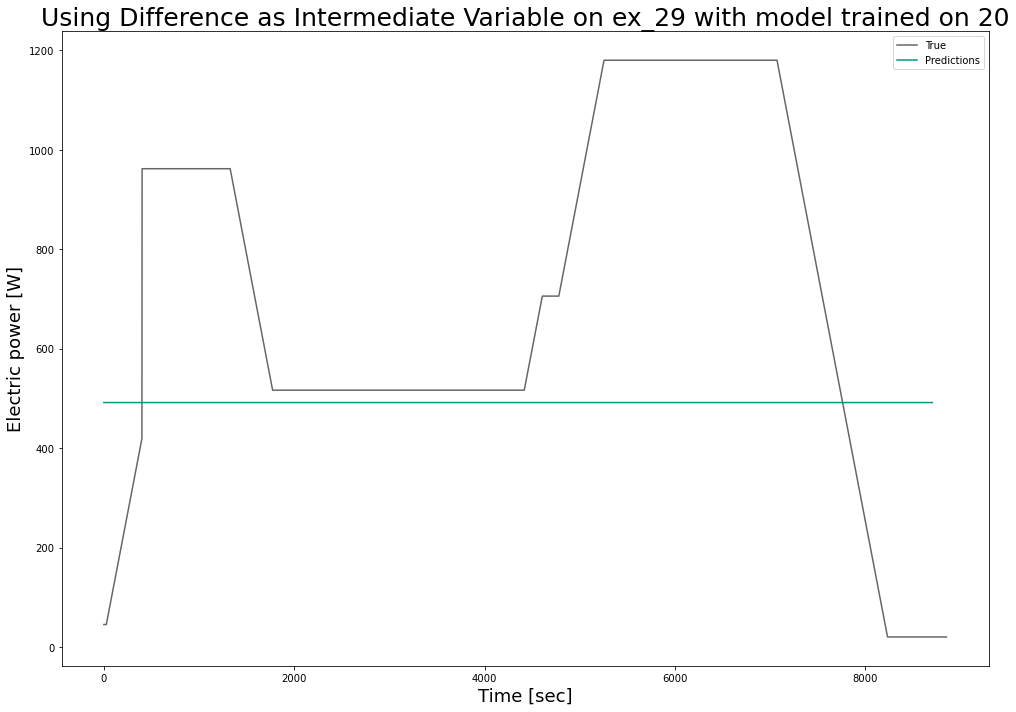

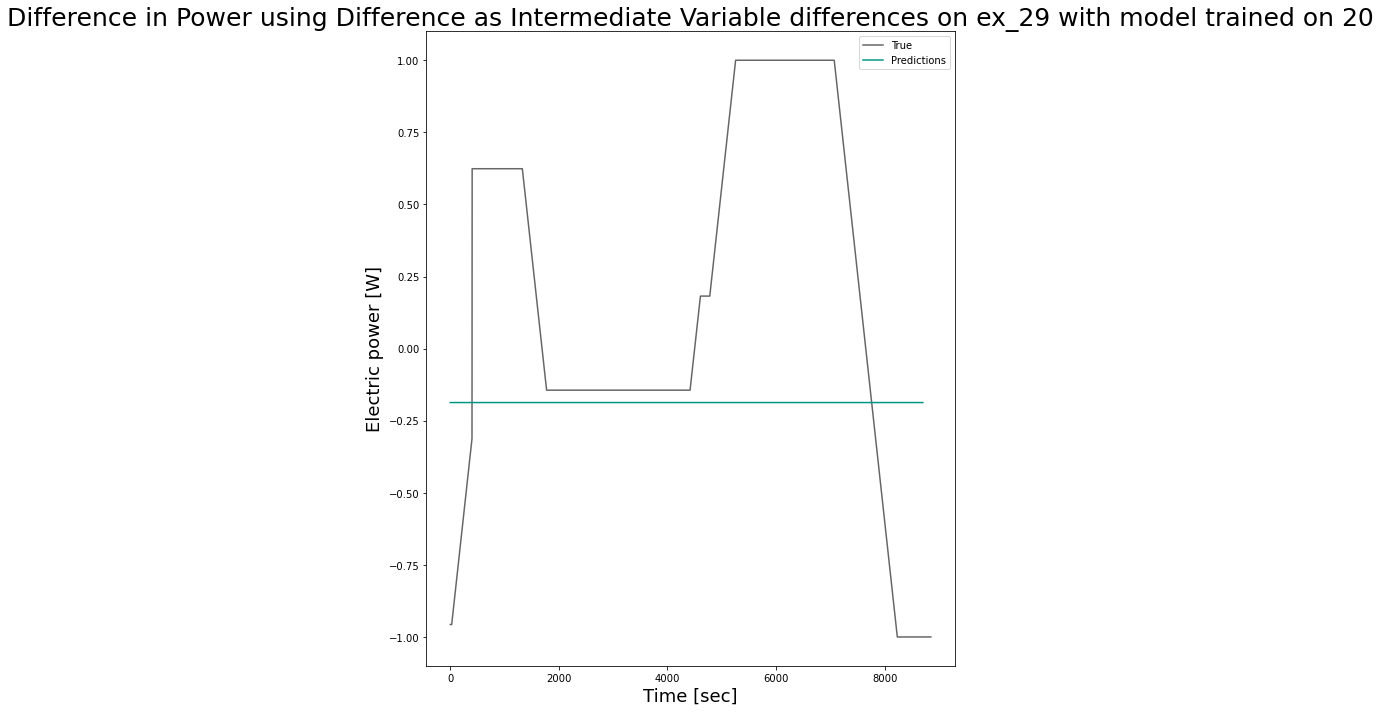

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


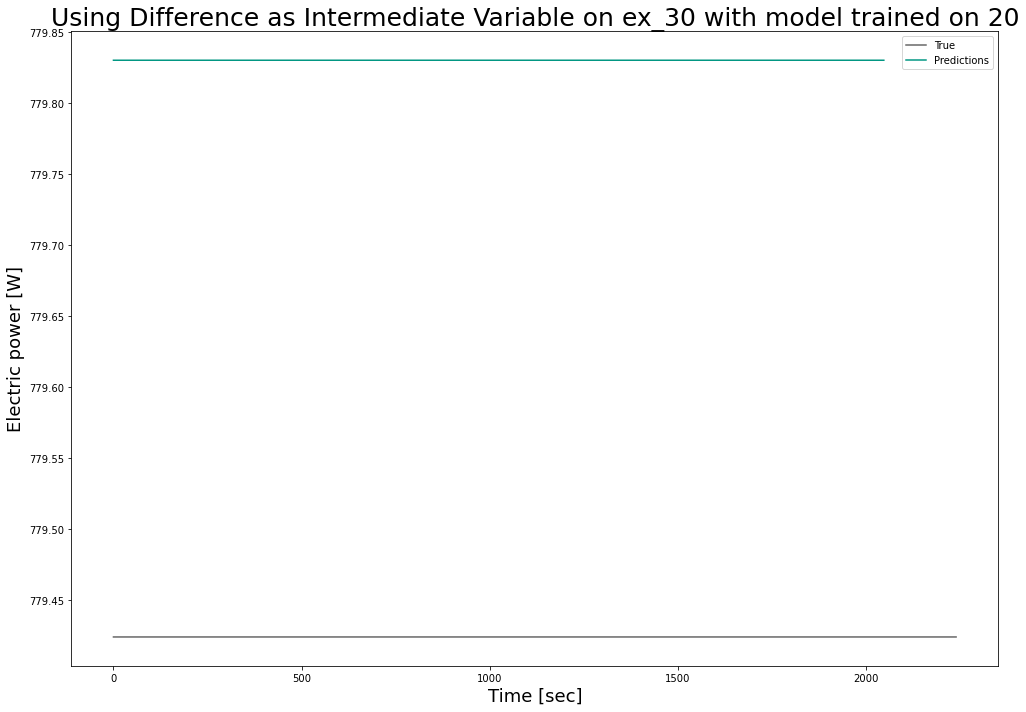

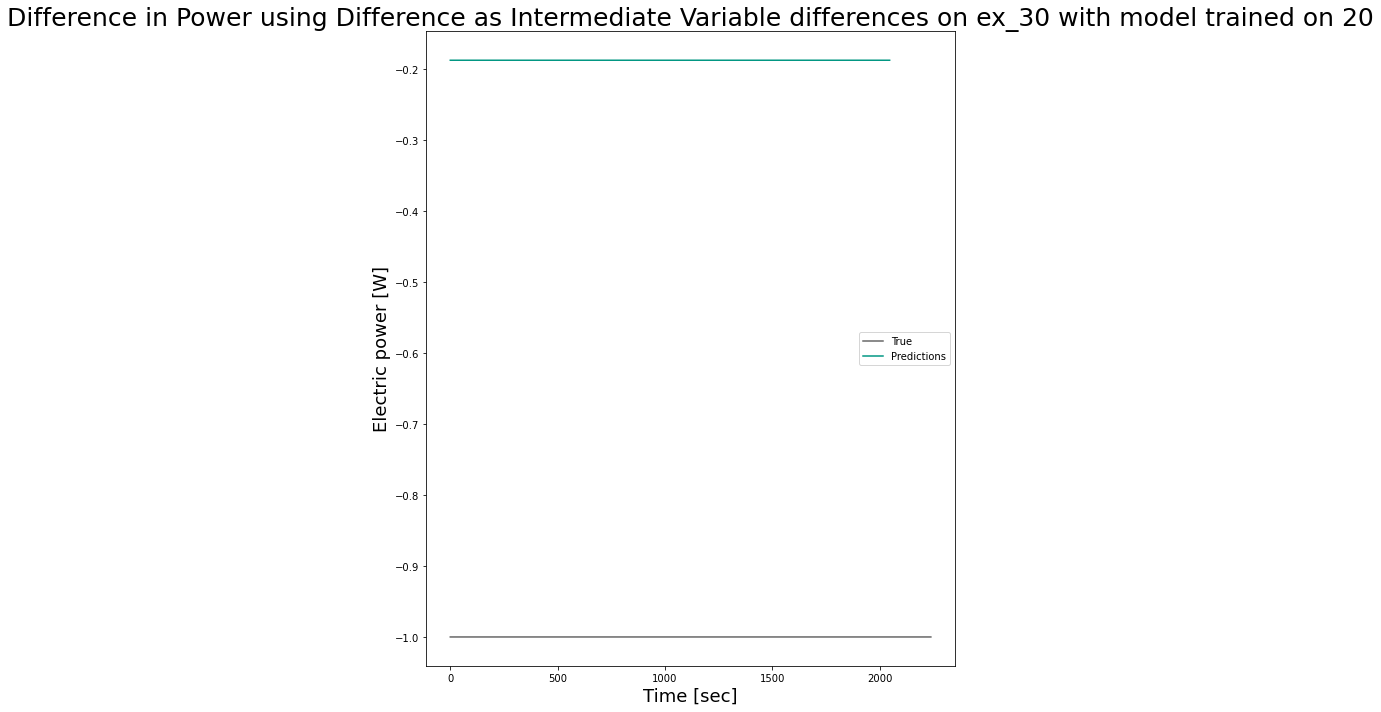

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


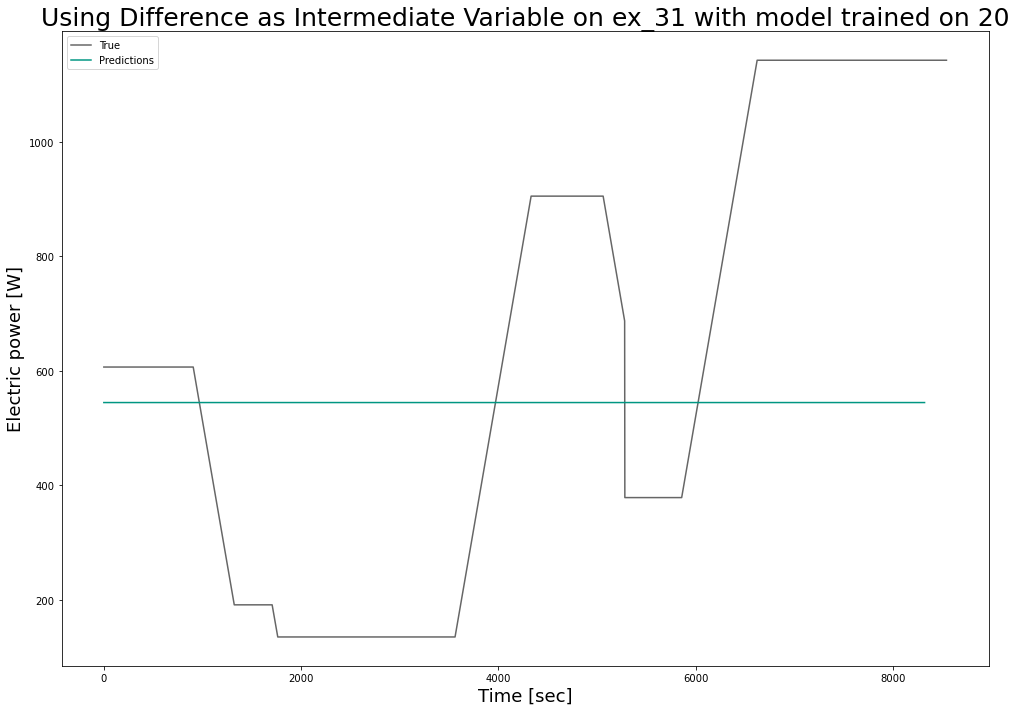

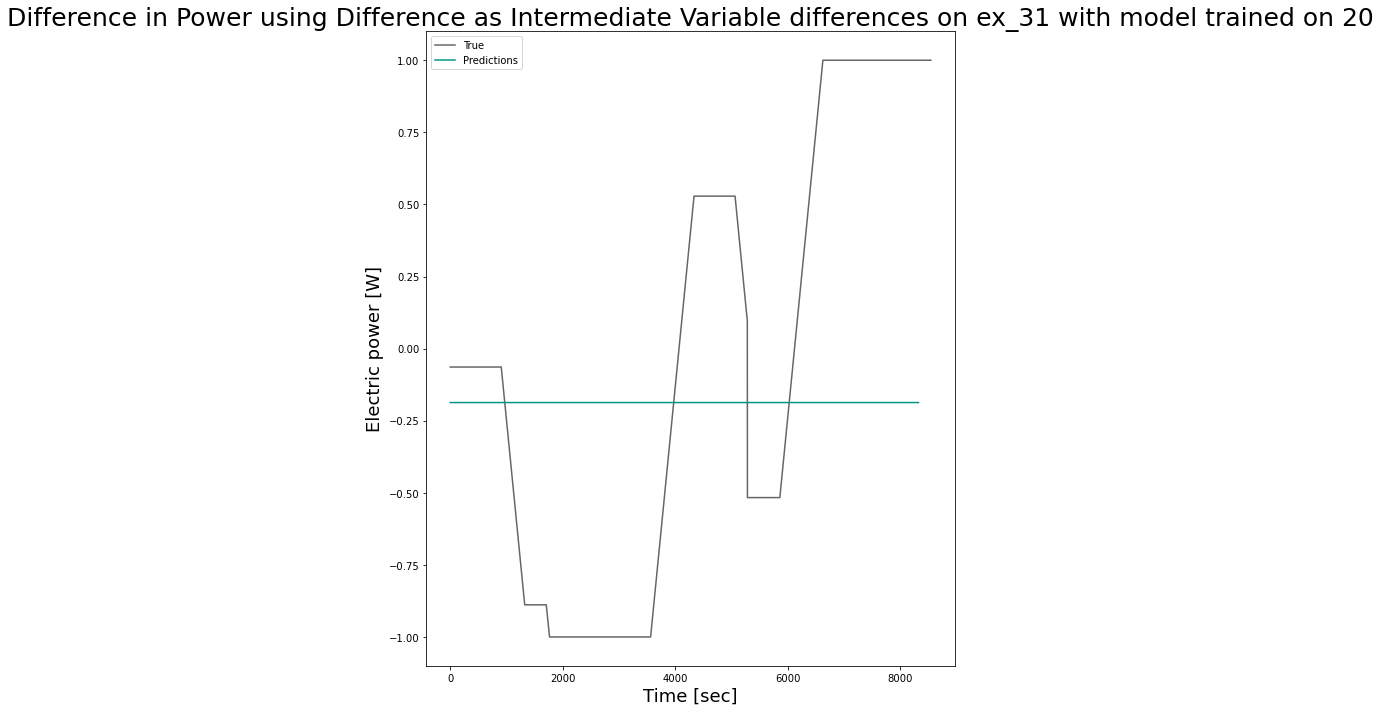

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


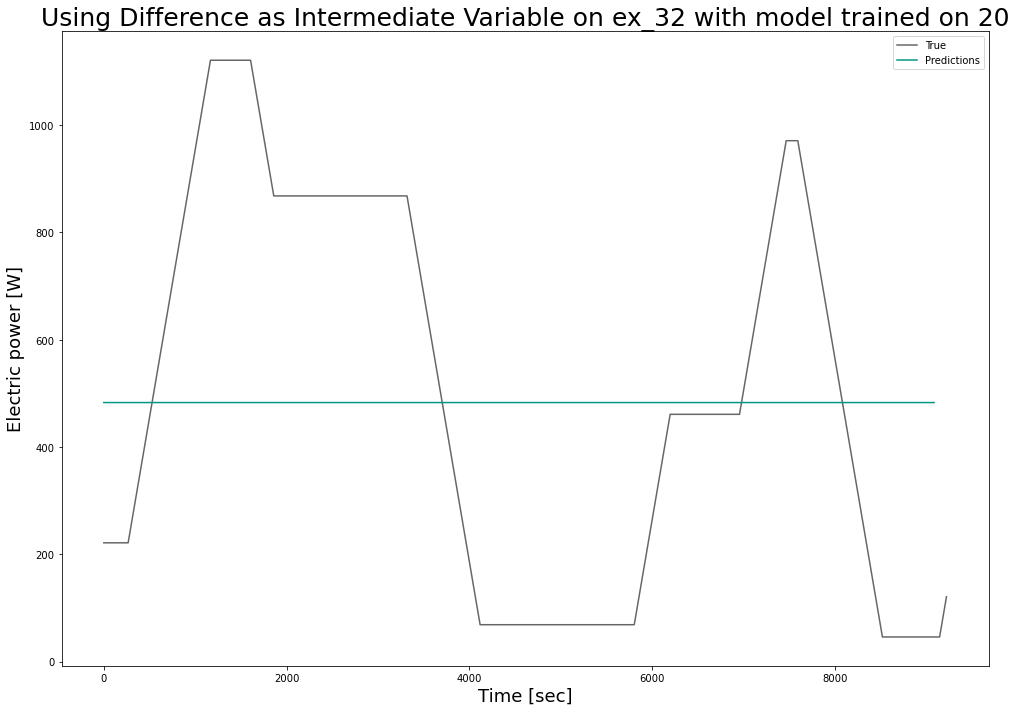

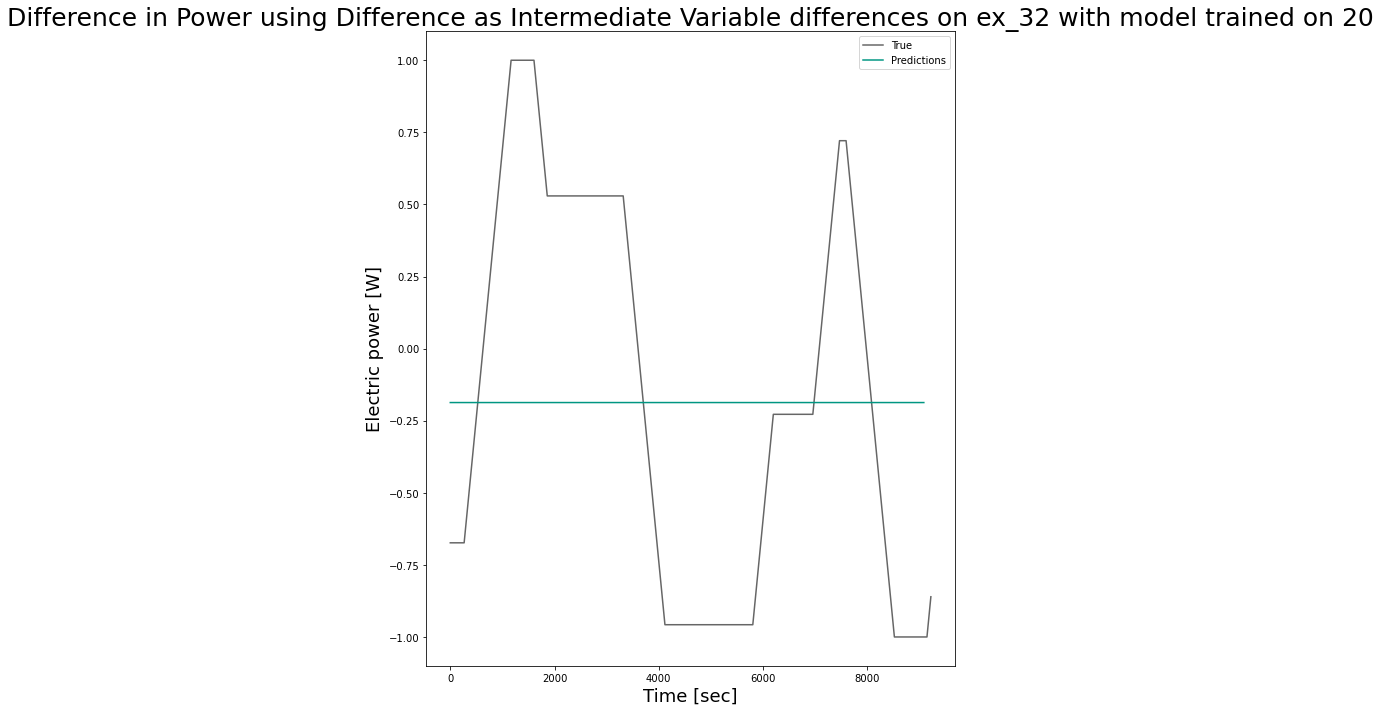

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


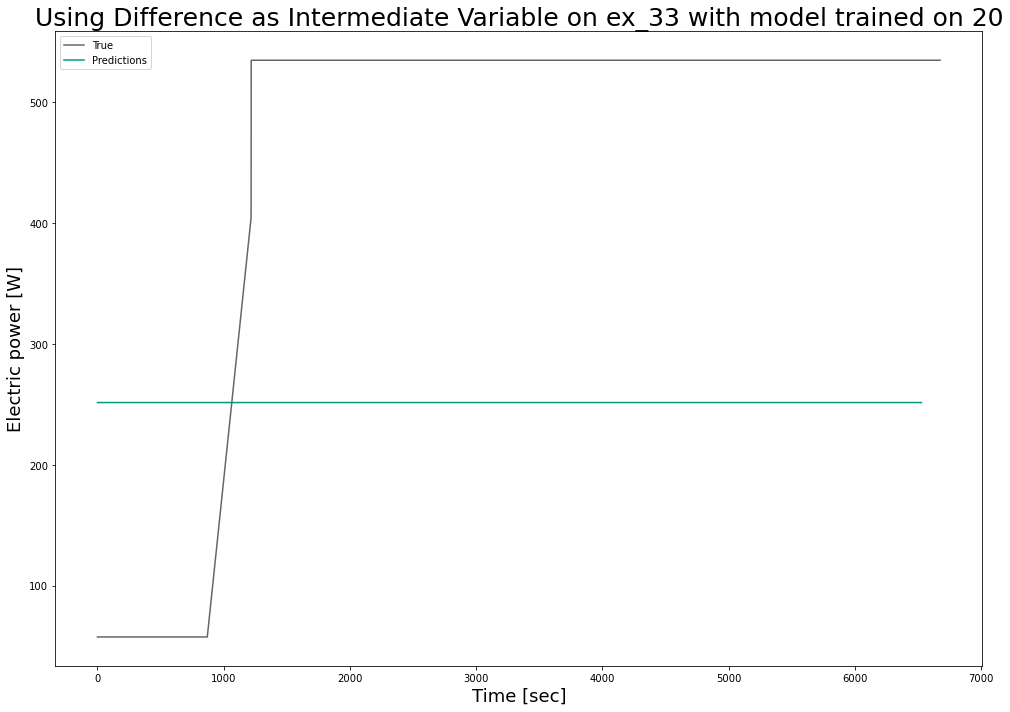

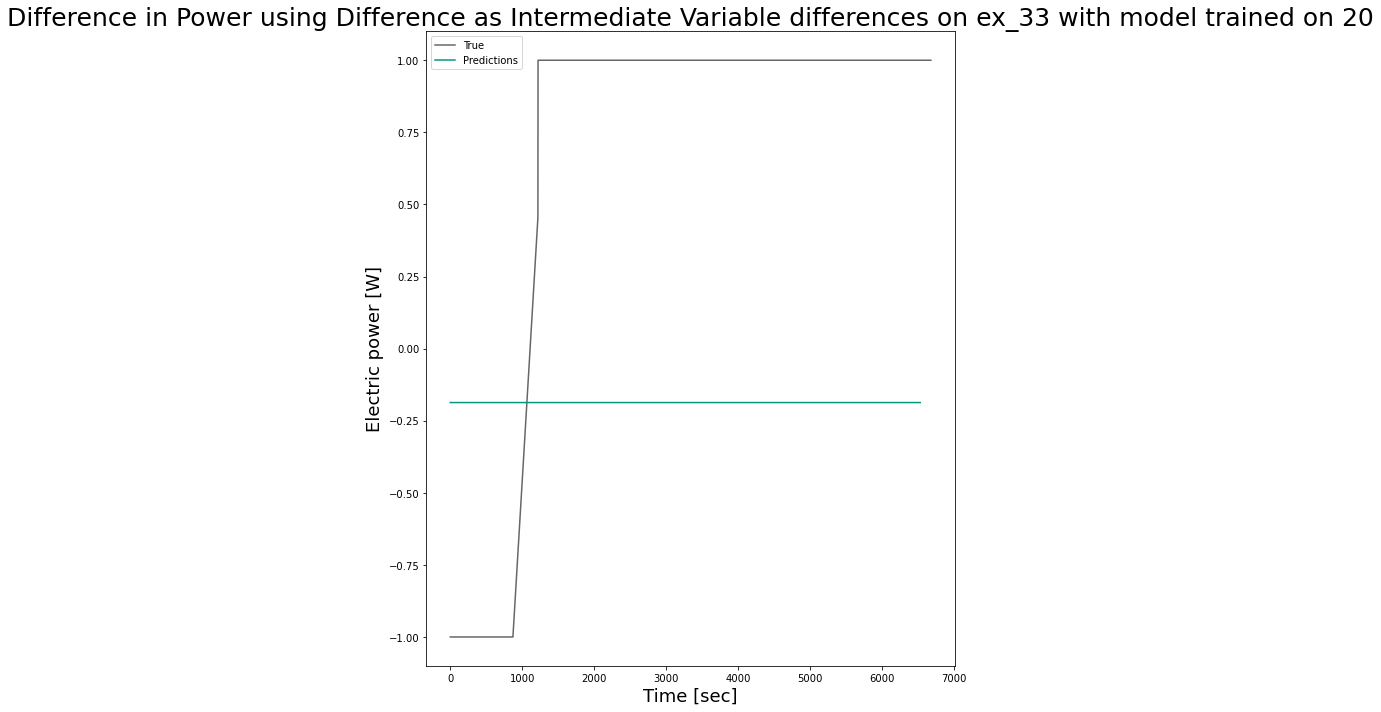

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


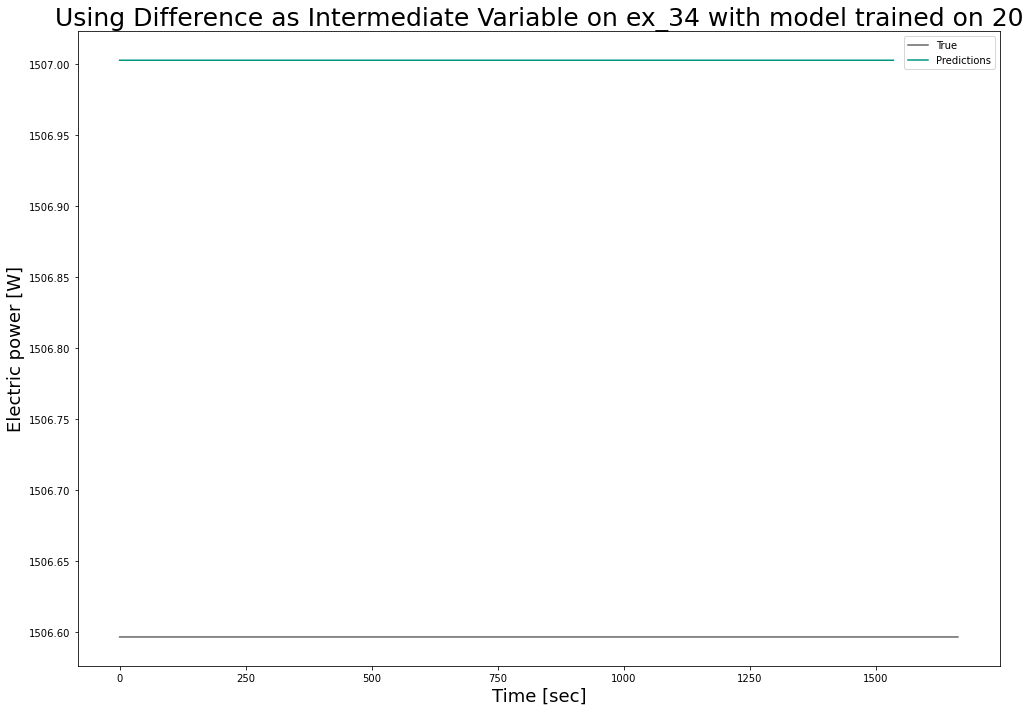

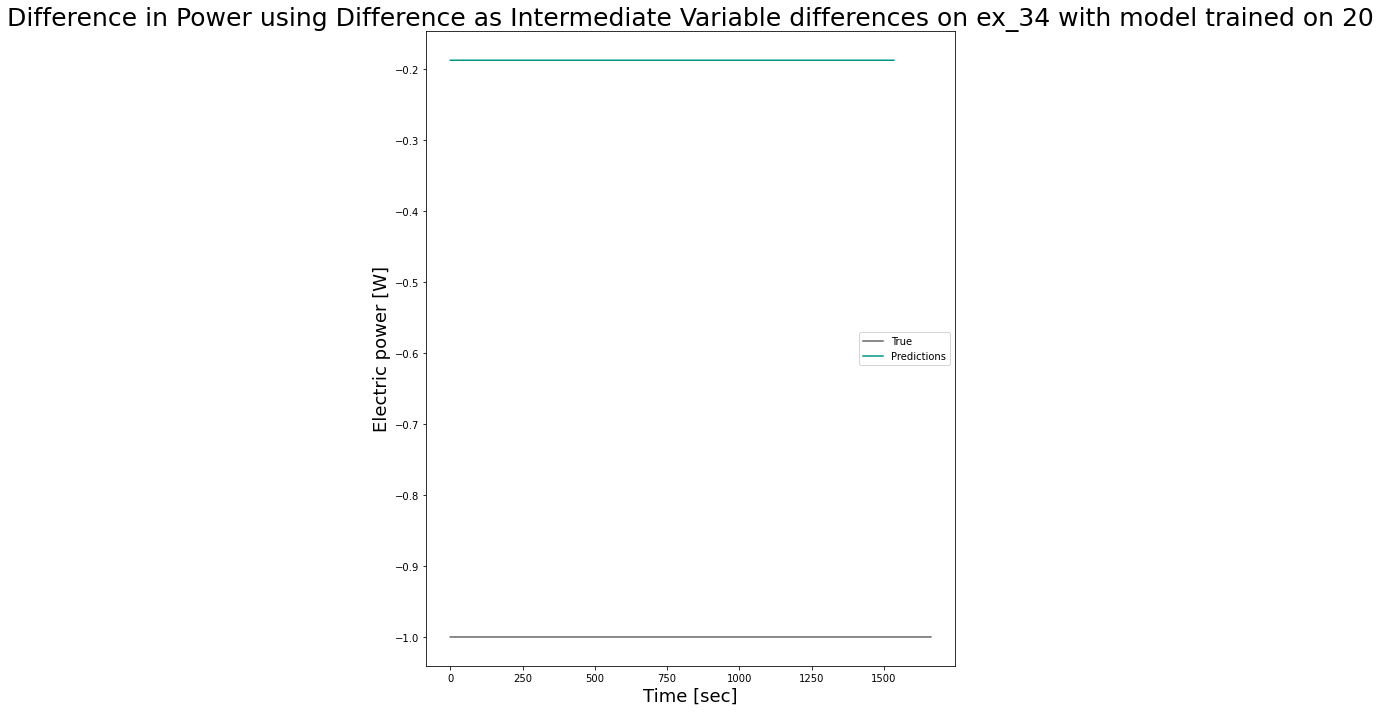

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


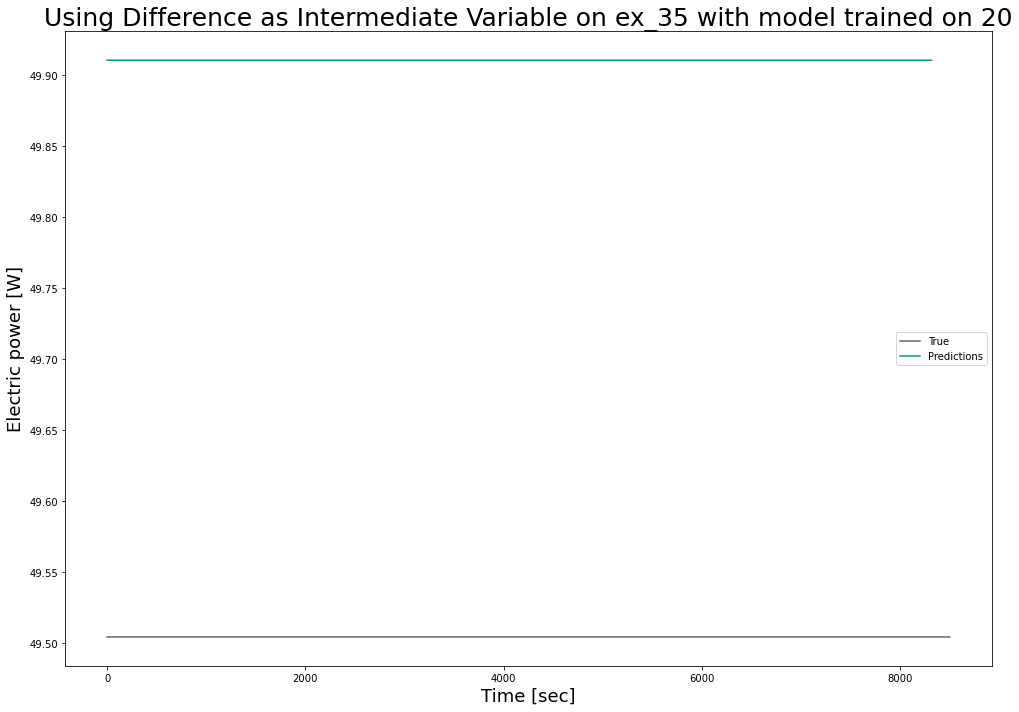

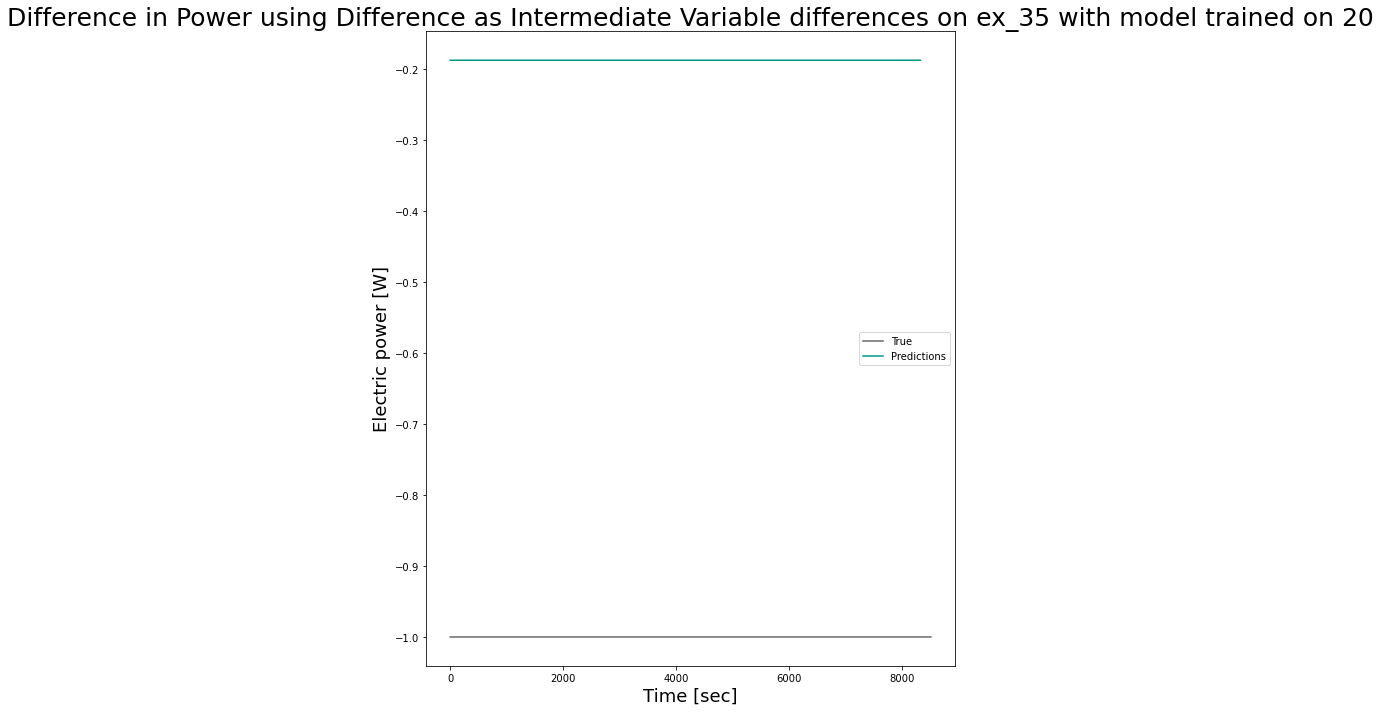

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


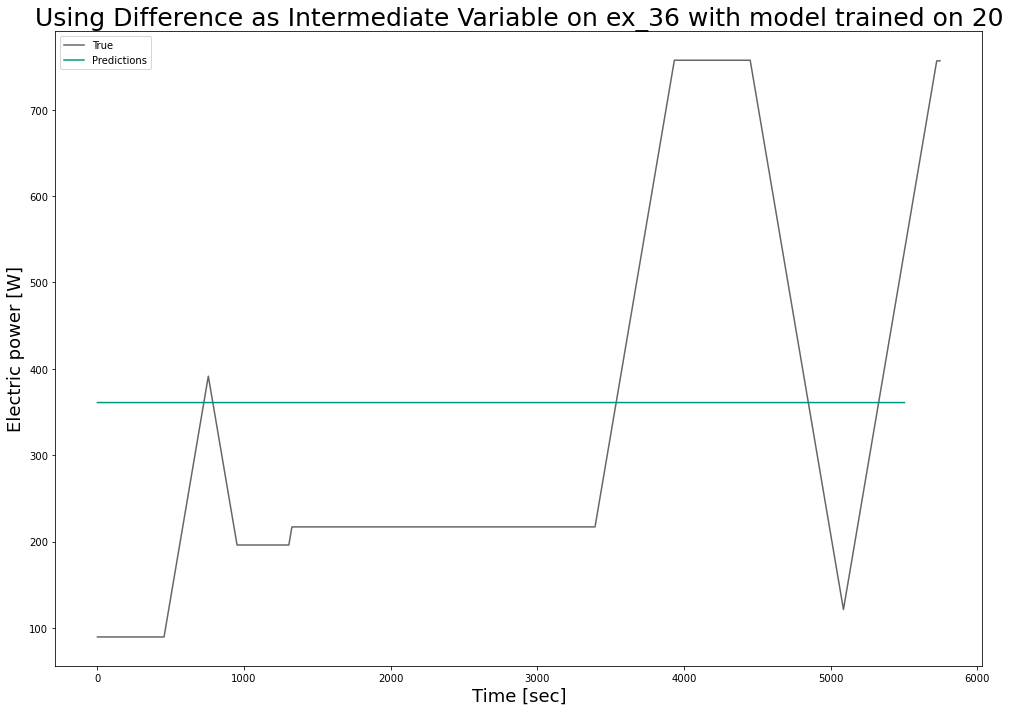

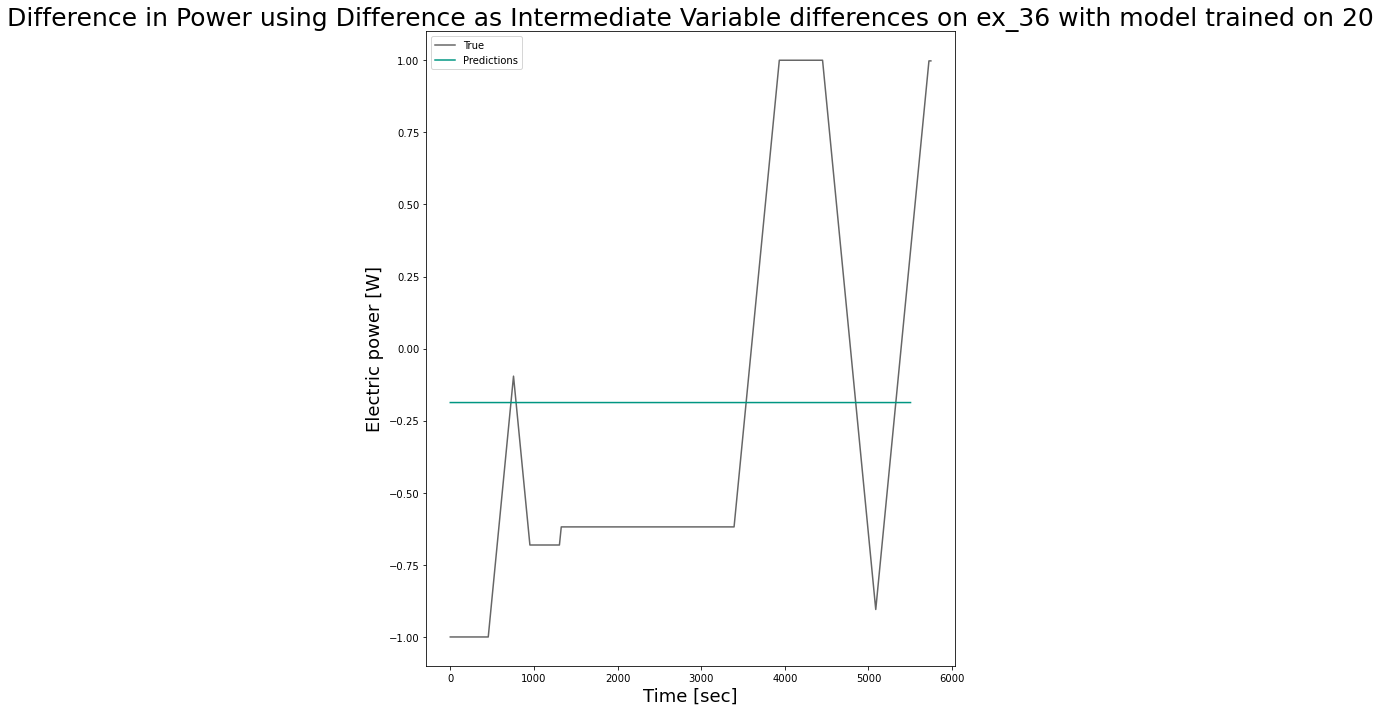

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


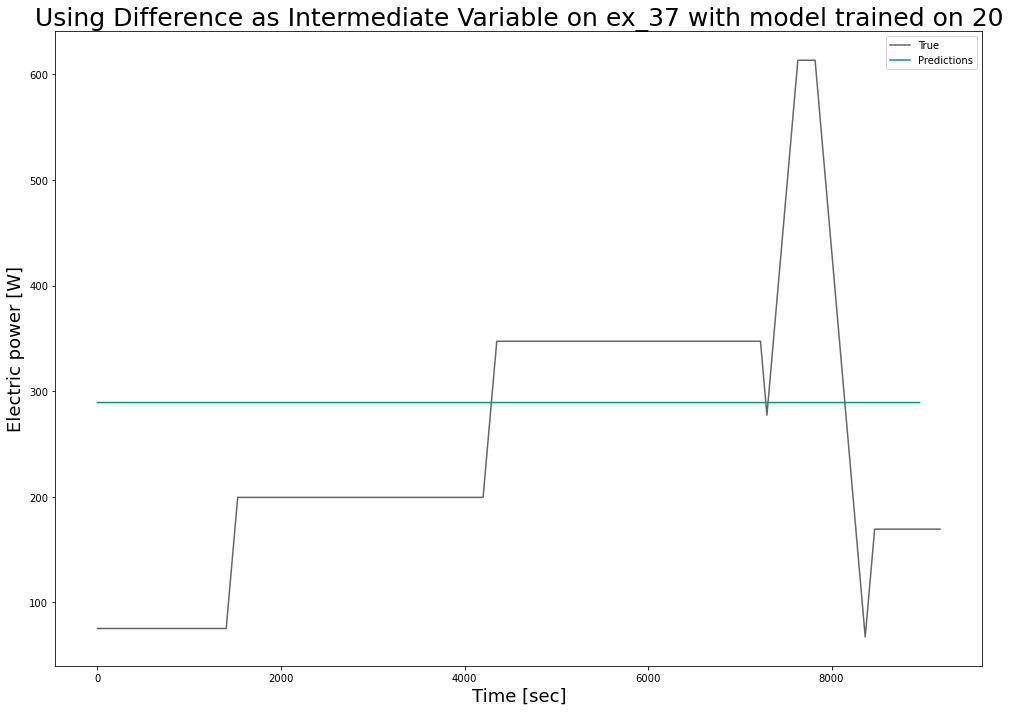

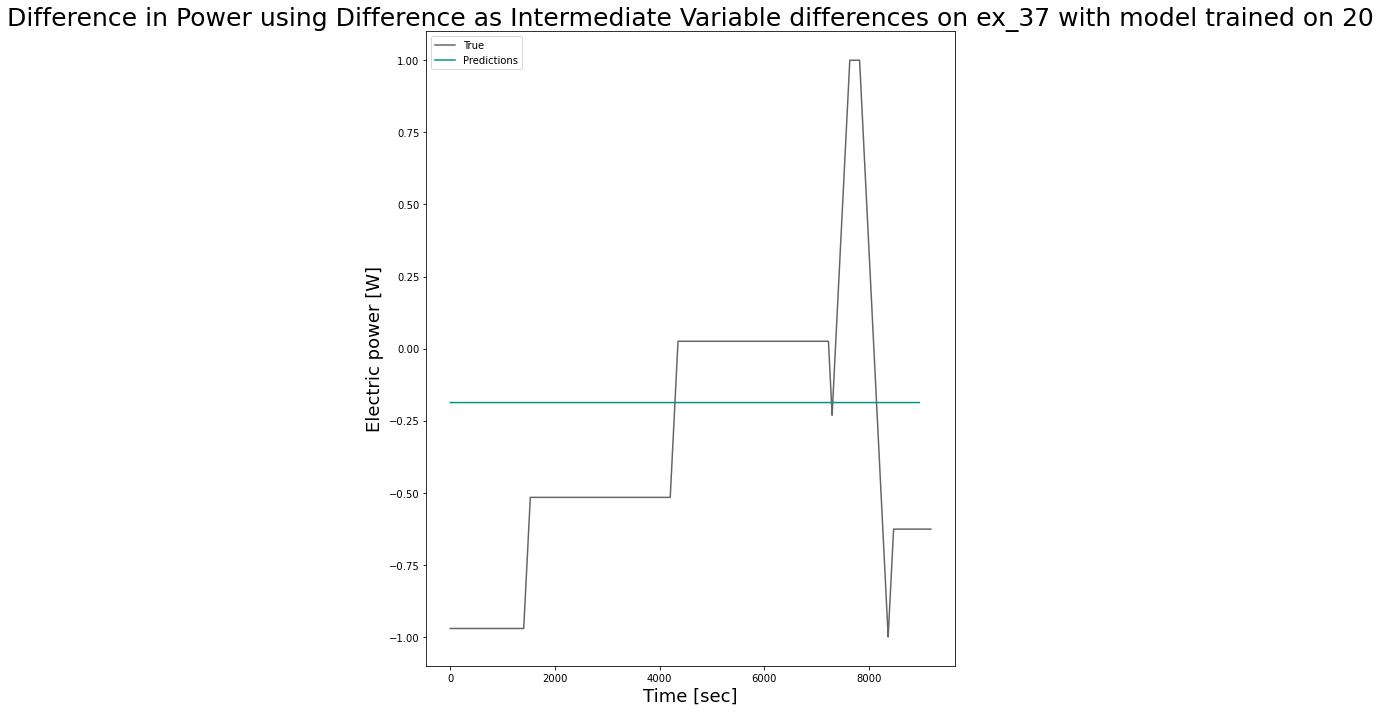

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


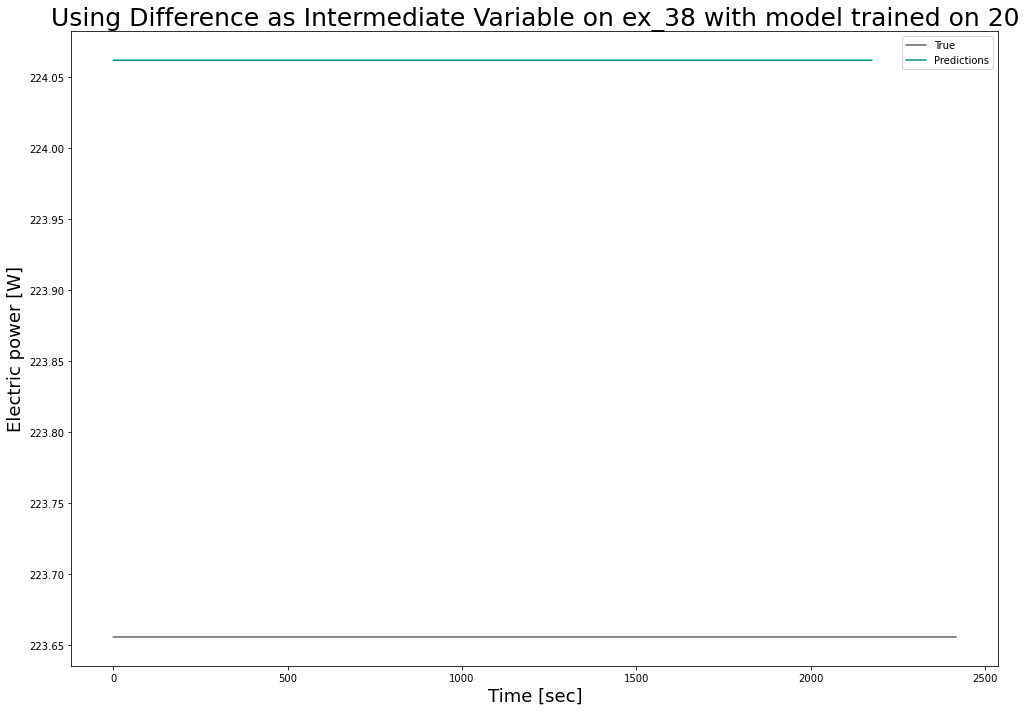

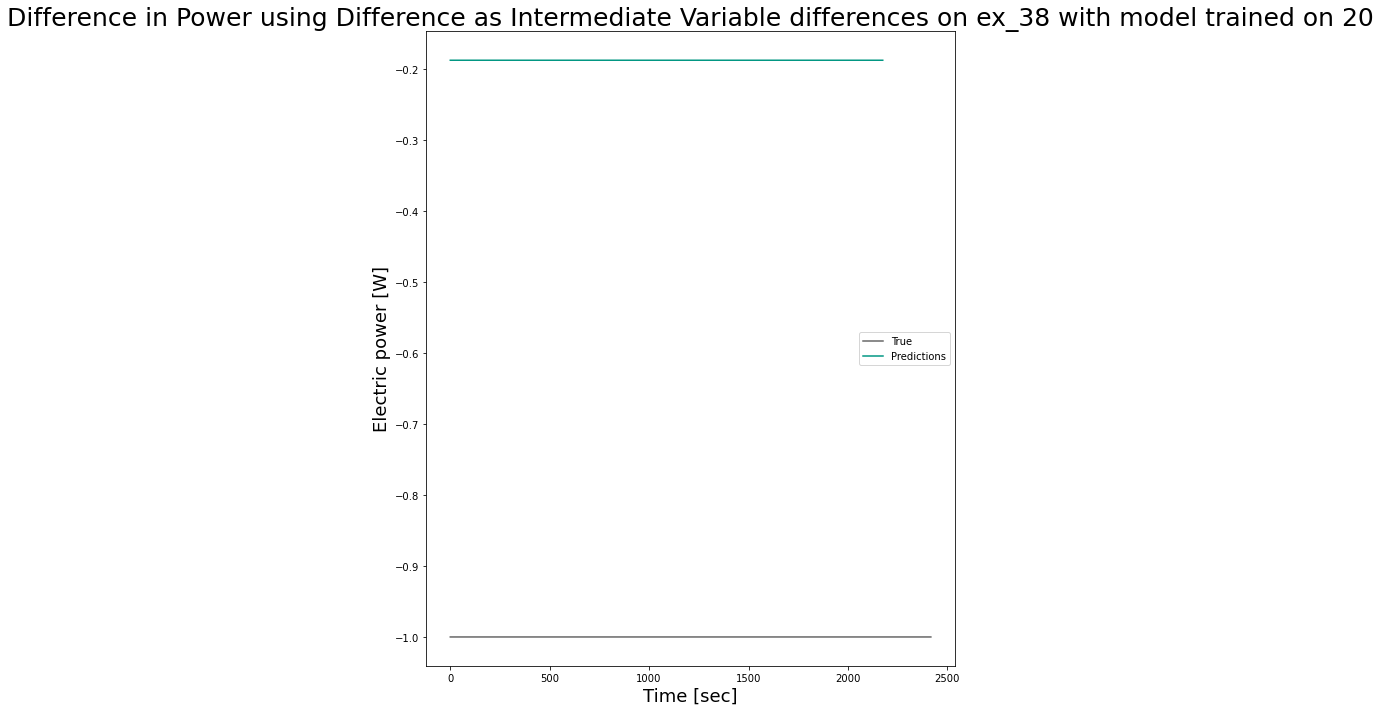

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


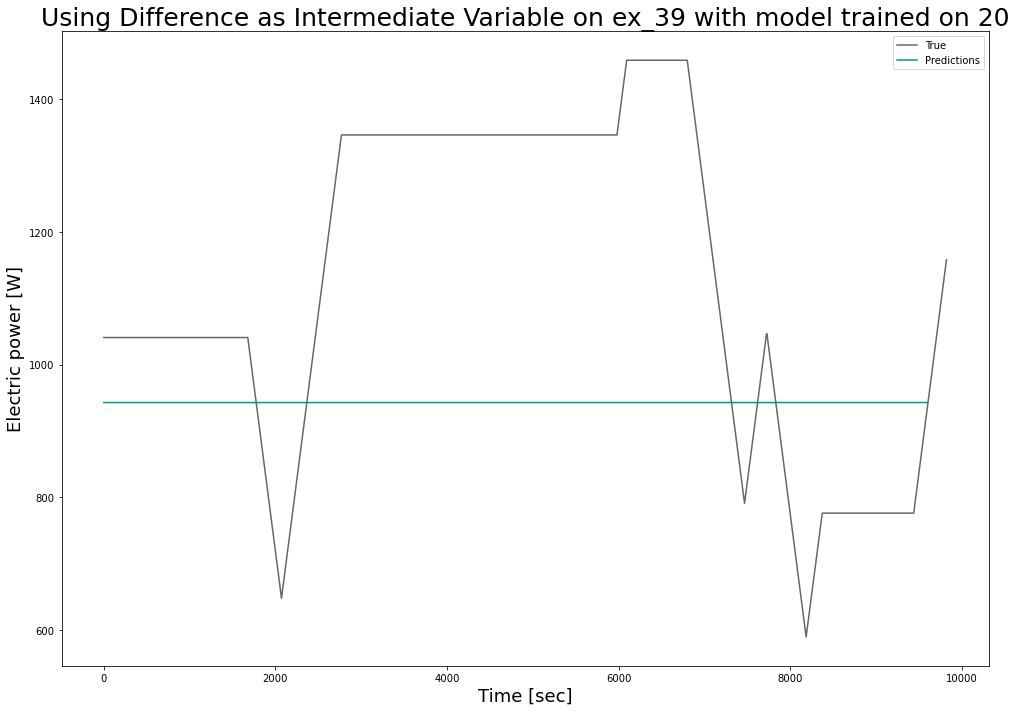

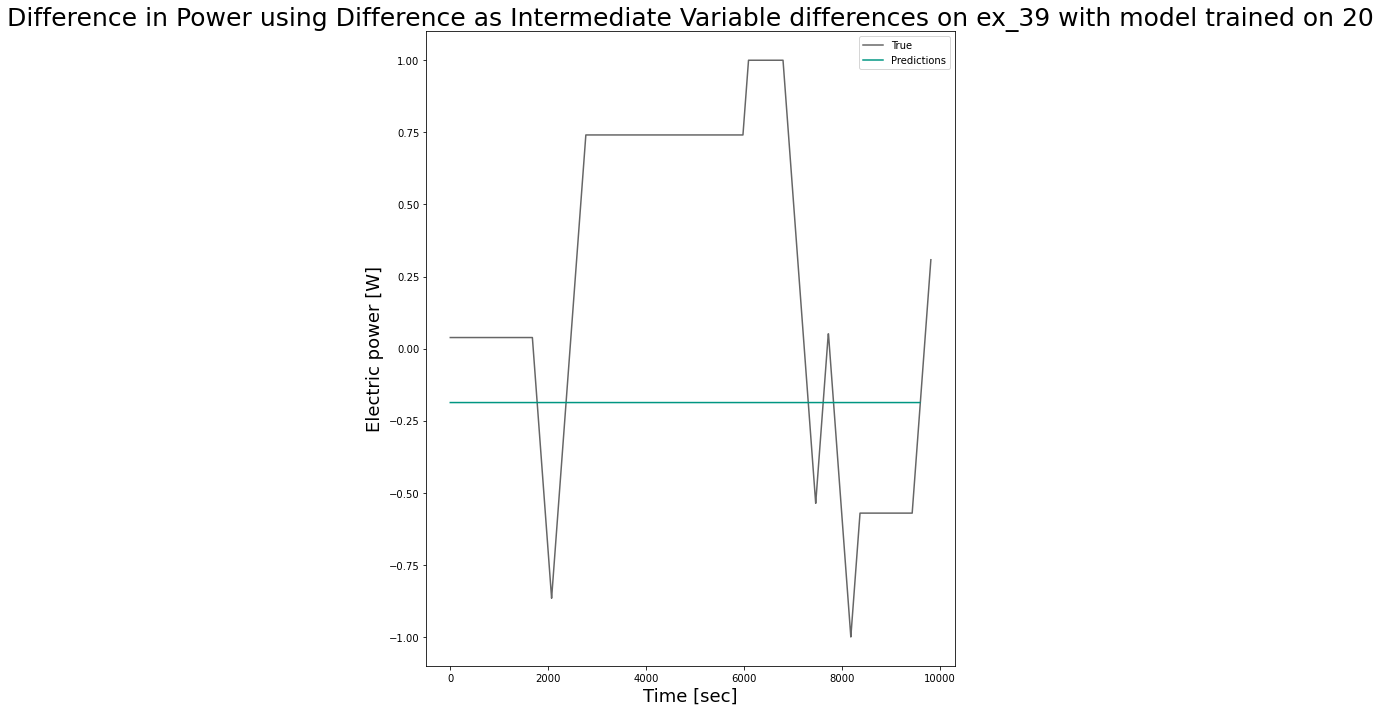

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


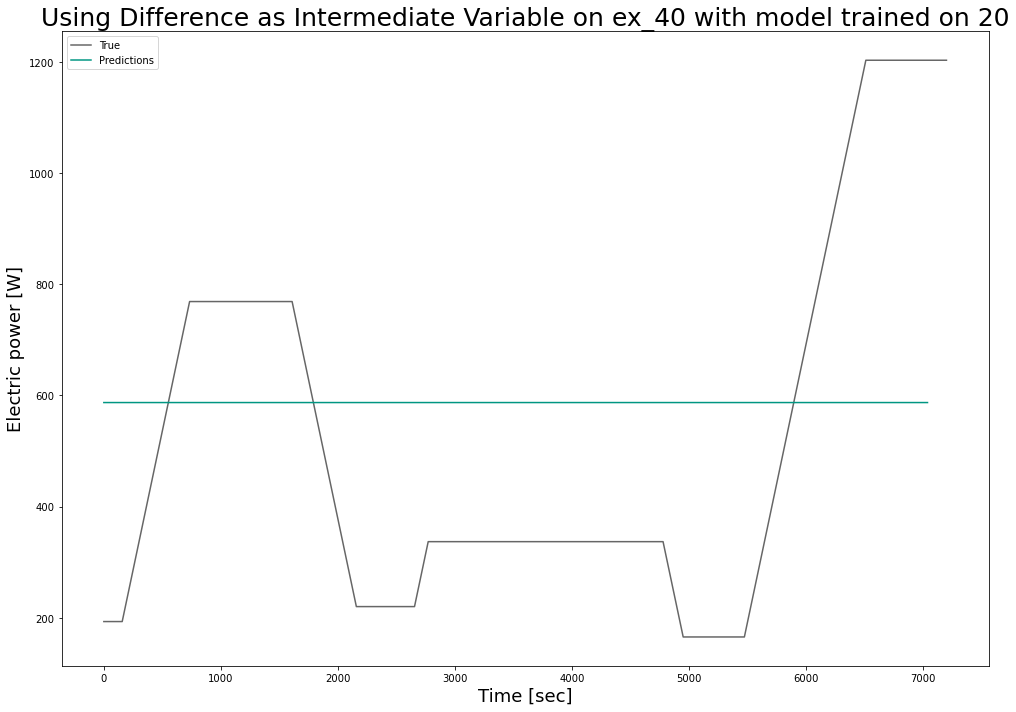

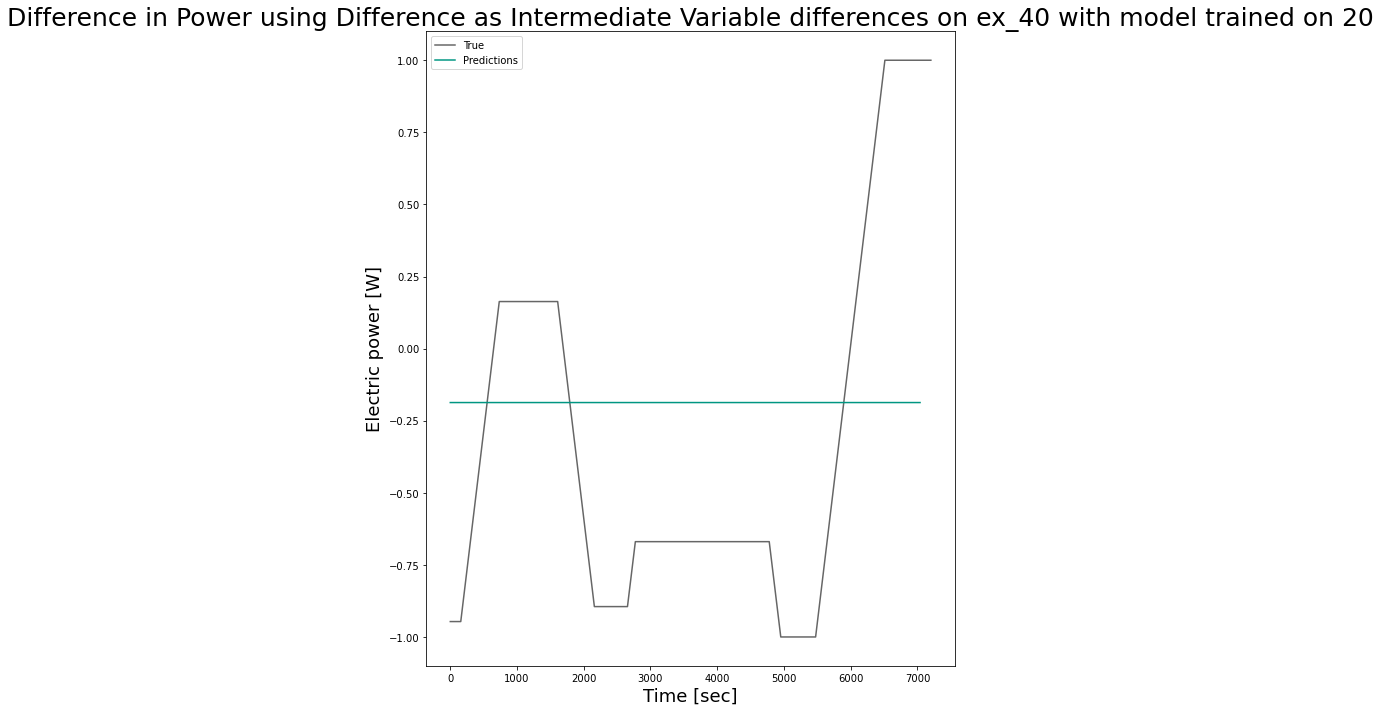

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


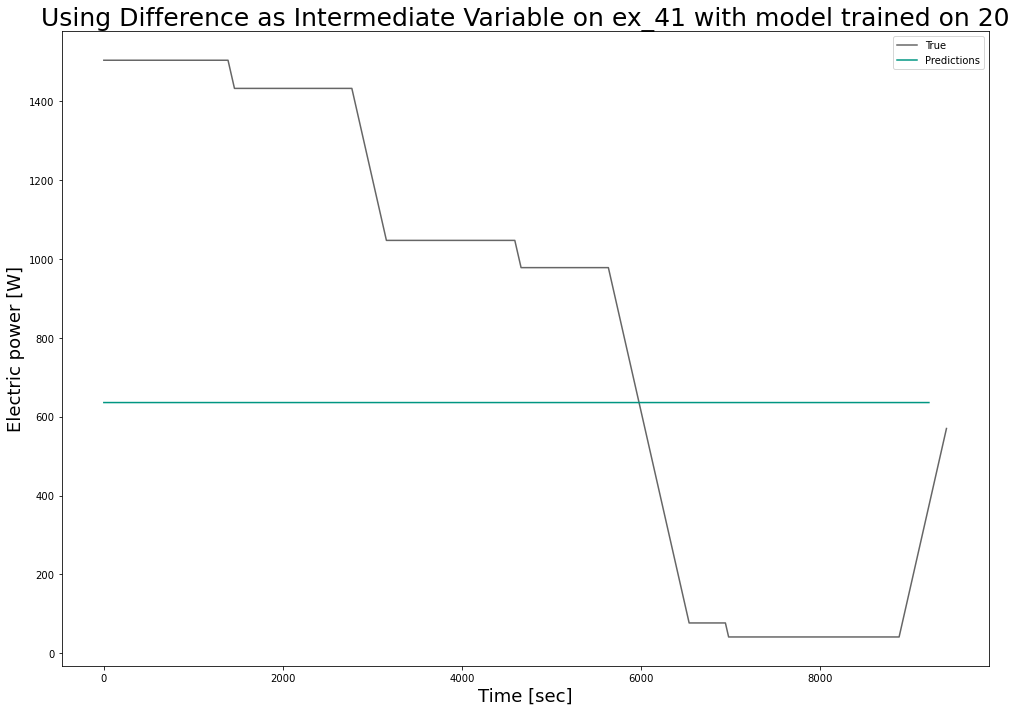

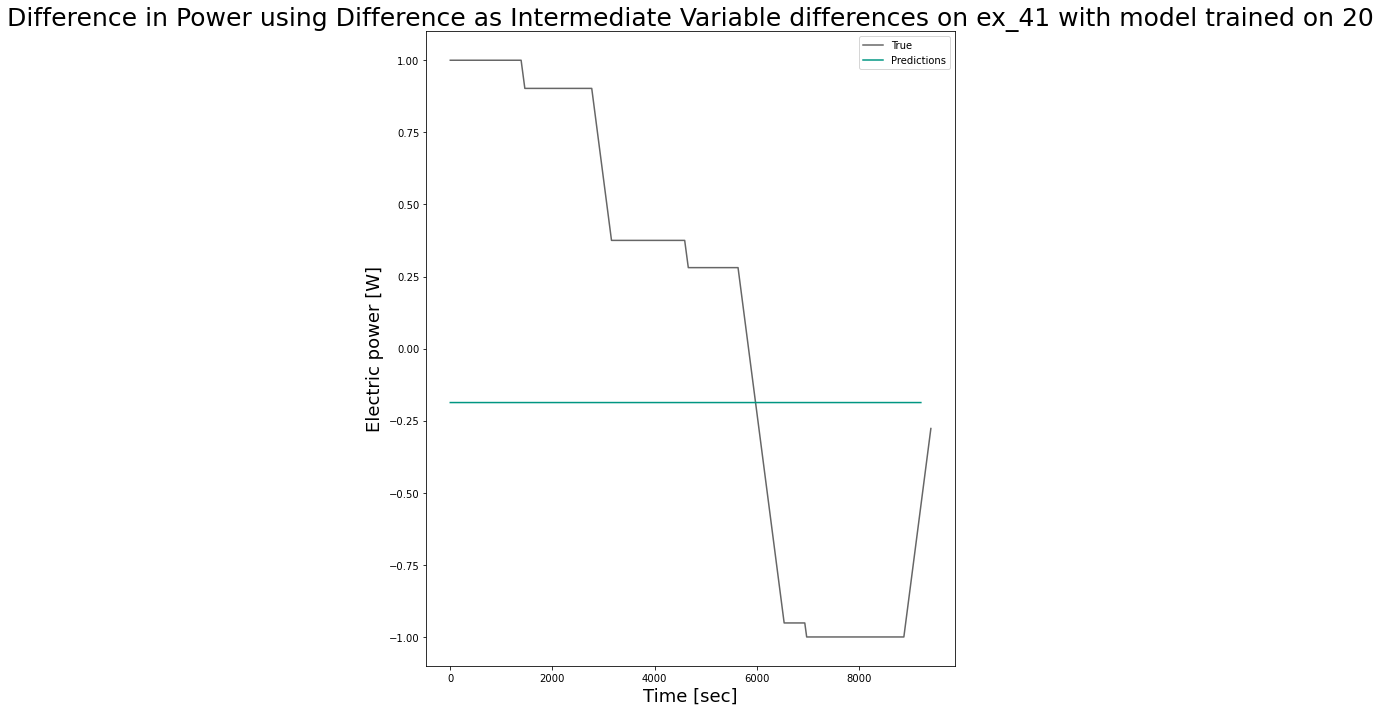

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


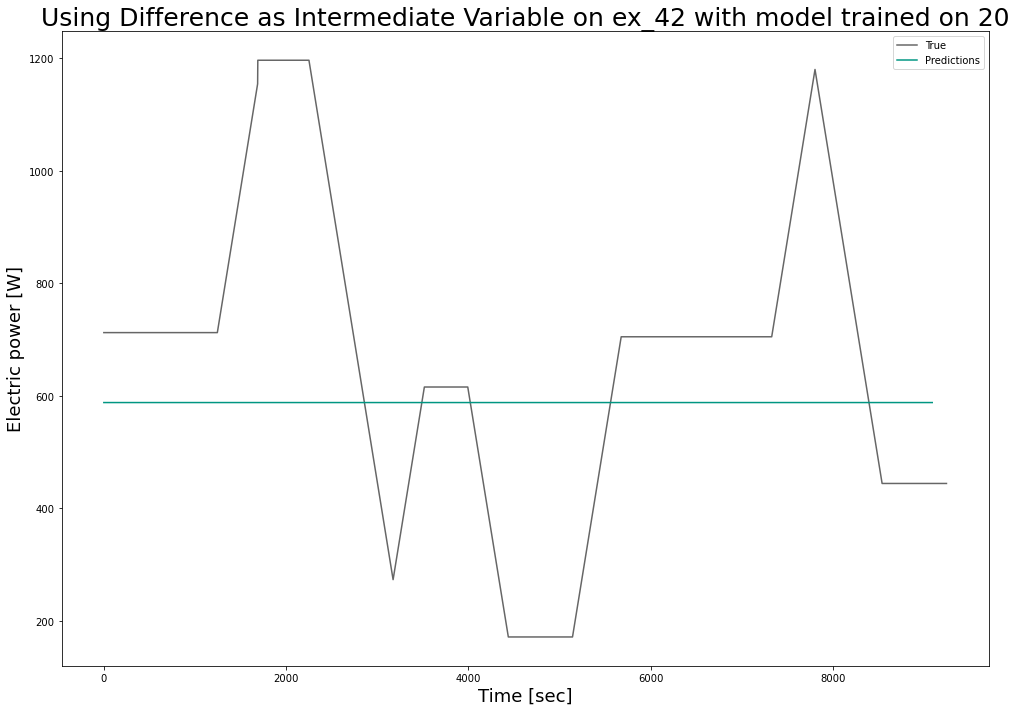

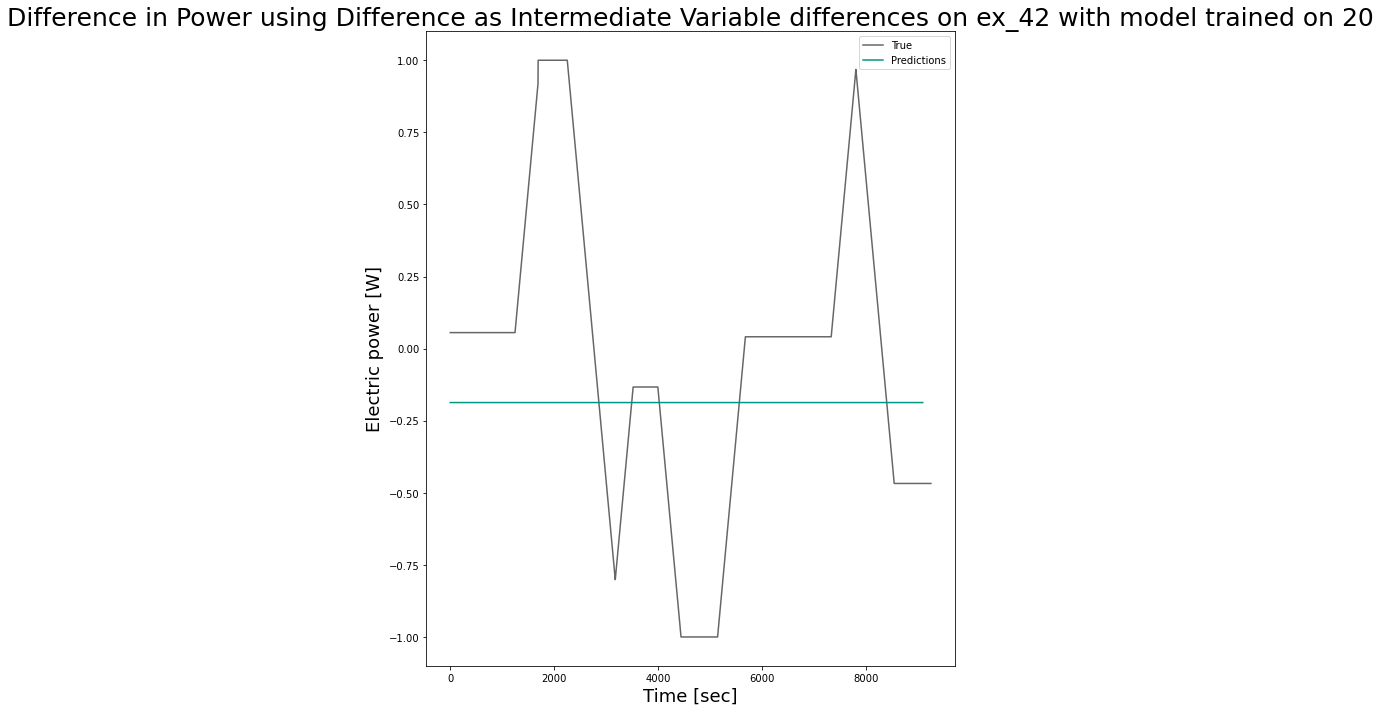

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


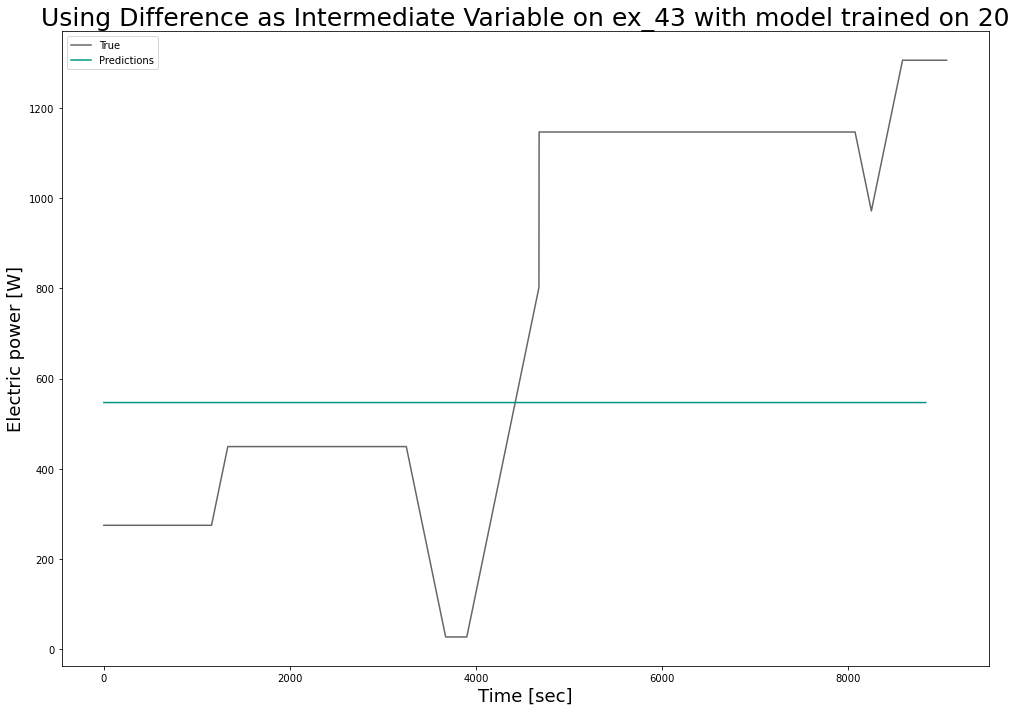

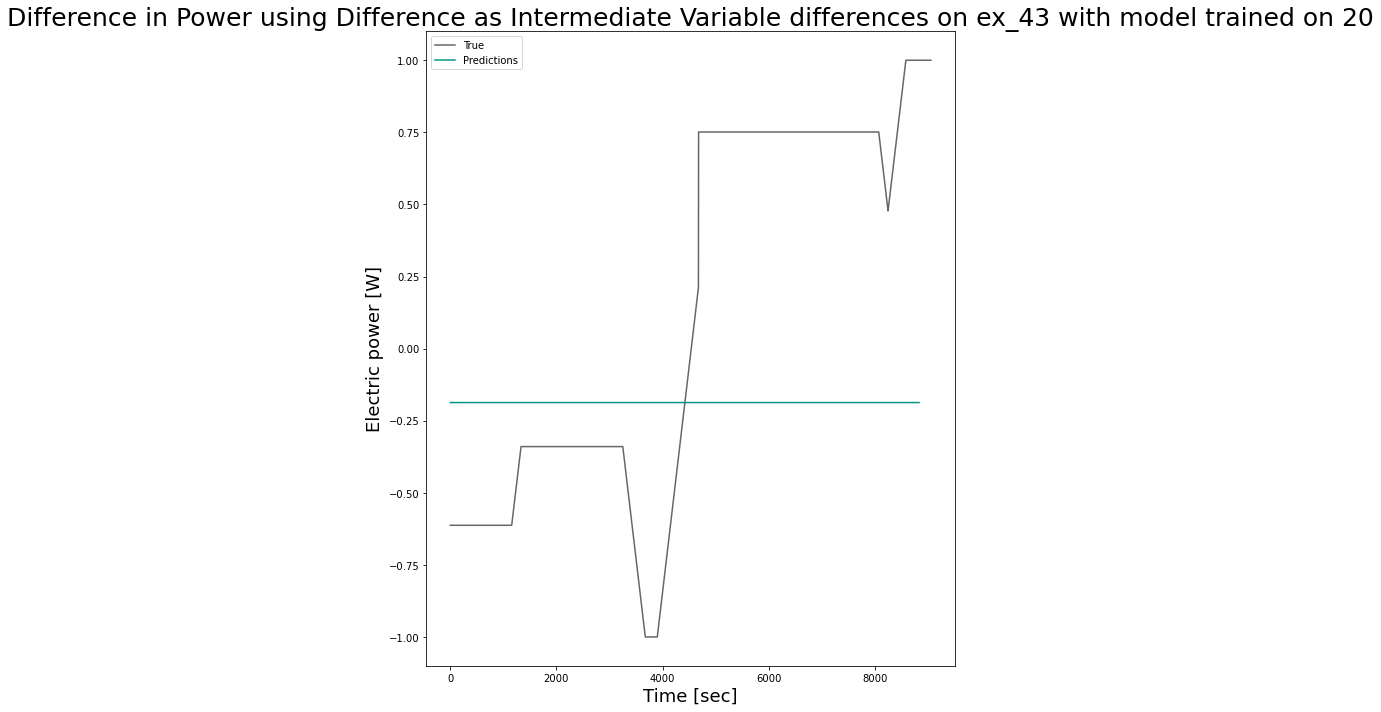

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


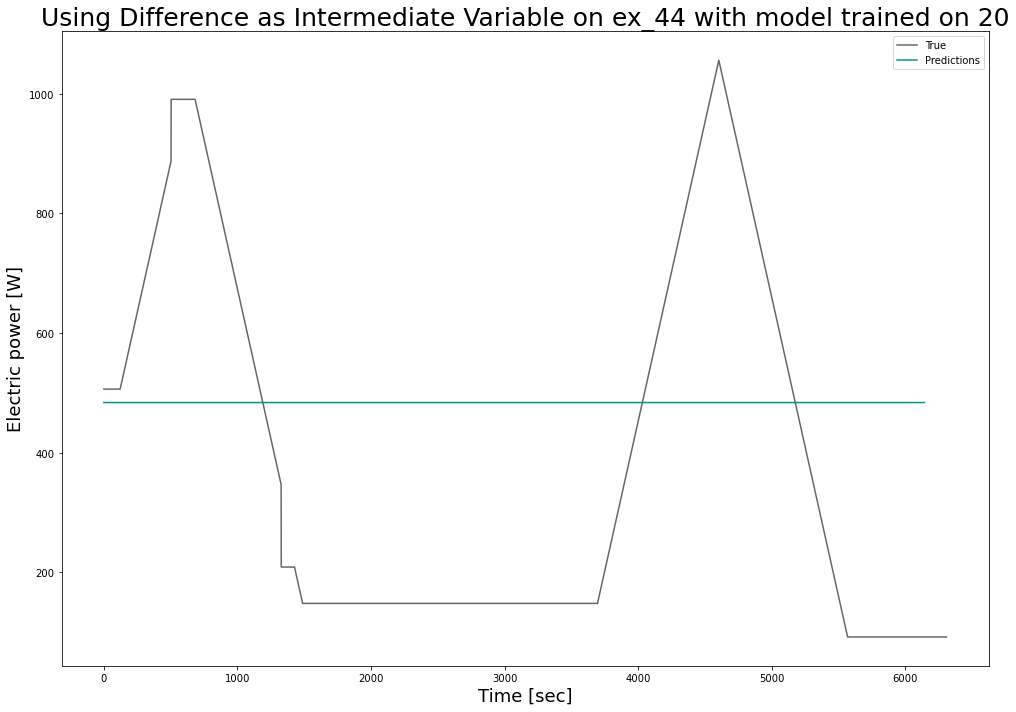

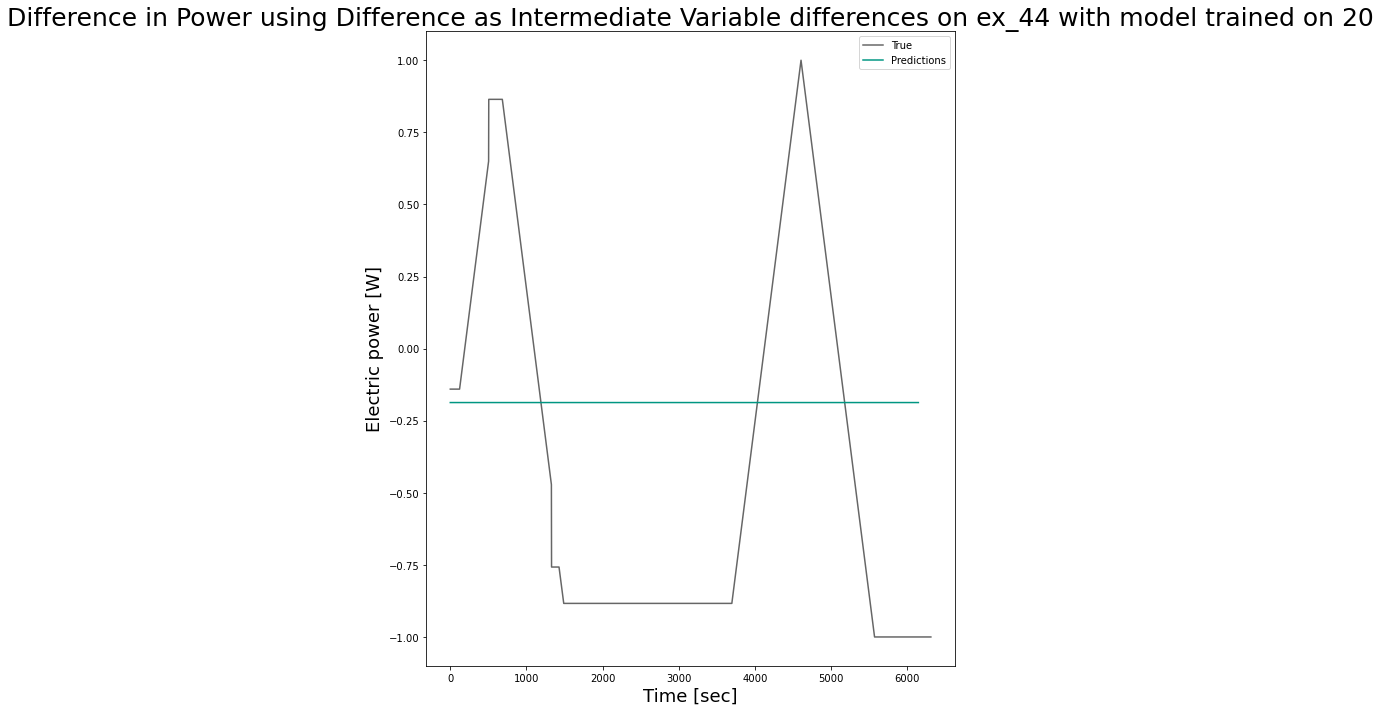

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


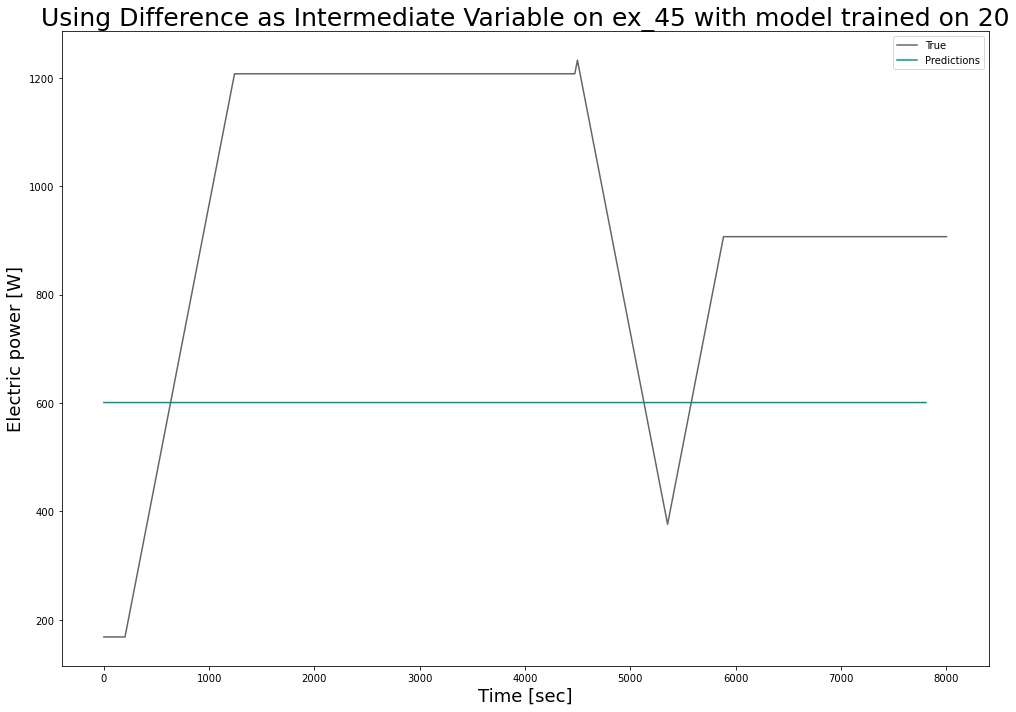

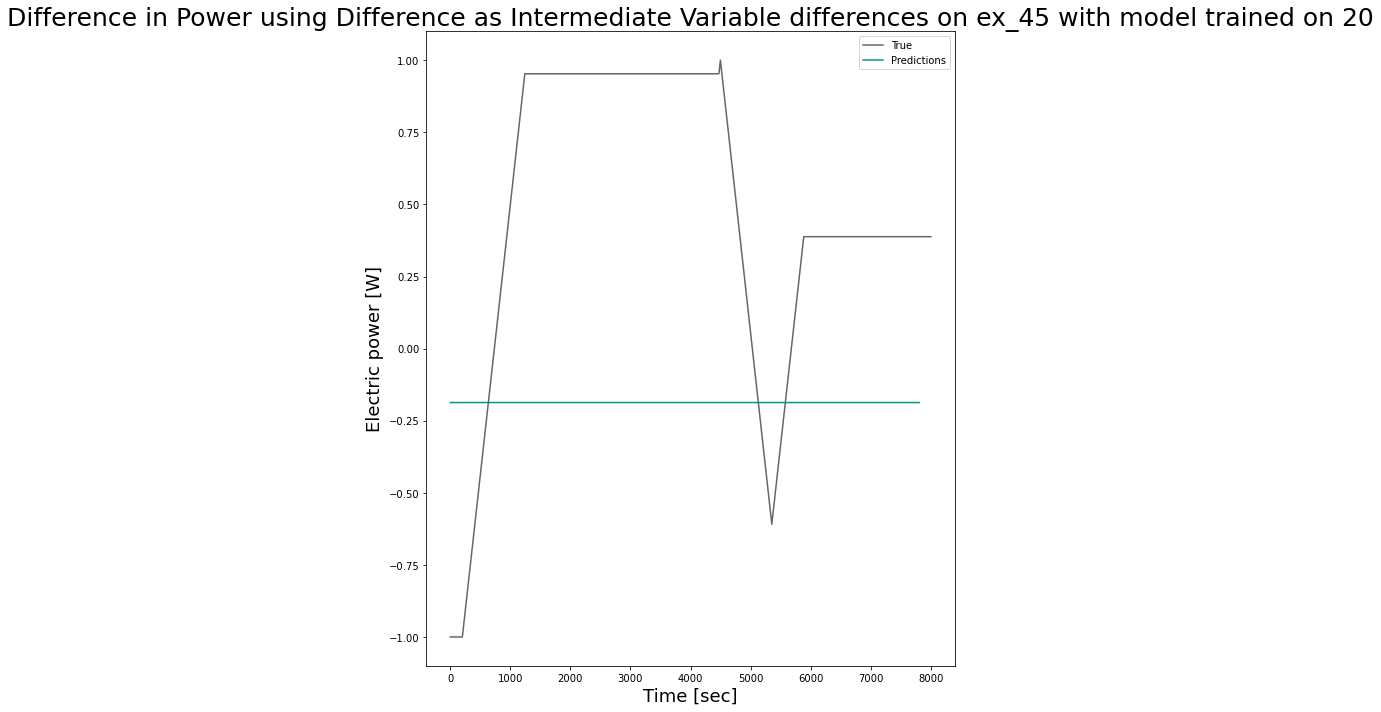

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


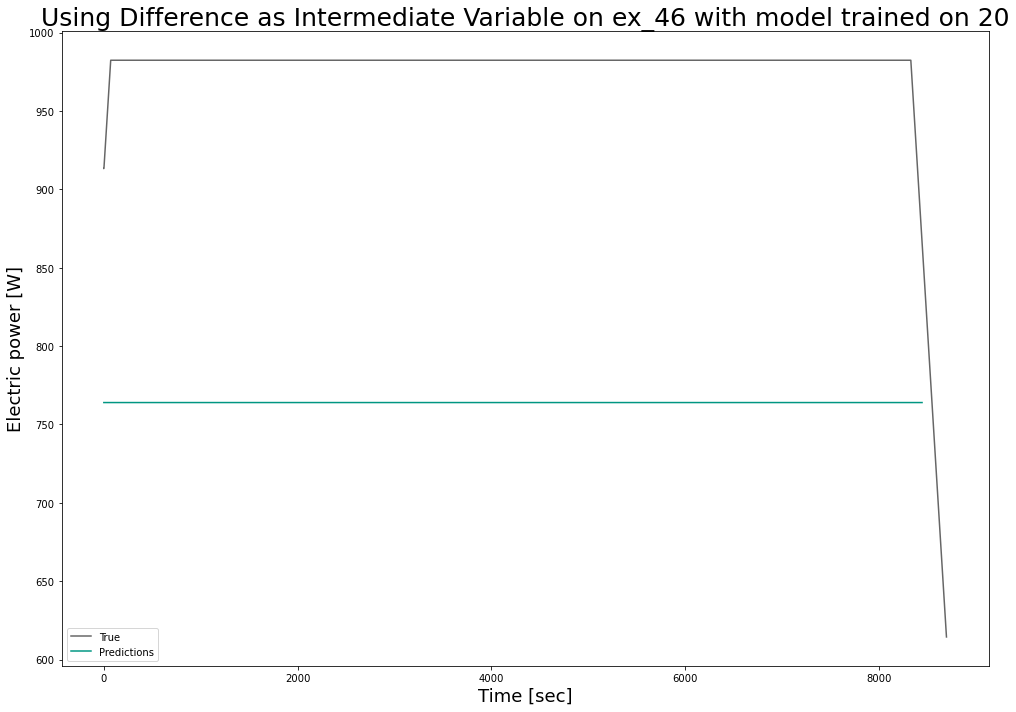

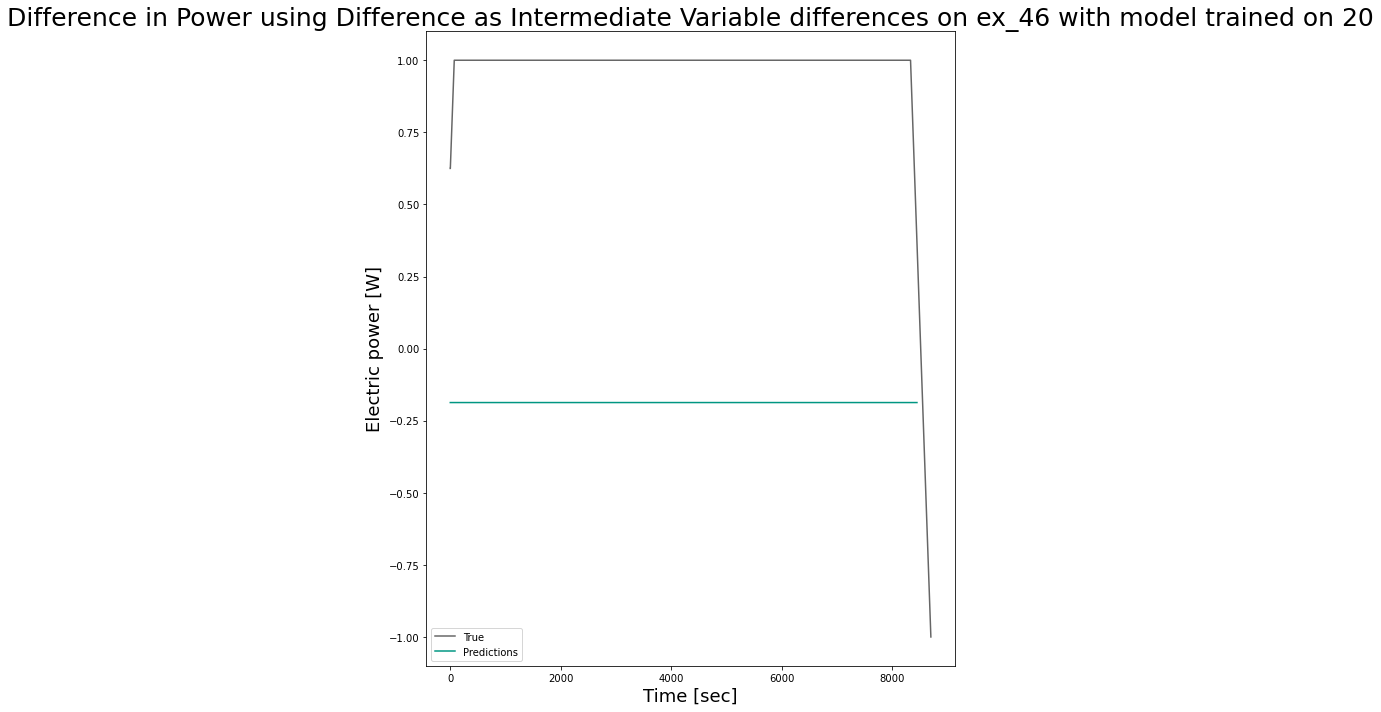

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


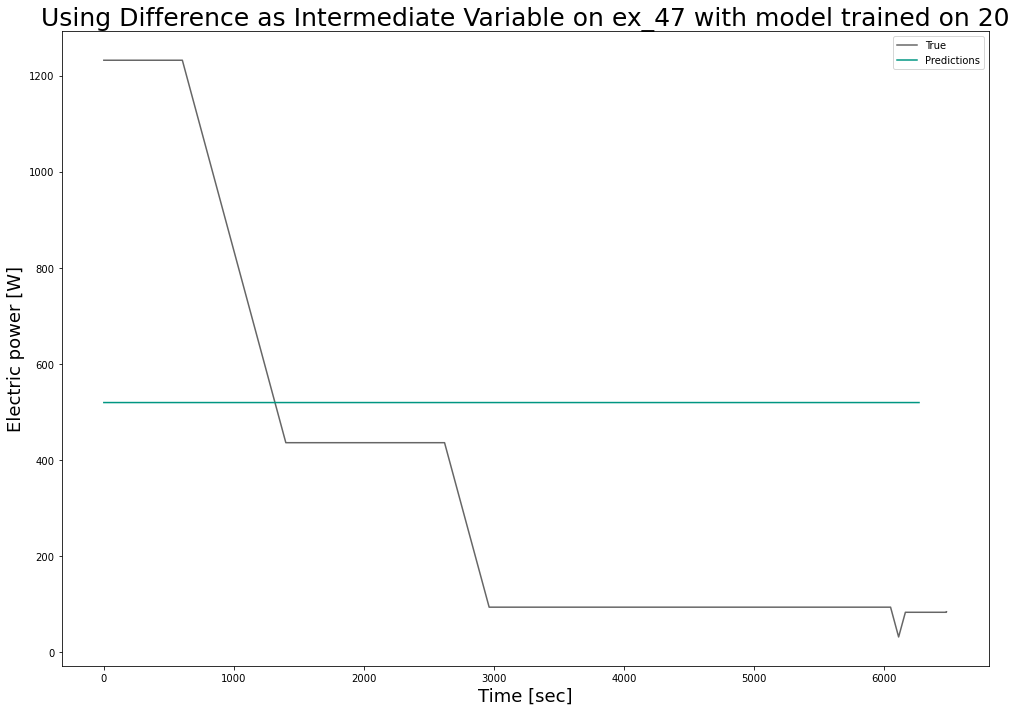

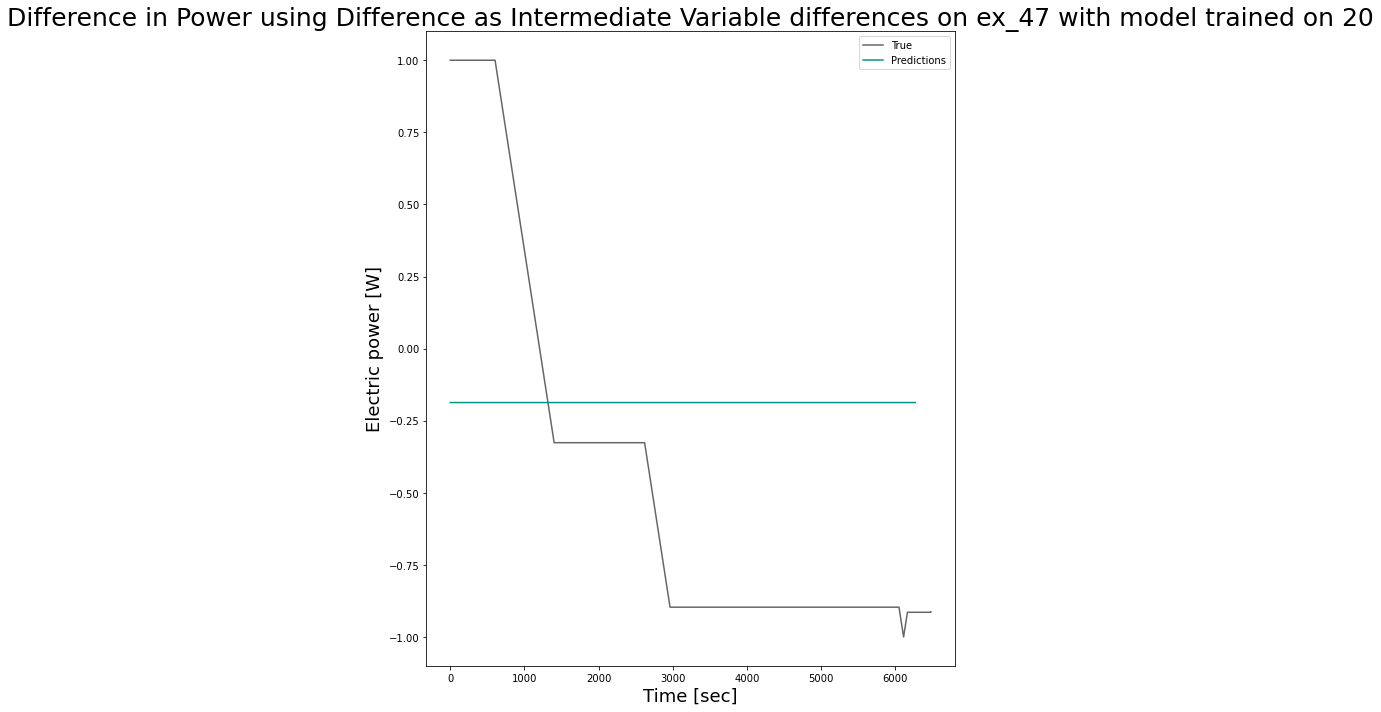

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


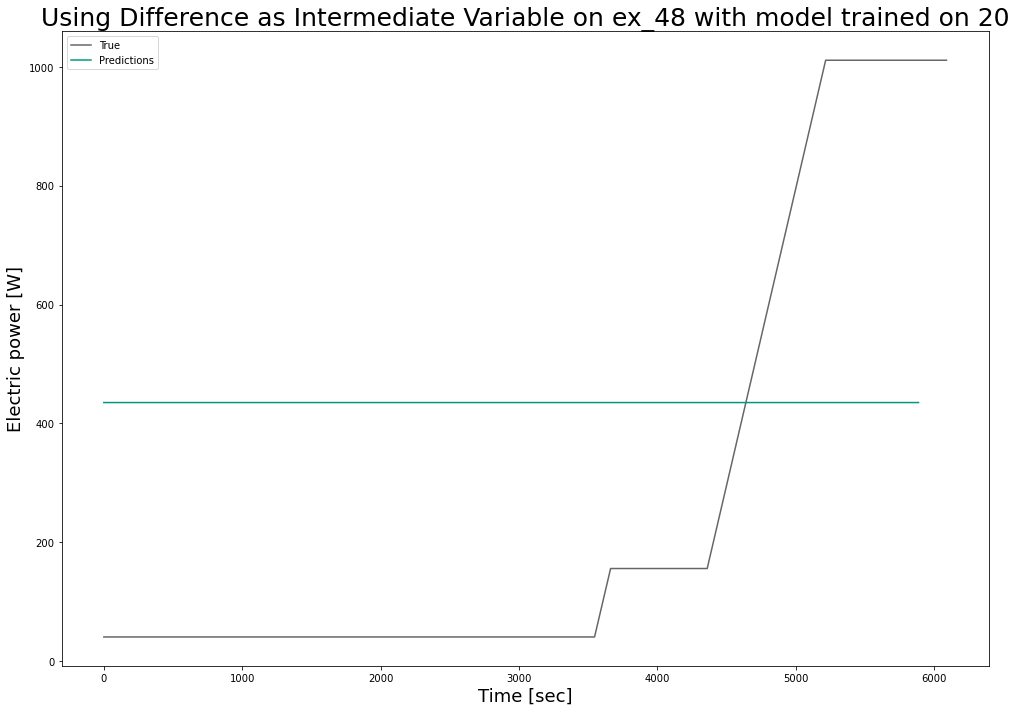

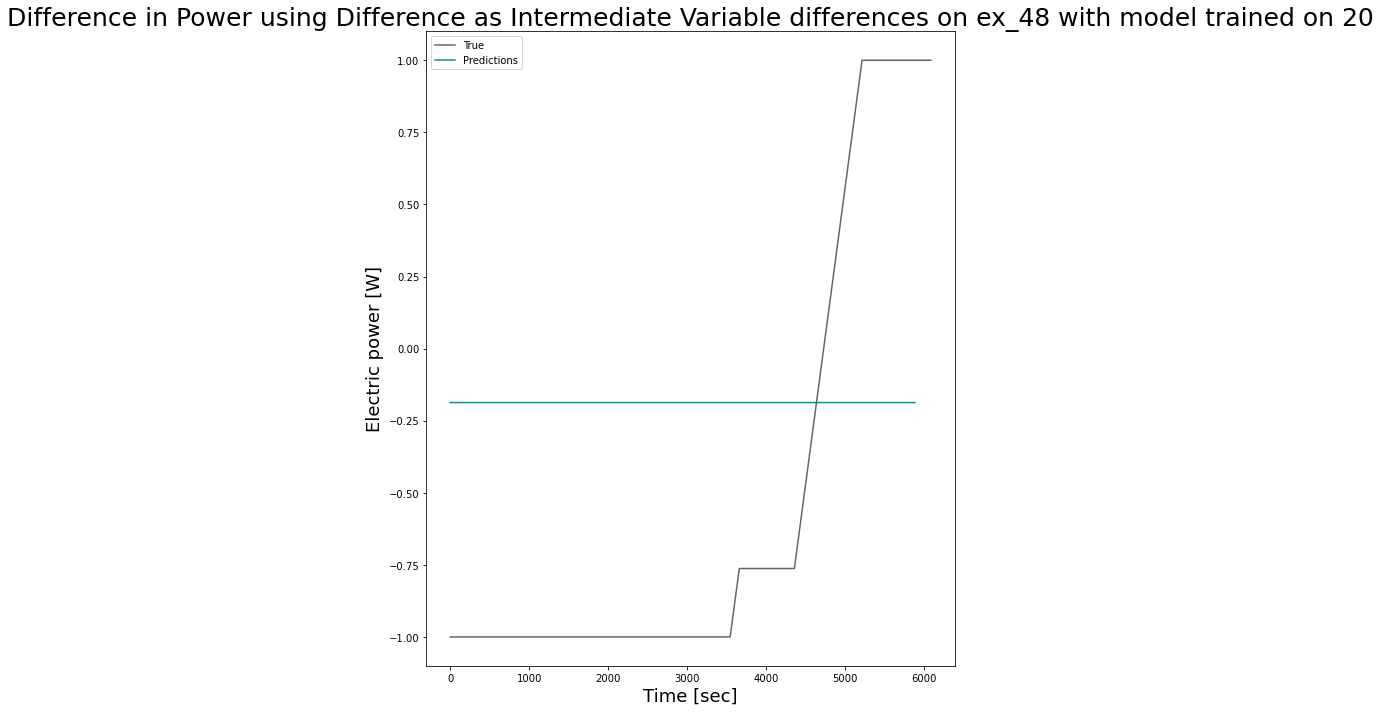

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


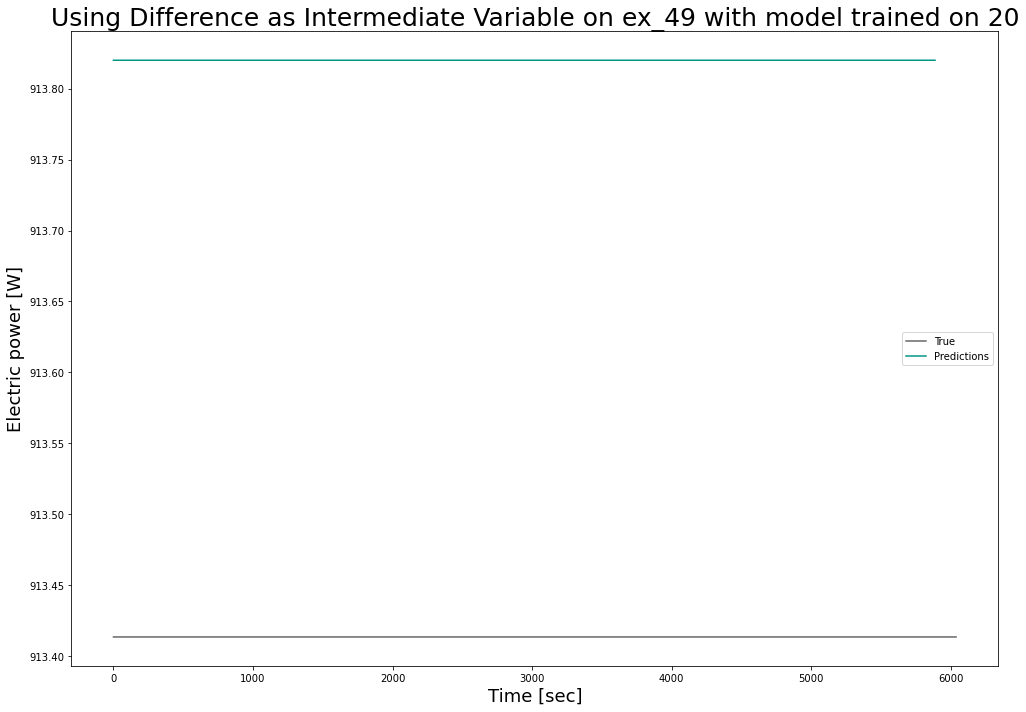

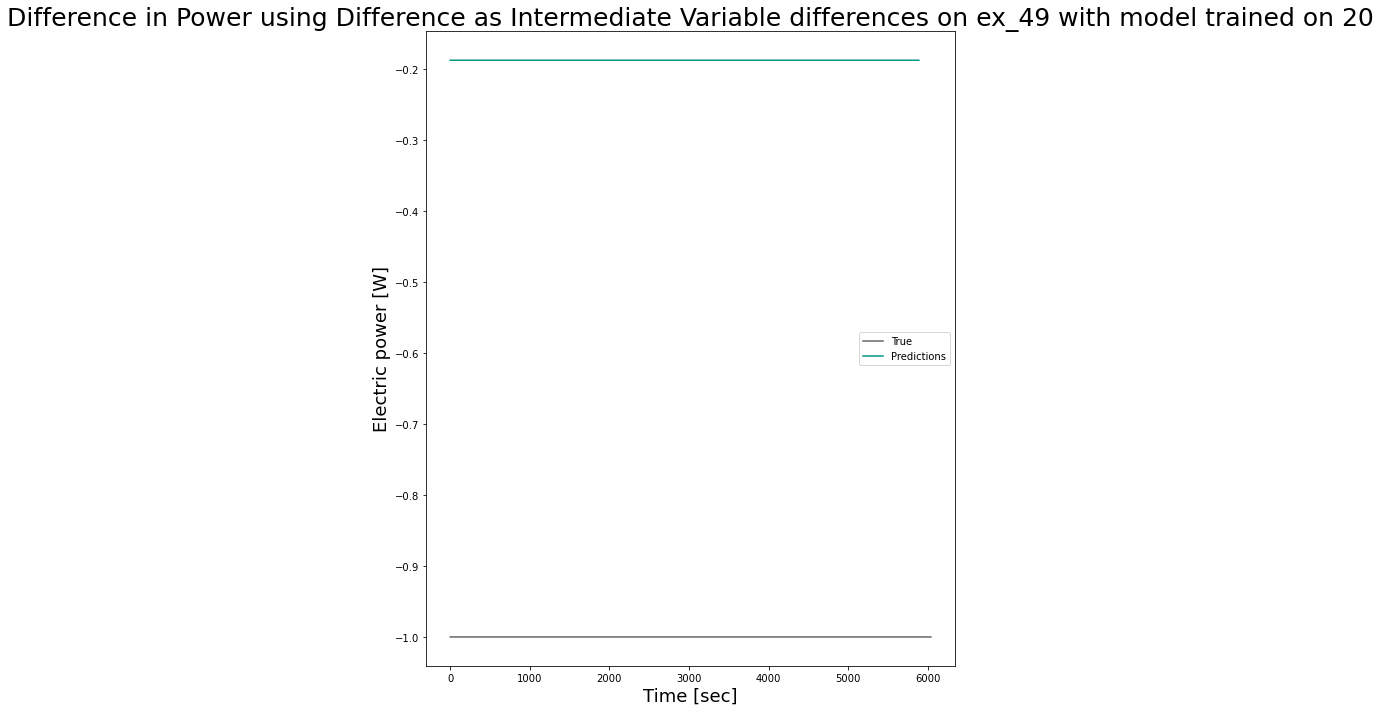

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs_scaled


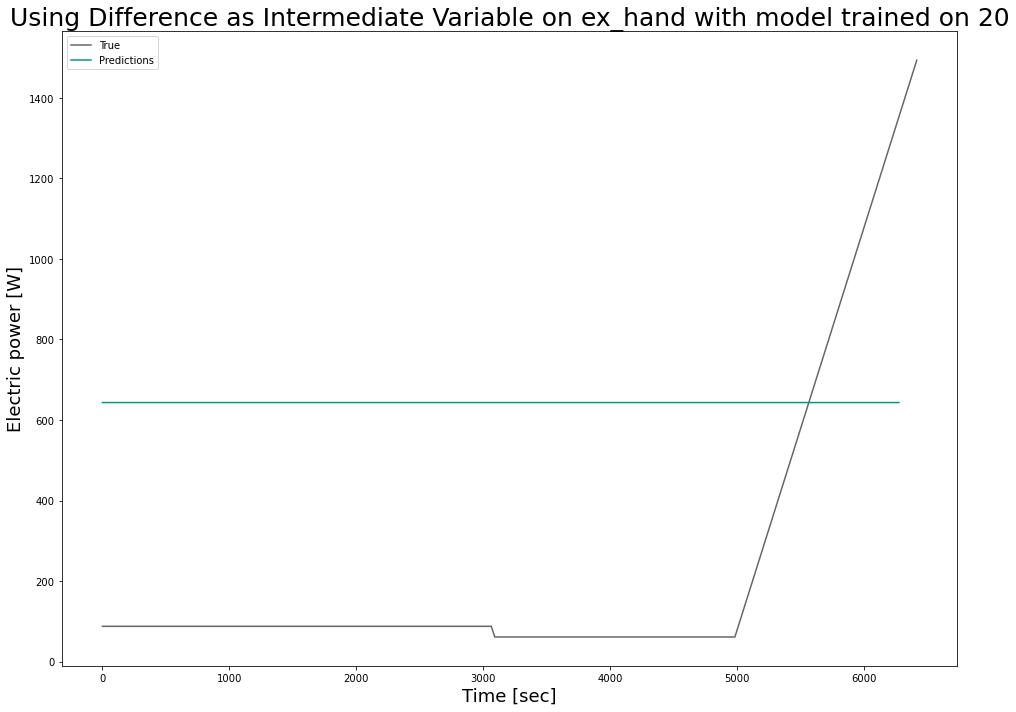

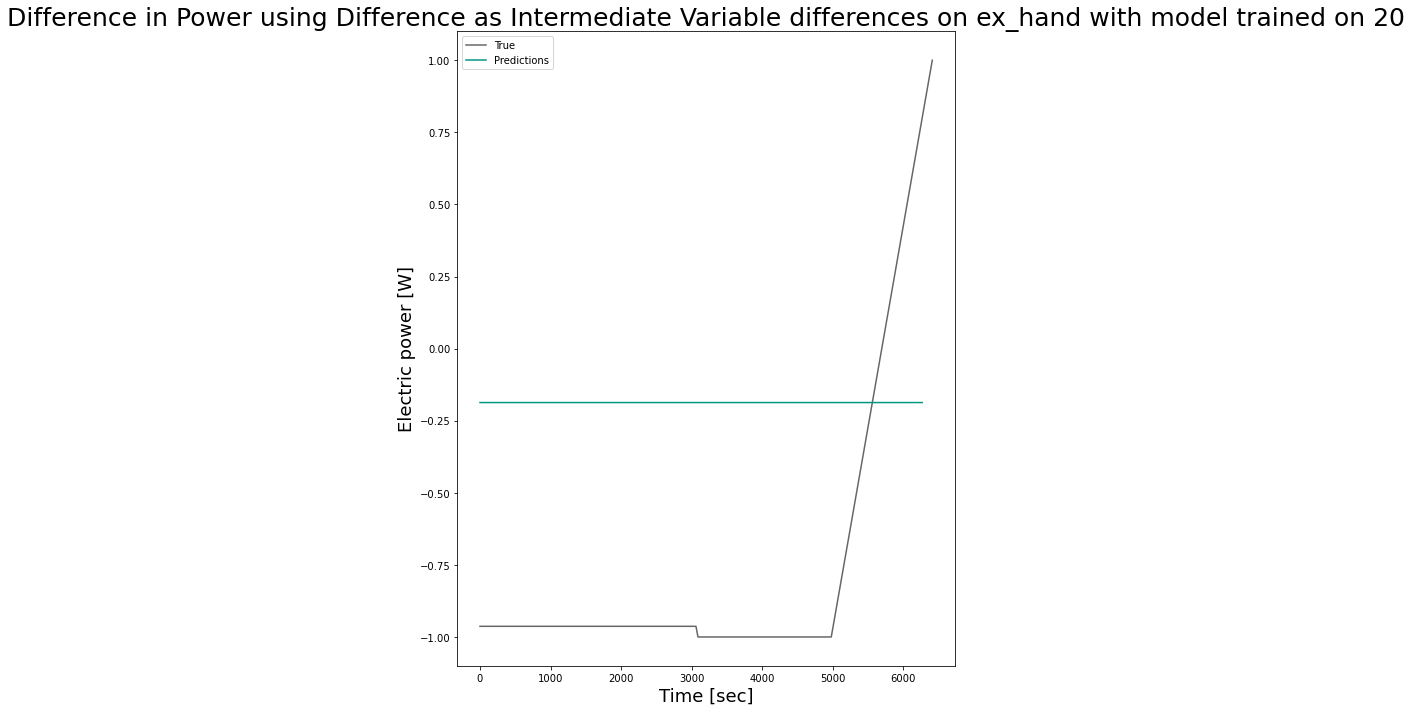

In [13]:
all_scaler = list()
all_X_values = list()
all_y_values = list()
all_predictions = list()
all_scaled_predictions = list()
results = pd.DataFrame(index = names, columns = ['rmse', 'r2', 'mae', 'maxae', 'rmse_scaled', 'r2_scaled', 'mae_scaled', 'maxae_scaled'])

for i in range(len(experiments)):
    rms, r2, mae, maxae = [], [], [], []
    rms_scaled, r2_scaled, mae_scaled, maxae_scaled = [], [], [], []
    scaler, X, y, preds_scaled, preds = nn.predictions(experiments[i], model,
                                                       difference_chosen = DIFFERENCE,
                                                      lag_chosen = LAG,
                                                      batch_size = BATCH_SIZE)
    all_scaler.append(scaler)
    all_X_values.append(X)
    all_y_values.append(y)
    all_predictions.append(preds)
    all_scaled_predictions.append(preds_scaled)
    
    gf.create_prediction_plot(experiments[i]['el_power'], preds, image_folder,
                              title = 'Using Difference as Intermediate Variable ',
                             specs = 'on ex_{0} with model trained on {1}'.format(names[i], train))

    gf.create_prediction_plot(y[:,0], preds_scaled[:,0], image_folder,
                              title = 'Difference in Power using Difference as Intermediate Variable ',
                             specs = 'differences on ex_{0} with model trained on {1}'.format(names[i], train))
    
    results_ex = gf.measure_difference(experiments[i]['el_power'], preds, should_print = False)
    results_scaled = gf.measure_difference(y, preds_scaled, should_print = False)
    rms.append(results_ex['RMSE'][0])
    r2.append(results_ex['R2'][0])
    mae.append(results_ex['MAE'][0])
    maxae.append(results_ex['MaxAE'][0])
    rms_scaled.append(results_scaled['RMSE'][0])
    r2_scaled.append(results_scaled['R2'][0])
    mae_scaled.append(results_scaled['MAE'][0])
    maxae_scaled.append(results_scaled['MaxAE'][0])
                   
    results.loc[names[i], 'rmse'] = rms
    results.loc[names[i], 'r2'] = r2
    results.loc[names[i], 'mae'] = mae
    results.loc[names[i], 'maxae'] = maxae
    results.loc[names[i], 'rmse_scaled'] = rms_scaled
    results.loc[names[i], 'r2_scaled'] = r2_scaled
    results.loc[names[i], 'mae_scaled'] = mae_scaled
    results.loc[names[i], 'maxae_scaled'] = maxae_scaled
    
    results.to_csv(image_folder + "results.csv", sep = "|", encoding = 'utf-8')

In [14]:
losses = []
val_losses = []
for i in history:
    losses.append(i.history['loss'])
    val_losses.append(i.history['val_loss'])

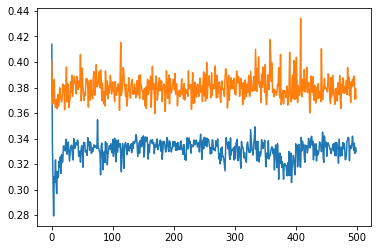

In [15]:
plt.plot(losses)
plt.plot(val_losses)